**Inventory Project**

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import calendar
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
df_C2C3C4C5 = pd.read_excel('/Users/patsanan/Documents/Inventory/C2_C3_C4_Pygas.xlsx')

In [3]:
df_C2C3C4C5['NUMBER_VALUE'] = df_C2C3C4C5['NUMBER_VALUE'].fillna(value=0)

In [4]:
# df['SCENARIO'].unique()

C3 Calculation

In [5]:
df = df_C2C3C4C5.copy() 


In [6]:
#M0 Oct 22
df_oct = df[(df['EBA_DATE'] >= '2022-10-01') & (df['EBA_DATE'] < '2022-11-01')]

select_cols = ['EBA_DATE','NUMBER_VALUE','UPDATE_DATE','SCENARIO_DATE']

df_OPMRDB025_Act = df_oct.query('DATA_ELEMENT_CODE == "OPMRDB025" & SCENARIO=="EA" ')[select_cols] #& SCENARIO=="EA"
df_OPMMDB024_Act = df_oct.query('DATA_ELEMENT_CODE == "OPMMDB024" & SCENARIO=="EA" ')[select_cols] 
df_OPMMDS013_Act = df_oct.query('DATA_ELEMENT_CODE == "OPMMDS013" & SCENARIO=="EA" ')[select_cols] 
df_OPMMDB038_Act = df_oct.query('DATA_ELEMENT_CODE == "OPMMDB038" & SCENARIO=="EA" ')[select_cols] 
df_OPMRDB025_Est = df_oct.query('DATA_ELEMENT_CODE == "OPMRDB025" & SCENARIO=="OLEFINS-PERFORMANCE-WEEKLY" ')[select_cols] 
df_OPMMDB024_Est = df_oct.query('DATA_ELEMENT_CODE == "OPMMDB024" & SCENARIO=="OLEFINS-PERFORMANCE-WEEKLY" ')[select_cols] 
df_OPMMDS013_Est = df_oct.query('DATA_ELEMENT_CODE == "OPMMDS013" & SCENARIO=="OLEFINS-PERFORMANCE-WEEKLY" ')[select_cols] 
df_OPMMDB038_Est = df_oct.query('DATA_ELEMENT_CODE == "OPMMDB038" & SCENARIO=="OLEFINS-PERFORMANCE-WEEKLY" ')[select_cols] 
df_MPSPC3019 = df_oct.query('DATA_ELEMENT_CODE == "MPSPC3019"  ')[select_cols] #no data since 2020
df_MPSPC3020 = df_oct.query('DATA_ELEMENT_CODE == "MPSPC3020"  ')[select_cols] #no data since 2020
df_MPSPC3021 = df_oct.query('DATA_ELEMENT_CODE == "MPSPC3021"  ')[select_cols] #no data since 2020
df_MPOOC3008 = df_oct.query('DATA_ELEMENT_CODE == "MPOOC3008" ')[select_cols] #no data since 2020
df_MPOOC3007 = df_oct.query('DATA_ELEMENT_CODE == "MPOOC3007" ')[select_cols] #no data since 2020
df_MPSPC3001 = df_oct.query('DATA_ELEMENT_CODE == "MPSPC3001" ')[select_cols] 
df_ODMC3P023 = df_oct.query('DATA_ELEMENT_CODE == "ODMC3P023" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P026 = df_oct.query('DATA_ELEMENT_CODE == "ODMC3P026" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P035 = df_oct.query('DATA_ELEMENT_CODE == "ODMC3P035" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P013 = df_oct.query('DATA_ELEMENT_CODE == "ODMC3P013" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P014 = df_oct.query('DATA_ELEMENT_CODE == "ODMC3P014" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154need to query the latest

df_OPMRDB025_Act.columns = ['EBA_DATE','OPMRDB025_ROC_C3_Act_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMMDB024_Act.columns = ['EBA_DATE','OPMMDB024_MOC_C3_ORU_Act_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMMDS013_Act.columns = ['EBA_DATE','OPMMDS013_C3_SC_Act_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMMDB038_Act.columns = ['EBA_DATE','OPMMDB038_C3_OCU_Act_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMRDB025_Est.columns = ['EBA_DATE','OPMRDB025_ROC_C3_Est_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMMDB024_Est.columns = ['EBA_DATE','OPMMDB024_MOC_C3_ORU_Est_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMMDS013_Est.columns = ['EBA_DATE','OPMMDS013_C3_SC_Est_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMMDB038_Est.columns = ['EBA_DATE','OPMMDB038_C3_OCU_Est_M0','UPDATE_DATE','SCENARIO_DATE']
df_MPSPC3019.columns = ['EBA_DATE','MPSPC3019_TPE_PP_1_M0','UPDATE_DATE','SCENARIO_DATE']
df_MPSPC3020.columns = ['EBA_DATE','MPSPC3020_TPE_PP_2_M0','UPDATE_DATE','SCENARIO_DATE']
df_MPSPC3021.columns = ['EBA_DATE','MPSPC3021_Total_TPE_Site_7_M0','UPDATE_DATE','SCENARIO_DATE']
df_MPOOC3008.columns = ['EBA_DATE','MPOOC3008_Dow_HPPO_M0','UPDATE_DATE','SCENARIO_DATE']
df_MPOOC3007.columns = ['EBA_DATE','MPOOC3007_HMC_M0','UPDATE_DATE','SCENARIO_DATE']
df_MPSPC3001.columns = ['EBA_DATE','MPSPC3001_PTT_Supply_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC3P023.columns = ['EBA_DATE','ODMC3P023_TPE_BTF_Transfer_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC3P026.columns = ['EBA_DATE','ODMC3P026_Dow_RTC_Transfer_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC3P035.columns = ['EBA_DATE','ODMC3P035_MTT_Transfer_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC3P013.columns = ['EBA_DATE','ODMC3P013_MTT_Export_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC3P014.columns = ['EBA_DATE','ODMC3P014_MTT_Import_M0','UPDATE_DATE','SCENARIO_DATE']

df_OPMRDB025_Act = df_OPMRDB025_Act[df_OPMRDB025_Act['UPDATE_DATE']==str(df_OPMRDB025_Act['UPDATE_DATE'].max())][['EBA_DATE','OPMRDB025_ROC_C3_Act_M0']]
df_OPMMDB024_Act = df_OPMMDB024_Act[df_OPMMDB024_Act['UPDATE_DATE']==str(df_OPMMDB024_Act['UPDATE_DATE'].max())][['EBA_DATE','OPMMDB024_MOC_C3_ORU_Act_M0']]
df_OPMMDS013_Act = df_OPMMDS013_Act[df_OPMMDS013_Act['UPDATE_DATE']==str(df_OPMMDS013_Act['UPDATE_DATE'].max())][['EBA_DATE','OPMMDS013_C3_SC_Act_M0']]
df_OPMMDB038_Act = df_OPMMDB038_Act[df_OPMMDB038_Act['UPDATE_DATE']==str(df_OPMMDB038_Act['UPDATE_DATE'].max())][['EBA_DATE','OPMMDB038_C3_OCU_Act_M0']]
df_OPMRDB025_Est = df_OPMRDB025_Est[df_OPMRDB025_Est['UPDATE_DATE']==str(df_OPMRDB025_Est['UPDATE_DATE'].max())][['EBA_DATE','OPMRDB025_ROC_C3_Est_M0']]
df_OPMMDB024_Est = df_OPMMDB024_Est[df_OPMMDB024_Est['UPDATE_DATE']==str(df_OPMMDB024_Est['UPDATE_DATE'].max())][['EBA_DATE','OPMMDB024_MOC_C3_ORU_Est_M0']]
df_OPMMDS013_Est = df_OPMMDS013_Est[df_OPMMDS013_Est['UPDATE_DATE']==str(df_OPMMDS013_Est['UPDATE_DATE'].max())][['EBA_DATE','OPMMDS013_C3_SC_Est_M0']]
df_OPMMDB038_Est = df_OPMMDB038_Est[df_OPMMDB038_Est['UPDATE_DATE']==str(df_OPMMDB038_Est['UPDATE_DATE'].max())][['EBA_DATE','OPMMDB038_C3_OCU_Est_M0']]
df_MPSPC3019 = df_MPSPC3019[df_MPSPC3019['UPDATE_DATE']==str(df_MPSPC3019['UPDATE_DATE'].max())][['EBA_DATE','MPSPC3019_TPE_PP_1_M0']]
df_MPSPC3020 = df_MPSPC3020[df_MPSPC3020['UPDATE_DATE']==str(df_MPSPC3020['UPDATE_DATE'].max())][['EBA_DATE','MPSPC3020_TPE_PP_2_M0']]
df_MPSPC3021 = df_MPSPC3021[df_MPSPC3021['UPDATE_DATE']==str(df_MPSPC3021['UPDATE_DATE'].max())][['EBA_DATE','MPSPC3021_Total_TPE_Site_7_M0']]
df_MPOOC3008 = df_MPOOC3008[df_MPOOC3008['UPDATE_DATE']==str(df_MPOOC3008['UPDATE_DATE'].max())][['EBA_DATE','MPOOC3008_Dow_HPPO_M0']]
df_MPOOC3007 = df_MPOOC3007[df_MPOOC3007['UPDATE_DATE']==str(df_MPOOC3007['UPDATE_DATE'].max())][['EBA_DATE','MPOOC3007_HMC_M0']]
df_MPSPC3001 = df_MPSPC3001[df_MPSPC3001['UPDATE_DATE']==str(df_MPSPC3001['UPDATE_DATE'].max())][['EBA_DATE','MPSPC3001_PTT_Supply_M0']]
df_ODMC3P023 = df_ODMC3P023[df_ODMC3P023['UPDATE_DATE']==str(df_ODMC3P023['UPDATE_DATE'].max())][['EBA_DATE','ODMC3P023_TPE_BTF_Transfer_M0']]
df_ODMC3P026 = df_ODMC3P026[df_ODMC3P026['UPDATE_DATE']==str(df_ODMC3P026['UPDATE_DATE'].max())][['EBA_DATE','ODMC3P026_Dow_RTC_Transfer_M0']]
df_ODMC3P035 = df_ODMC3P035[df_ODMC3P035['UPDATE_DATE']==str(df_ODMC3P035['UPDATE_DATE'].max())][['EBA_DATE','ODMC3P035_MTT_Transfer_M0']]
df_ODMC3P013 = df_ODMC3P013[df_ODMC3P013['UPDATE_DATE']==str(df_ODMC3P013['UPDATE_DATE'].max())][['EBA_DATE','ODMC3P013_MTT_Export_M0']]
df_ODMC3P014 = df_ODMC3P014[df_ODMC3P014['UPDATE_DATE']==str(df_ODMC3P014['UPDATE_DATE'].max())][['EBA_DATE','ODMC3P014_MTT_Import_M0']]


# df_OPMRDB025_Act = df_OPMRDB025_Act[df_OPMRDB025_Act['SCENARIO_DATE']==str(df_OPMRDB025_Act['SCENARIO_DATE'].max())] #need only month before today
# df_OPMMDB024_Act = df_OPMMDB024_Act[df_OPMMDB024_Act['SCENARIO_DATE']==str(df_OPMMDB024_Act['SCENARIO_DATE'].max())]
# df_OPMMDS013_Act = df_OPMMDS013_Act[df_OPMMDS013_Act['SCENARIO_DATE']==str(df_OPMMDS013_Act['SCENARIO_DATE'].max())]
# df_OPMMDB038_Act = df_OPMMDB038_Act[df_OPMMDB038_Act['SCENARIO_DATE']==str(df_OPMMDB038_Act['SCENARIO_DATE'].max())]
# df_OPMRDB025_Est = df_OPMRDB025_Est[df_OPMRDB025_Est['SCENARIO_DATE']==str(df_OPMRDB025_Est['SCENARIO_DATE'].max())]
# df_OPMMDB024_Est = df_OPMMDB024_Est[df_OPMMDB024_Est['SCENARIO_DATE']==str(df_OPMMDB024_Est['SCENARIO_DATE'].max())]
# df_OPMMDS013_Est = df_OPMMDS013_Est[df_OPMMDS013_Est['SCENARIO_DATE']==str(df_OPMMDS013_Est['SCENARIO_DATE'].max())]
# df_OPMMDB038_Est = df_OPMMDB038_Est[df_OPMMDB038_Est['SCENARIO_DATE']==str(df_OPMMDB038_Est['SCENARIO_DATE'].max())]
# df_MPSPC3019 = df_MPSPC3019[df_MPSPC3019['SCENARIO_DATE']==str(df_MPSPC3019['SCENARIO_DATE'].max())]
# df_MPSPC3020 = df_MPSPC3020[df_MPSPC3020['SCENARIO_DATE']==str(df_MPSPC3020['SCENARIO_DATE'].max())]
# df_MPSPC3021 = df_MPSPC3021[df_MPSPC3021['SCENARIO_DATE']==str(df_MPSPC3021['SCENARIO_DATE'].max())]
# df_MPOOC3008 = df_MPOOC3008[df_MPOOC3008['SCENARIO_DATE']==str(df_MPOOC3008['SCENARIO_DATE'].max())]
# df_MPOOC3007 = df_MPOOC3007[df_MPOOC3007['SCENARIO_DATE']==str(df_MPOOC3007['SCENARIO_DATE'].max())]
# df_MPSPC3001 = df_MPSPC3001[df_MPSPC3001['SCENARIO_DATE']==str(df_MPSPC3001['SCENARIO_DATE'].max())]
# df_ODMC3P023 = df_ODMC3P023[df_ODMC3P023['SCENARIO_DATE']==str(df_ODMC3P023['SCENARIO_DATE'].max())]
# df_ODMC3P026 = df_ODMC3P026[df_ODMC3P026['SCENARIO_DATE']==str(df_ODMC3P026['SCENARIO_DATE'].max())]
# df_ODMC3P035 = df_ODMC3P035[df_ODMC3P035['SCENARIO_DATE']==str(df_ODMC3P035['SCENARIO_DATE'].max())]
# df_ODMC3P013 = df_ODMC3P013[df_ODMC3P013['SCENARIO_DATE']==str(df_ODMC3P013['SCENARIO_DATE'].max())]
# df_ODMC3P014 = df_ODMC3P014[df_ODMC3P014['SCENARIO_DATE']==str(df_ODMC3P014['SCENARIO_DATE'].max())]



dfs_M0_Act = [ df_OPMRDB025_Act, df_OPMMDB024_Act, df_OPMMDS013_Act, df_OPMMDB038_Act] 
M0_C3_production_Act = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs_M0_Act)

dfs_M0_Est = [ df_OPMRDB025_Est, df_OPMMDB024_Est, df_OPMMDS013_Est, df_OPMMDB038_Est] 
M0_C3_production_Est = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE' , how="outer"), dfs_M0_Est)

M0_C3_production_Act= M0_C3_production_Act.fillna(value=0)
M0_C3_production_Est= M0_C3_production_Est.fillna(value=0)

M0_C3_production_Act['MOC_C3_Net_M0_Act'] = M0_C3_production_Act['OPMMDB024_MOC_C3_ORU_Act_M0'].astype(float) + M0_C3_production_Act['OPMMDS013_C3_SC_Act_M0'].astype(float) + M0_C3_production_Act['OPMMDB038_C3_OCU_Act_M0'].astype(float)
M0_C3_production_Act['Total_M0_Act'] = M0_C3_production_Act['MOC_C3_Net_M0_Act'] + M0_C3_production_Act['OPMRDB025_ROC_C3_Act_M0'] 

M0_C3_production_Est['MOC_C3_Net_M0_Est'] = M0_C3_production_Est['OPMMDB024_MOC_C3_ORU_Est_M0'].astype(float) + M0_C3_production_Est['OPMMDS013_C3_SC_Est_M0'].astype(float) + M0_C3_production_Est['OPMMDB038_C3_OCU_Est_M0'].astype(float)
M0_C3_production_Est['Total_M0_Est'] = M0_C3_production_Est['MOC_C3_Net_M0_Est'] + M0_C3_production_Est['OPMRDB025_ROC_C3_Est_M0'] 

dfs_M0_Customer = [ df_MPSPC3019, df_MPSPC3020, df_MPSPC3021,df_MPOOC3008, df_ODMC3P026,df_ODMC3P023,df_MPOOC3007,df_MPSPC3001] #, df_MPSPC3001 (PTT),df_H05ROC003 (ROC),
M0_C3_Customer = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs_M0_Customer)

M0_C3_Customer= M0_C3_Customer.fillna(value=0)

M0_C3_Customer['MPSPC3019_TPE_PP_1_M0'] = M0_C3_Customer['MPSPC3019_TPE_PP_1_M0']/24
M0_C3_Customer['MPSPC3020_TPE_PP_2_M0'] = M0_C3_Customer['MPSPC3020_TPE_PP_2_M0']/24
M0_C3_Customer['MPSPC3021_Total_TPE_Site_7_M0'] = M0_C3_Customer['MPSPC3021_Total_TPE_Site_7_M0']/24
M0_C3_Customer['MPSPC3001_PTT_Supply_M0'] = M0_C3_Customer['MPSPC3001_PTT_Supply_M0']/24

M0_C3_Customer['TPE_BTF_Transfer_M0'] = M0_C3_Customer['MPSPC3019_TPE_PP_1_M0'] + M0_C3_Customer['MPSPC3020_TPE_PP_2_M0']
M0_C3_Customer['Total_TPE_Site_1_M0'] = M0_C3_Customer['MPSPC3019_TPE_PP_1_M0'] + M0_C3_Customer['MPSPC3020_TPE_PP_2_M0']   + M0_C3_Customer['MPSPC3001_PTT_Supply_M0'] + M0_C3_Customer['ODMC3P023_TPE_BTF_Transfer_M0']
M0_C3_Customer['TPE_total_M0'] = M0_C3_Customer['Total_TPE_Site_1_M0'] + M0_C3_Customer['MPSPC3021_Total_TPE_Site_7_M0']
M0_C3_Customer['Total_Dow_M0'] = M0_C3_Customer['MPOOC3008_Dow_HPPO_M0'] + M0_C3_Customer['ODMC3P026_Dow_RTC_Transfer_M0']
M0_C3_Customer['Total Customer_M0'] = M0_C3_Customer['TPE_total_M0'] + M0_C3_Customer['Total_Dow_M0'] + M0_C3_Customer['MPOOC3007_HMC_M0']

df_M0_Act = [ M0_C3_production_Act,M0_C3_Customer] 
df_M0_Act = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), df_M0_Act)
df_M0_Est = [ M0_C3_production_Est,M0_C3_Customer] 
df_M0_Est = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), df_M0_Est)

df_M0_Act = df_M0_Act.fillna(value=0)
df_M0_Est = df_M0_Est.fillna(value=0)

df_M0_Act['Production-Customer_Act_M0'] = df_M0_Act [ 'Total_M0_Act'] - df_M0_Act ['Total Customer_M0']
df_M0_Est['Production-Customer_Est_M0'] = df_M0_Est [ 'Total_M0_Est'] - df_M0_Est ['Total Customer_M0']

df_Oct_22_Act = df_M0_Act[(df_M0_Act['EBA_DATE'] >= '2022-10-01') & (df_M0_Act['EBA_DATE'] < '2022-11-01') ]
df_Oct_22_Est = df_M0_Est[(df_M0_Est['EBA_DATE'] >= '2022-10-01') & (df_M0_Est['EBA_DATE'] < '2022-11-01') ]    




In [7]:
#M0 Nov 22
df_oct = df[(df['EBA_DATE'] >= '2022-10-01') & (df['EBA_DATE'] < '2022-11-01')]

select_cols = ['EBA_DATE','NUMBER_VALUE','UPDATE_DATE','SCENARIO_DATE']

df_OPMRDB025_Act = df_oct.query('DATA_ELEMENT_CODE == "OPMRDB025" & SCENARIO=="EA" ')[select_cols] #& SCENARIO=="EA"
df_OPMMDB024_Act = df_oct.query('DATA_ELEMENT_CODE == "OPMMDB024" & SCENARIO=="EA" ')[select_cols] 
df_OPMMDS013_Act = df_oct.query('DATA_ELEMENT_CODE == "OPMMDS013" & SCENARIO=="EA" ')[select_cols] 
df_OPMMDB038_Act = df_oct.query('DATA_ELEMENT_CODE == "OPMMDB038" & SCENARIO=="EA" ')[select_cols] 
df_OPMRDB025_Est = df_oct.query('DATA_ELEMENT_CODE == "OPMRDB025" & SCENARIO=="OLEFINS-PERFORMANCE-WEEKLY" ')[select_cols] 
df_OPMMDB024_Est = df_oct.query('DATA_ELEMENT_CODE == "OPMMDB024" & SCENARIO=="OLEFINS-PERFORMANCE-WEEKLY" ')[select_cols] 
df_OPMMDS013_Est = df_oct.query('DATA_ELEMENT_CODE == "OPMMDS013" & SCENARIO=="OLEFINS-PERFORMANCE-WEEKLY" ')[select_cols] 
df_OPMMDB038_Est = df_oct.query('DATA_ELEMENT_CODE == "OPMMDB038" & SCENARIO=="OLEFINS-PERFORMANCE-WEEKLY" ')[select_cols] 
df_MPSPC3019 = df_oct.query('DATA_ELEMENT_CODE == "MPSPC3019"  ')[select_cols] #no data since 2020
df_MPSPC3020 = df_oct.query('DATA_ELEMENT_CODE == "MPSPC3020"  ')[select_cols] #no data since 2020
df_MPSPC3021 = df_oct.query('DATA_ELEMENT_CODE == "MPSPC3021"  ')[select_cols] #no data since 2020
df_MPOOC3008 = df_oct.query('DATA_ELEMENT_CODE == "MPOOC3008" ')[select_cols] #no data since 2020
df_MPOOC3007 = df_oct.query('DATA_ELEMENT_CODE == "MPOOC3007" ')[select_cols] #no data since 2020
df_MPSPC3001 = df_oct.query('DATA_ELEMENT_CODE == "MPSPC3001" ')[select_cols] 
df_ODMC3P023 = df_oct.query('DATA_ELEMENT_CODE == "ODMC3P023" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P026 = df_oct.query('DATA_ELEMENT_CODE == "ODMC3P026" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P035 = df_oct.query('DATA_ELEMENT_CODE == "ODMC3P035" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P013 = df_oct.query('DATA_ELEMENT_CODE == "ODMC3P013" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P014 = df_oct.query('DATA_ELEMENT_CODE == "ODMC3P014" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154need to query the latest

df_OPMRDB025_Act.columns = ['EBA_DATE','OPMRDB025_ROC_C3_Act_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMMDB024_Act.columns = ['EBA_DATE','OPMMDB024_MOC_C3_ORU_Act_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMMDS013_Act.columns = ['EBA_DATE','OPMMDS013_C3_SC_Act_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMMDB038_Act.columns = ['EBA_DATE','OPMMDB038_C3_OCU_Act_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMRDB025_Est.columns = ['EBA_DATE','OPMRDB025_ROC_C3_Est_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMMDB024_Est.columns = ['EBA_DATE','OPMMDB024_MOC_C3_ORU_Est_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMMDS013_Est.columns = ['EBA_DATE','OPMMDS013_C3_SC_Est_M0','UPDATE_DATE','SCENARIO_DATE']
df_OPMMDB038_Est.columns = ['EBA_DATE','OPMMDB038_C3_OCU_Est_M0','UPDATE_DATE','SCENARIO_DATE']
df_MPSPC3019.columns = ['EBA_DATE','MPSPC3019_TPE_PP_1_M0','UPDATE_DATE','SCENARIO_DATE']
df_MPSPC3020.columns = ['EBA_DATE','MPSPC3020_TPE_PP_2_M0','UPDATE_DATE','SCENARIO_DATE']
df_MPSPC3021.columns = ['EBA_DATE','MPSPC3021_Total_TPE_Site_7_M0','UPDATE_DATE','SCENARIO_DATE']
df_MPOOC3008.columns = ['EBA_DATE','MPOOC3008_Dow_HPPO_M0','UPDATE_DATE','SCENARIO_DATE']
df_MPOOC3007.columns = ['EBA_DATE','MPOOC3007_HMC_M0','UPDATE_DATE','SCENARIO_DATE']
df_MPSPC3001.columns = ['EBA_DATE','MPSPC3001_PTT_Supply_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC3P023.columns = ['EBA_DATE','ODMC3P023_TPE_BTF_Transfer_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC3P026.columns = ['EBA_DATE','ODMC3P026_Dow_RTC_Transfer_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC3P035.columns = ['EBA_DATE','ODMC3P035_MTT_Transfer_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC3P013.columns = ['EBA_DATE','ODMC3P013_MTT_Export_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC3P014.columns = ['EBA_DATE','ODMC3P014_MTT_Import_M0','UPDATE_DATE','SCENARIO_DATE']

df_OPMRDB025_Act = df_OPMRDB025_Act[df_OPMRDB025_Act['UPDATE_DATE']==str(df_OPMRDB025_Act['UPDATE_DATE'].max())][['EBA_DATE','OPMRDB025_ROC_C3_Act_M0']]
df_OPMMDB024_Act = df_OPMMDB024_Act[df_OPMMDB024_Act['UPDATE_DATE']==str(df_OPMMDB024_Act['UPDATE_DATE'].max())][['EBA_DATE','OPMMDB024_MOC_C3_ORU_Act_M0']]
df_OPMMDS013_Act = df_OPMMDS013_Act[df_OPMMDS013_Act['UPDATE_DATE']==str(df_OPMMDS013_Act['UPDATE_DATE'].max())][['EBA_DATE','OPMMDS013_C3_SC_Act_M0']]
df_OPMMDB038_Act = df_OPMMDB038_Act[df_OPMMDB038_Act['UPDATE_DATE']==str(df_OPMMDB038_Act['UPDATE_DATE'].max())][['EBA_DATE','OPMMDB038_C3_OCU_Act_M0']]
df_OPMRDB025_Est = df_OPMRDB025_Est[df_OPMRDB025_Est['UPDATE_DATE']==str(df_OPMRDB025_Est['UPDATE_DATE'].max())][['EBA_DATE','OPMRDB025_ROC_C3_Est_M0']]
df_OPMMDB024_Est = df_OPMMDB024_Est[df_OPMMDB024_Est['UPDATE_DATE']==str(df_OPMMDB024_Est['UPDATE_DATE'].max())][['EBA_DATE','OPMMDB024_MOC_C3_ORU_Est_M0']]
df_OPMMDS013_Est = df_OPMMDS013_Est[df_OPMMDS013_Est['UPDATE_DATE']==str(df_OPMMDS013_Est['UPDATE_DATE'].max())][['EBA_DATE','OPMMDS013_C3_SC_Est_M0']]
df_OPMMDB038_Est = df_OPMMDB038_Est[df_OPMMDB038_Est['UPDATE_DATE']==str(df_OPMMDB038_Est['UPDATE_DATE'].max())][['EBA_DATE','OPMMDB038_C3_OCU_Est_M0']]
df_MPSPC3019 = df_MPSPC3019[df_MPSPC3019['UPDATE_DATE']==str(df_MPSPC3019['UPDATE_DATE'].max())][['EBA_DATE','MPSPC3019_TPE_PP_1_M0']]
df_MPSPC3020 = df_MPSPC3020[df_MPSPC3020['UPDATE_DATE']==str(df_MPSPC3020['UPDATE_DATE'].max())][['EBA_DATE','MPSPC3020_TPE_PP_2_M0']]
df_MPSPC3021 = df_MPSPC3021[df_MPSPC3021['UPDATE_DATE']==str(df_MPSPC3021['UPDATE_DATE'].max())][['EBA_DATE','MPSPC3021_Total_TPE_Site_7_M0']]
df_MPOOC3008 = df_MPOOC3008[df_MPOOC3008['UPDATE_DATE']==str(df_MPOOC3008['UPDATE_DATE'].max())][['EBA_DATE','MPOOC3008_Dow_HPPO_M0']]
df_MPOOC3007 = df_MPOOC3007[df_MPOOC3007['UPDATE_DATE']==str(df_MPOOC3007['UPDATE_DATE'].max())][['EBA_DATE','MPOOC3007_HMC_M0']]
df_MPSPC3001 = df_MPSPC3001[df_MPSPC3001['UPDATE_DATE']==str(df_MPSPC3001['UPDATE_DATE'].max())][['EBA_DATE','MPSPC3001_PTT_Supply_M0']]
df_ODMC3P023 = df_ODMC3P023[df_ODMC3P023['UPDATE_DATE']==str(df_ODMC3P023['UPDATE_DATE'].max())][['EBA_DATE','ODMC3P023_TPE_BTF_Transfer_M0']]
df_ODMC3P026 = df_ODMC3P026[df_ODMC3P026['UPDATE_DATE']==str(df_ODMC3P026['UPDATE_DATE'].max())][['EBA_DATE','ODMC3P026_Dow_RTC_Transfer_M0']]
df_ODMC3P035 = df_ODMC3P035[df_ODMC3P035['UPDATE_DATE']==str(df_ODMC3P035['UPDATE_DATE'].max())][['EBA_DATE','ODMC3P035_MTT_Transfer_M0']]
df_ODMC3P013 = df_ODMC3P013[df_ODMC3P013['UPDATE_DATE']==str(df_ODMC3P013['UPDATE_DATE'].max())][['EBA_DATE','ODMC3P013_MTT_Export_M0']]
df_ODMC3P014 = df_ODMC3P014[df_ODMC3P014['UPDATE_DATE']==str(df_ODMC3P014['UPDATE_DATE'].max())][['EBA_DATE','ODMC3P014_MTT_Import_M0']]


# df_OPMRDB025_Act = df_OPMRDB025_Act[df_OPMRDB025_Act['SCENARIO_DATE']==str(df_OPMRDB025_Act['SCENARIO_DATE'].max())] #need only month before today
# df_OPMMDB024_Act = df_OPMMDB024_Act[df_OPMMDB024_Act['SCENARIO_DATE']==str(df_OPMMDB024_Act['SCENARIO_DATE'].max())]
# df_OPMMDS013_Act = df_OPMMDS013_Act[df_OPMMDS013_Act['SCENARIO_DATE']==str(df_OPMMDS013_Act['SCENARIO_DATE'].max())]
# df_OPMMDB038_Act = df_OPMMDB038_Act[df_OPMMDB038_Act['SCENARIO_DATE']==str(df_OPMMDB038_Act['SCENARIO_DATE'].max())]
# df_OPMRDB025_Est = df_OPMRDB025_Est[df_OPMRDB025_Est['SCENARIO_DATE']==str(df_OPMRDB025_Est['SCENARIO_DATE'].max())]
# df_OPMMDB024_Est = df_OPMMDB024_Est[df_OPMMDB024_Est['SCENARIO_DATE']==str(df_OPMMDB024_Est['SCENARIO_DATE'].max())]
# df_OPMMDS013_Est = df_OPMMDS013_Est[df_OPMMDS013_Est['SCENARIO_DATE']==str(df_OPMMDS013_Est['SCENARIO_DATE'].max())]
# df_OPMMDB038_Est = df_OPMMDB038_Est[df_OPMMDB038_Est['SCENARIO_DATE']==str(df_OPMMDB038_Est['SCENARIO_DATE'].max())]
# df_MPSPC3019 = df_MPSPC3019[df_MPSPC3019['SCENARIO_DATE']==str(df_MPSPC3019['SCENARIO_DATE'].max())]
# df_MPSPC3020 = df_MPSPC3020[df_MPSPC3020['SCENARIO_DATE']==str(df_MPSPC3020['SCENARIO_DATE'].max())]
# df_MPSPC3021 = df_MPSPC3021[df_MPSPC3021['SCENARIO_DATE']==str(df_MPSPC3021['SCENARIO_DATE'].max())]
# df_MPOOC3008 = df_MPOOC3008[df_MPOOC3008['SCENARIO_DATE']==str(df_MPOOC3008['SCENARIO_DATE'].max())]
# df_MPOOC3007 = df_MPOOC3007[df_MPOOC3007['SCENARIO_DATE']==str(df_MPOOC3007['SCENARIO_DATE'].max())]
# df_MPSPC3001 = df_MPSPC3001[df_MPSPC3001['SCENARIO_DATE']==str(df_MPSPC3001['SCENARIO_DATE'].max())]
# df_ODMC3P023 = df_ODMC3P023[df_ODMC3P023['SCENARIO_DATE']==str(df_ODMC3P023['SCENARIO_DATE'].max())]
# df_ODMC3P026 = df_ODMC3P026[df_ODMC3P026['SCENARIO_DATE']==str(df_ODMC3P026['SCENARIO_DATE'].max())]
# df_ODMC3P035 = df_ODMC3P035[df_ODMC3P035['SCENARIO_DATE']==str(df_ODMC3P035['SCENARIO_DATE'].max())]
# df_ODMC3P013 = df_ODMC3P013[df_ODMC3P013['SCENARIO_DATE']==str(df_ODMC3P013['SCENARIO_DATE'].max())]
# df_ODMC3P014 = df_ODMC3P014[df_ODMC3P014['SCENARIO_DATE']==str(df_ODMC3P014['SCENARIO_DATE'].max())]



dfs_M0_Act = [ df_OPMRDB025_Act, df_OPMMDB024_Act, df_OPMMDS013_Act, df_OPMMDB038_Act] 
M0_C3_production_Act = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs_M0_Act)

dfs_M0_Est = [ df_OPMRDB025_Est, df_OPMMDB024_Est, df_OPMMDS013_Est, df_OPMMDB038_Est] 
M0_C3_production_Est = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE' , how="outer"), dfs_M0_Est)

M0_C3_production_Act= M0_C3_production_Act.fillna(value=0)
M0_C3_production_Est= M0_C3_production_Est.fillna(value=0)

M0_C3_production_Act['MOC_C3_Net_M0_Act'] = M0_C3_production_Act['OPMMDB024_MOC_C3_ORU_Act_M0'].astype(float) + M0_C3_production_Act['OPMMDS013_C3_SC_Act_M0'].astype(float) + M0_C3_production_Act['OPMMDB038_C3_OCU_Act_M0'].astype(float)
M0_C3_production_Act['Total_M0_Act'] = M0_C3_production_Act['MOC_C3_Net_M0_Act'] + M0_C3_production_Act['OPMRDB025_ROC_C3_Act_M0'] 

M0_C3_production_Est['MOC_C3_Net_M0_Est'] = M0_C3_production_Est['OPMMDB024_MOC_C3_ORU_Est_M0'].astype(float) + M0_C3_production_Est['OPMMDS013_C3_SC_Est_M0'].astype(float) + M0_C3_production_Est['OPMMDB038_C3_OCU_Est_M0'].astype(float)
M0_C3_production_Est['Total_M0_Est'] = M0_C3_production_Est['MOC_C3_Net_M0_Est'] + M0_C3_production_Est['OPMRDB025_ROC_C3_Est_M0'] 

dfs_M0_Customer = [ df_MPSPC3019, df_MPSPC3020, df_MPSPC3021,df_MPOOC3008, df_ODMC3P026,df_ODMC3P023,df_MPOOC3007,df_MPSPC3001] #, df_MPSPC3001 (PTT),df_H05ROC003 (ROC),
M0_C3_Customer = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs_M0_Customer)

M0_C3_Customer= M0_C3_Customer.fillna(value=0)

M0_C3_Customer['MPSPC3019_TPE_PP_1_M0'] = M0_C3_Customer['MPSPC3019_TPE_PP_1_M0']/24
M0_C3_Customer['MPSPC3020_TPE_PP_2_M0'] = M0_C3_Customer['MPSPC3020_TPE_PP_2_M0']/24
M0_C3_Customer['MPSPC3021_Total_TPE_Site_7_M0'] = M0_C3_Customer['MPSPC3021_Total_TPE_Site_7_M0']/24
M0_C3_Customer['MPSPC3001_PTT_Supply_M0'] = M0_C3_Customer['MPSPC3001_PTT_Supply_M0']/24

M0_C3_Customer['TPE_BTF_Transfer_M0'] = M0_C3_Customer['MPSPC3019_TPE_PP_1_M0'] + M0_C3_Customer['MPSPC3020_TPE_PP_2_M0']
M0_C3_Customer['Total_TPE_Site_1_M0'] = M0_C3_Customer['MPSPC3019_TPE_PP_1_M0'] + M0_C3_Customer['MPSPC3020_TPE_PP_2_M0']   + M0_C3_Customer['MPSPC3001_PTT_Supply_M0'] + M0_C3_Customer['ODMC3P023_TPE_BTF_Transfer_M0']
M0_C3_Customer['TPE_total_M0'] = M0_C3_Customer['Total_TPE_Site_1_M0'] + M0_C3_Customer['MPSPC3021_Total_TPE_Site_7_M0']
M0_C3_Customer['Total_Dow_M0'] = M0_C3_Customer['MPOOC3008_Dow_HPPO_M0'] + M0_C3_Customer['ODMC3P026_Dow_RTC_Transfer_M0']
M0_C3_Customer['Total Customer_M0'] = M0_C3_Customer['TPE_total_M0'] + M0_C3_Customer['Total_Dow_M0'] + M0_C3_Customer['MPOOC3007_HMC_M0']

df_M0_Act = [ M0_C3_production_Act,M0_C3_Customer] 
df_M0_Act = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), df_M0_Act)
df_M0_Est = [ M0_C3_production_Est,M0_C3_Customer] 
df_M0_Est = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), df_M0_Est)

df_M0_Act = df_M0_Act.fillna(value=0)
df_M0_Est = df_M0_Est.fillna(value=0)

df_M0_Act['Production-Customer_Act_M0'] = df_M0_Act [ 'Total_M0_Act'] - df_M0_Act ['Total Customer_M0']
df_M0_Est['Production-Customer_Est_M0'] = df_M0_Est [ 'Total_M0_Est'] - df_M0_Est ['Total Customer_M0']

df_Oct_22_Act = df_M0_Act[(df_M0_Act['EBA_DATE'] >= '2022-10-01') & (df_M0_Act['EBA_DATE'] < '2022-11-01') ]
df_Oct_22_Est = df_M0_Est[(df_M0_Est['EBA_DATE'] >= '2022-10-01') & (df_M0_Est['EBA_DATE'] < '2022-11-01') ]    




In [8]:
#M1 Nov 22
df_nov = df[(df['EBA_DATE'] >= '2022-11-01') & (df['EBA_DATE'] < '2022-12-01')]

select_cols = ['EBA_DATE','NUMBER_VALUE','SCENARIO_DATE']

df_MPSPC3019 = df_nov.query('DATA_ELEMENT_CODE == "MPSPC3019"  ')[select_cols] #no data since 2020
df_MPSPC3020 = df_nov.query('DATA_ELEMENT_CODE == "MPSPC3020"  ')[select_cols] #no data since 2020
df_MPSPC3021 = df_nov.query('DATA_ELEMENT_CODE == "MPSPC3021"  ')[select_cols] #no data since 2020
df_MPOOC3008 = df_nov.query('DATA_ELEMENT_CODE == "MPOOC3008" ')[select_cols] #no data since 2020
df_MPOOC3007 = df_nov.query('DATA_ELEMENT_CODE == "MPOOC3007" ')[select_cols] #no data since 2020
df_MPSPC3001 = df_nov.query('DATA_ELEMENT_CODE == "MPSPC3001" ')[select_cols] 
df_ODMC3P023 = df_nov.query('DATA_ELEMENT_CODE == "ODMC3P023" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P026 = df_nov.query('DATA_ELEMENT_CODE == "ODMC3P026" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P035 = df_nov.query('DATA_ELEMENT_CODE == "ODMC3P035" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P013 = df_nov.query('DATA_ELEMENT_CODE == "ODMC3P013" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P014 = df_nov.query('DATA_ELEMENT_CODE == "ODMC3P014" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154need to query the latest


df_MPSPC3019.columns = ['EBA_DATE','MPSPC3019_TPE_PP_1_M1','SCENARIO_DATE']
df_MPSPC3020.columns = ['EBA_DATE','MPSPC3020_TPE_PP_2_M1','SCENARIO_DATE']
df_MPSPC3021.columns = ['EBA_DATE','MPSPC3021_Total_TPE_Site_7_M1','SCENARIO_DATE']
df_MPOOC3008.columns = ['EBA_DATE','MPOOC3008_Dow_HPPO_M1','SCENARIO_DATE']
df_MPOOC3007.columns = ['EBA_DATE','MPOOC3007_HMC_M1','SCENARIO_DATE']
df_MPSPC3001.columns = ['EBA_DATE','MPSPC3001_PTT_Supply_M1','SCENARIO_DATE']
df_ODMC3P023.columns = ['EBA_DATE','ODMC3P023_TPE_BTF_Transfer_M1','SCENARIO_DATE']
df_ODMC3P026.columns = ['EBA_DATE','ODMC3P026_Dow_RTC_Transfer_M1','SCENARIO_DATE']
df_ODMC3P035.columns = ['EBA_DATE','ODMC3P035_MTT_Transfer_M1','SCENARIO_DATE']
df_ODMC3P013.columns = ['EBA_DATE','ODMC3P013_MTT_Export_M1','SCENARIO_DATE']
df_ODMC3P014.columns = ['EBA_DATE','ODMC3P014_MTT_Import_M1','SCENARIO_DATE']


df_MPSPC3019 = df_MPSPC3019[['EBA_DATE','MPSPC3019_TPE_PP_1_M1']]
df_MPSPC3020 = df_MPSPC3020[['EBA_DATE','MPSPC3020_TPE_PP_2_M1']]
df_MPSPC3021 = df_MPSPC3021[['EBA_DATE','MPSPC3021_Total_TPE_Site_7_M1']]
df_MPOOC3008 = df_MPOOC3008[['EBA_DATE','MPOOC3008_Dow_HPPO_M1']]
df_MPOOC3007 = df_MPOOC3007[['EBA_DATE','MPOOC3007_HMC_M1']]
df_MPSPC3001 = df_MPSPC3001[['EBA_DATE','MPSPC3001_PTT_Supply_M1']]
df_ODMC3P023 = df_ODMC3P023[['EBA_DATE','ODMC3P023_TPE_BTF_Transfer_M1']]
df_ODMC3P026 = df_ODMC3P026[['EBA_DATE','ODMC3P026_Dow_RTC_Transfer_M1']]
df_ODMC3P035 = df_ODMC3P035[['EBA_DATE','ODMC3P035_MTT_Transfer_M1']]
df_ODMC3P013 = df_ODMC3P013[['EBA_DATE','ODMC3P013_MTT_Export_M1']]
df_ODMC3P014 = df_ODMC3P014 [['EBA_DATE','ODMC3P014_MTT_Import_M1']]

 

dfs_M1_Customer = [ df_MPSPC3019, df_MPSPC3020, df_MPSPC3021,df_MPOOC3008, df_ODMC3P026,df_ODMC3P023,df_MPOOC3007,df_MPSPC3001] #, df_MPSPC3001 (PTT),df_H05ROC003 (ROC),
M1_C3_Customer = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs_M1_Customer)

M1_C3_Customer= M1_C3_Customer.fillna(value=0)

M1_C3_Customer['MPSPC3019_TPE_PP_1_M1'] = M1_C3_Customer['MPSPC3019_TPE_PP_1_M1']/24
M1_C3_Customer['MPSPC3020_TPE_PP_2_M1'] = M1_C3_Customer['MPSPC3020_TPE_PP_2_M1']/24
M1_C3_Customer['MPSPC3021_Total_TPE_Site_7_M1'] = M1_C3_Customer['MPSPC3021_Total_TPE_Site_7_M1']/24
M1_C3_Customer['MPSPC3001_PTT_Supply_M1'] = M1_C3_Customer['MPSPC3001_PTT_Supply_M1']/24

M1_C3_Customer['TPE_BTF_Transfer_M1'] = M1_C3_Customer['MPSPC3019_TPE_PP_1_M1'] + M1_C3_Customer['MPSPC3020_TPE_PP_2_M1']
M1_C3_Customer['Total_TPE_Site_1_M1'] = M1_C3_Customer['MPSPC3019_TPE_PP_1_M1'] + M1_C3_Customer['MPSPC3020_TPE_PP_2_M1']   + M1_C3_Customer['MPSPC3001_PTT_Supply_M1'] + M1_C3_Customer['ODMC3P023_TPE_BTF_Transfer_M1']
M1_C3_Customer['TPE_total_M1'] = M1_C3_Customer['Total_TPE_Site_1_M1'] + M1_C3_Customer['MPSPC3021_Total_TPE_Site_7_M1']
M1_C3_Customer['Total_Dow_M1'] = M1_C3_Customer['MPOOC3008_Dow_HPPO_M1'] + M1_C3_Customer['ODMC3P026_Dow_RTC_Transfer_M1']
M1_C3_Customer['Total Customer_M1'] = M1_C3_Customer['TPE_total_M1'] + M1_C3_Customer['Total_Dow_M1'] + M1_C3_Customer['MPOOC3007_HMC_M1']



df_M1_Nov_22_Customer = M1_C3_Customer[(M1_C3_Customer['EBA_DATE'] >= '2022-11-01') & (M1_C3_Customer['EBA_DATE'] < '2022-12-01') ]




In [9]:
#M1 Dec 22
df_dec = df[(df['EBA_DATE'] >= '2022-12-01') & (df['EBA_DATE'] < '2023-01-01')]

select_cols = ['EBA_DATE','NUMBER_VALUE','SCENARIO_DATE']

df_MPSPC3019 = df_dec.query('DATA_ELEMENT_CODE == "MPSPC3019"  ')[select_cols] #no data since 2020
df_MPSPC3020 = df_dec.query('DATA_ELEMENT_CODE == "MPSPC3020"  ')[select_cols] #no data since 2020
df_MPSPC3021 = df_dec.query('DATA_ELEMENT_CODE == "MPSPC3021"  ')[select_cols] #no data since 2020
df_MPOOC3008 = df_dec.query('DATA_ELEMENT_CODE == "MPOOC3008" ')[select_cols] #no data since 2020
df_MPOOC3007 = df_dec.query('DATA_ELEMENT_CODE == "MPOOC3007" ')[select_cols] #no data since 2020
df_MPSPC3001 = df_dec.query('DATA_ELEMENT_CODE == "MPSPC3001" ')[select_cols] 
df_ODMC3P023 = df_dec.query('DATA_ELEMENT_CODE == "ODMC3P023" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P026 = df_dec.query('DATA_ELEMENT_CODE == "ODMC3P026" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P035 = df_dec.query('DATA_ELEMENT_CODE == "ODMC3P035" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P013 = df_dec.query('DATA_ELEMENT_CODE == "ODMC3P013" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154 need to query the latest
df_ODMC3P014 = df_dec.query('DATA_ELEMENT_CODE == "ODMC3P014" & SCENARIO=="OLEFINS-EA" ')[select_cols] #& DOC_ID == 70154need to query the latest

df_MPSPC3019.columns = ['EBA_DATE','MPSPC3019_TPE_PP_1_M1','SCENARIO_DATE']
df_MPSPC3020.columns = ['EBA_DATE','MPSPC3020_TPE_PP_2_M1','SCENARIO_DATE']
df_MPSPC3021.columns = ['EBA_DATE','MPSPC3021_Total_TPE_Site_7_M1','SCENARIO_DATE']
df_MPOOC3008.columns = ['EBA_DATE','MPOOC3008_Dow_HPPO_M1','SCENARIO_DATE']
df_MPOOC3007.columns = ['EBA_DATE','MPOOC3007_HMC_M1','SCENARIO_DATE']
df_MPSPC3001.columns = ['EBA_DATE','MPSPC3001_PTT_Supply_M1','SCENARIO_DATE']
df_ODMC3P023.columns = ['EBA_DATE','ODMC3P023_TPE_BTF_Transfer_M1','SCENARIO_DATE']
df_ODMC3P026.columns = ['EBA_DATE','ODMC3P026_Dow_RTC_Transfer_M1','SCENARIO_DATE']
df_ODMC3P035.columns = ['EBA_DATE','ODMC3P035_MTT_Transfer_M1','SCENARIO_DATE']
df_ODMC3P013.columns = ['EBA_DATE','ODMC3P013_MTT_Export_M1','SCENARIO_DATE']
df_ODMC3P014.columns = ['EBA_DATE','ODMC3P014_MTT_Import_M1','SCENARIO_DATE']


df_MPSPC3019 = df_MPSPC3019[['EBA_DATE','MPSPC3019_TPE_PP_1_M1']]
df_MPSPC3020 = df_MPSPC3020[['EBA_DATE','MPSPC3020_TPE_PP_2_M1']]
df_MPSPC3021 = df_MPSPC3021[['EBA_DATE','MPSPC3021_Total_TPE_Site_7_M1']]
df_MPOOC3008 = df_MPOOC3008[['EBA_DATE','MPOOC3008_Dow_HPPO_M1']]
df_MPOOC3007 = df_MPOOC3007[['EBA_DATE','MPOOC3007_HMC_M1']]
df_MPSPC3001 = df_MPSPC3001[['EBA_DATE','MPSPC3001_PTT_Supply_M1']]
df_ODMC3P023 = df_ODMC3P023[['EBA_DATE','ODMC3P023_TPE_BTF_Transfer_M1']]
df_ODMC3P026 = df_ODMC3P026[['EBA_DATE','ODMC3P026_Dow_RTC_Transfer_M1']]
df_ODMC3P035 = df_ODMC3P035[['EBA_DATE','ODMC3P035_MTT_Transfer_M1']]
df_ODMC3P013 = df_ODMC3P013[['EBA_DATE','ODMC3P013_MTT_Export_M1']]
df_ODMC3P014 = df_ODMC3P014 [['EBA_DATE','ODMC3P014_MTT_Import_M1']]

 

dfs_M1_Customer = [ df_MPSPC3019, df_MPSPC3020, df_MPSPC3021,df_MPOOC3008, df_ODMC3P026,df_ODMC3P023,df_MPOOC3007,df_MPSPC3001] #, df_MPSPC3001 (PTT),df_H05ROC003 (ROC),
M1_C3_Customer = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs_M1_Customer)

M1_C3_Customer= M1_C3_Customer.fillna(value=0)

M1_C3_Customer['MPSPC3019_TPE_PP_1_M1'] = M1_C3_Customer['MPSPC3019_TPE_PP_1_M1']/24
M1_C3_Customer['MPSPC3020_TPE_PP_2_M1'] = M1_C3_Customer['MPSPC3020_TPE_PP_2_M1']/24
M1_C3_Customer['MPSPC3021_Total_TPE_Site_7_M1'] = M1_C3_Customer['MPSPC3021_Total_TPE_Site_7_M1']/24
M1_C3_Customer['MPSPC3001_PTT_Supply_M1'] = M1_C3_Customer['MPSPC3001_PTT_Supply_M1']/24

M1_C3_Customer['TPE_BTF_Transfer_M1'] = M1_C3_Customer['MPSPC3019_TPE_PP_1_M1'] + M1_C3_Customer['MPSPC3020_TPE_PP_2_M1']
M1_C3_Customer['Total_TPE_Site_1_M1'] = M1_C3_Customer['MPSPC3019_TPE_PP_1_M1'] + M1_C3_Customer['MPSPC3020_TPE_PP_2_M1']   + M1_C3_Customer['MPSPC3001_PTT_Supply_M1'] + M1_C3_Customer['ODMC3P023_TPE_BTF_Transfer_M1']
M1_C3_Customer['TPE_total_M1'] = M1_C3_Customer['Total_TPE_Site_1_M1'] + M1_C3_Customer['MPSPC3021_Total_TPE_Site_7_M1']
M1_C3_Customer['Total_Dow_M1'] = M1_C3_Customer['MPOOC3008_Dow_HPPO_M1'] + M1_C3_Customer['ODMC3P026_Dow_RTC_Transfer_M1']
M1_C3_Customer['Total Customer_M1'] = M1_C3_Customer['TPE_total_M1'] + M1_C3_Customer['Total_Dow_M1'] + M1_C3_Customer['MPOOC3007_HMC_M1']



df_M1_Dec_22_Customer = M1_C3_Customer[(M1_C3_Customer['EBA_DATE'] >= '2022-12-01') & (M1_C3_Customer['EBA_DATE'] < '2023-01-01') ]




In [10]:
#M1
select_cols = ['EBA_DATE','NUMBER_VALUE','UPDATE_DATE','SCENARIO']

df_H05ROC003 = df.query('DATA_ELEMENT_CODE == "H05ROC003" & SCENARIO=="EA"   ')[select_cols] #need to query the latest
df_H05MOC004 = df.query('DATA_ELEMENT_CODE == "H05MOC004" & SCENARIO=="EA" ')[select_cols] #need to query the latest
df_H05MOC420 = df.query('DATA_ELEMENT_CODE == "H05MOC420" & SCENARIO=="EA" ')[select_cols] #need to query the latest
df_H05MOC005 = df.query('DATA_ELEMENT_CODE == "H05MOC005" & SCENARIO=="EA" ')[select_cols] #need to query the latest & SCENARIO=="OPPLAN" 

df_H05ROC003 = df_H05ROC003[df_H05ROC003['UPDATE_DATE']>= '2022-10-07'] #confirm update date???
df_H05MOC004 = df_H05MOC004[df_H05MOC004['UPDATE_DATE']>= '2022-10-07']
df_H05MOC420 = df_H05MOC420[df_H05MOC420['UPDATE_DATE']>= '2022-10-07']
df_H05MOC005 = df_H05MOC005[df_H05MOC005['UPDATE_DATE']>= '2022-10-07']

df_H05ROC003 = df_H05ROC003[['EBA_DATE','NUMBER_VALUE']]
df_H05MOC004 = df_H05MOC004[['EBA_DATE','NUMBER_VALUE']]
df_H05MOC420 = df_H05MOC420[['EBA_DATE','NUMBER_VALUE']]
df_H05MOC005 = df_H05MOC005[['EBA_DATE','NUMBER_VALUE']]

df_H05ROC003.columns = ['EBA_DATE','M1_H05ROC003_ROC_C3']
df_H05MOC004.columns = ['EBA_DATE','M1_H05MOC004_MOC_C3_ORU']
df_H05MOC420.columns = ['EBA_DATE','M1_H05MOC420_C3_SC']
df_H05MOC005.columns = ['EBA_DATE','M1_H05MOC005_C3_OCU']

dfs_M1 = [ df_H05MOC004, df_H05MOC420, df_H05MOC005,df_H05ROC003] 
M1_C3_production = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs_M1)

M1_C3_production= M1_C3_production.fillna(value=0)

#No. of day in deach month
M1_C3_production['EBA_DATE'] = pd.to_datetime(M1_C3_production['EBA_DATE'])
# M1_C3_production['EBA_DATE'] = M1_C3_production['EBA_DATE'].apply(lambda date:date.date())
M1_C3_production['Month_M1'] = M1_C3_production['EBA_DATE'].apply(lambda date:date.month)
M1_C3_production['Year_M1'] = M1_C3_production['EBA_DATE'].apply(lambda date:date.year)

M1_C3_production['day_in_month_M1']  = pd.DataFrame(np.ones(len(M1_C3_production)))
# M1_C3_production['Day_in_M1']  = pd.DataFrame(np.ones(len(M1_C3_production)))
for i in range(len(M1_C3_production)):
     day_M0 = calendar.monthrange(M1_C3_production['Year_M1'][i],M1_C3_production['Month_M1'][i])
     M1_C3_production['day_in_month_M1'][i] = day_M0[1]
#      day_M1 = calendar.monthrange(M1_C3_production['Year'][i],(M1_C3_production['Month'][i]+1))
#      M1_C3_production['Day_in_M1'][i] = day_M1[1]

M1_C3_production['M1_H05ROC003_ROC_C3'] = M1_C3_production['M1_H05ROC003_ROC_C3']/24/M1_C3_production['day_in_month_M1']
M1_C3_production['M1_H05MOC004_MOC_C3_ORU'] = M1_C3_production['M1_H05MOC004_MOC_C3_ORU']/24/M1_C3_production['day_in_month_M1']
M1_C3_production['M1_H05MOC420_C3_SC'] = M1_C3_production['M1_H05MOC420_C3_SC']/24/M1_C3_production['day_in_month_M1']
M1_C3_production['M1_H05MOC005_C3_OCU'] = M1_C3_production['M1_H05MOC005_C3_OCU']/24/M1_C3_production['day_in_month_M1']

M1_C3_production['M1_MOC_C3_Net'] = M1_C3_production['M1_H05MOC004_MOC_C3_ORU'] + M1_C3_production['M1_H05MOC005_C3_OCU'] + M1_C3_production['M1_H05MOC420_C3_SC']
M1_C3_production['M1_Total'] = M1_C3_production['M1_MOC_C3_Net'] + M1_C3_production['M1_H05ROC003_ROC_C3'] 



<ipython-input-10-c0e1ea875640>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M1_C3_production['day_in_month_M1'][i] = day_M0[1]


In [11]:
#M2
select_cols = ['EBA_DATE','NUMBER_VALUE','UPDATE_DATE','SCENARIO']

df_H05ROC003 = df.query('DATA_ELEMENT_CODE == "H05ROC003" & SCENARIO=="RR" ')[select_cols] #need to query the latest
df_H05MOC004 = df.query('DATA_ELEMENT_CODE == "H05MOC004" & SCENARIO=="RR" ')[select_cols] #need to query the latest
df_H05MOC420 = df.query('DATA_ELEMENT_CODE == "H05MOC420" & SCENARIO=="RR" ')[select_cols] #need to query the latest
df_H05MOC005 = df.query('DATA_ELEMENT_CODE == "H05MOC005" & SCENARIO=="RR" ')[select_cols] #need to query the latest & SCENARIO=="OPPLAN" 


# df_H05ROC003 = df_H05ROC003[select_cols]
# df_H05MOC004 = df_H05MOC004[select_cols]
# df_H05MOC420 = df_H05MOC420[select_cols]
# df_H05MOC005 = df_H05MOC005[select_cols]

df_H05ROC003 = df_H05ROC003[df_H05ROC003['UPDATE_DATE']>= '2022-10-07'] #confirm update date???
df_H05MOC004 = df_H05MOC004[df_H05MOC004['UPDATE_DATE']>= '2022-10-07']
df_H05MOC420 = df_H05MOC420[df_H05MOC420['UPDATE_DATE']>= '2022-10-07']
df_H05MOC005 = df_H05MOC005[df_H05MOC005['UPDATE_DATE']>= '2022-10-07']

df_H05ROC003 = df_H05ROC003[['EBA_DATE','NUMBER_VALUE']]
df_H05MOC004 = df_H05MOC004[['EBA_DATE','NUMBER_VALUE']]
df_H05MOC420 = df_H05MOC420[['EBA_DATE','NUMBER_VALUE']]
df_H05MOC005 = df_H05MOC005[['EBA_DATE','NUMBER_VALUE']]

df_H05ROC003.columns = ['EBA_DATE','M2_H05ROC003_ROC_C3']
df_H05MOC004.columns = ['EBA_DATE','M2_H05MOC004_MOC_C3_ORU']
df_H05MOC420.columns = ['EBA_DATE','M2_H05MOC420_C3_SC']
df_H05MOC005.columns = ['EBA_DATE','M2_H05MOC005_C3_OCU']

dfs_M2 = [ df_H05MOC004, df_H05MOC420, df_H05MOC005,df_H05ROC003] 
M2_C3_production = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs_M2)

M2_C3_production= M2_C3_production.fillna(value=0)

#No. of day in deach month
M2_C3_production['EBA_DATE'] = pd.to_datetime(M2_C3_production['EBA_DATE'])
# M2_C3_production['EBA_DATE'] = M2_C3_production['EBA_DATE'].apply(lambda date:date.date())
M2_C3_production['Month_M2'] = M2_C3_production['EBA_DATE'].apply(lambda date:date.month)
M2_C3_production['Year_M2'] = M2_C3_production['EBA_DATE'].apply(lambda date:date.year)

M2_C3_production['day_in_month_M2']  = pd.DataFrame(np.ones(len(M2_C3_production)))
# M2_C3_production['Day_in_M2']  = pd.DataFrame(np.ones(len(M2_C3_production)))
for i in range(len(M2_C3_production)):
     day_M0 = calendar.monthrange(M2_C3_production['Year_M2'][i],M2_C3_production['Month_M2'][i])
     M2_C3_production['day_in_month_M2'][i] = day_M0[1]
#      day_M2 = calendar.monthrange(M2_C3_production['Year'][i],(M2_C3_production['Month'][i]+1))
#      M2_C3_production['Day_in_M2'][i] = day_M2[1]

M2_C3_production['M2_H05ROC003_ROC_C3'] = M2_C3_production['M2_H05ROC003_ROC_C3']/24/M2_C3_production['day_in_month_M2']
M2_C3_production['M2_H05MOC004_MOC_C3_ORU'] = M2_C3_production['M2_H05MOC004_MOC_C3_ORU']/24/M2_C3_production['day_in_month_M2']
M2_C3_production['M2_H05MOC420_C3_SC'] = M2_C3_production['M2_H05MOC420_C3_SC']/24/M2_C3_production['day_in_month_M2']
M2_C3_production['M2_H05MOC005_C3_OCU'] = M2_C3_production['M2_H05MOC005_C3_OCU']/24/M2_C3_production['day_in_month_M2']

M2_C3_production['M2_MOC_C3_Net'] = M2_C3_production['M2_H05MOC004_MOC_C3_ORU'] + M2_C3_production['M2_H05MOC005_C3_OCU'] + M2_C3_production['M2_H05MOC420_C3_SC']
M2_C3_production['M2_Total'] = M2_C3_production['M2_MOC_C3_Net'] + M2_C3_production['M2_H05ROC003_ROC_C3'] 


<ipython-input-11-49d7aeb784a4>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M2_C3_production['day_in_month_M2'][i] = day_M0[1]


In [12]:
df_M1_M2_Customer = pd.concat([df_M1_Nov_22_Customer,df_M1_Dec_22_Customer]) 

In [13]:
df_M1_M2 = [df_M1_M2_Customer,M1_C3_production,] #M2_C3_production
df_production_M1_M2 = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer" ), df_M1_M2)

In [14]:
df_production_M1_M2.tail(60)

,EBA_DATE,MPSPC3019_TPE_PP_1_M1,MPSPC3020_TPE_PP_2_M1,MPSPC3021_Total_TPE_Site_7_M1,MPOOC3008_Dow_HPPO_M1,ODMC3P026_Dow_RTC_Transfer_M1,ODMC3P023_TPE_BTF_Transfer_M1,MPOOC3007_HMC_M1,MPSPC3001_PTT_Supply_M1,TPE_BTF_Transfer_M1,...,Total Customer_M1,M1_H05MOC004_MOC_C3_ORU,M1_H05MOC420_C3_SC,M1_H05MOC005_C3_OCU,M1_H05ROC003_ROC_C3,Month_M1,Year_M1,day_in_month_M1,M1_MOC_C3_Net,M1_Total
35,2022-11-21,0.000000,17.326804,49.649091,30.458333,0.0,0.0,4.583333,0.0,17.326804,...,102.017561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,2022-11-22,0.000000,22.040889,49.627803,30.458333,0.0,0.0,0.000000,0.0,22.040889,...,102.127024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,2022-11-23,0.000000,23.277329,55.449350,30.458333,0.0,0.0,0.000000,0.0,23.277329,...,109.185012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,2022-11-24,0.000000,23.325405,53.129607,30.458333,0.0,0.0,0.000000,0.0,23.325405,...,106.913345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2022-11-25,0.000000,23.325405,49.769387,30.458333,0.0,0.0,0.000000,0.0,23.325405,...,103.553125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,2022-11-26,0.000000,23.325405,49.732870,30.458333,0.0,0.0,0.000000,0.0,23.325405,...,103.516608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,2022-11-27,0.000000,23.325405,49.696185,30.458333,0.0,0.0,0.000000,0.0,23.325405,...,103.479923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,2022-11-28,0.000000,23.325405,52.700017,30.458333,0.0,0.0,0.000000,0.0,23.325405,...,106.483755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,2022-11-29,0.000000,23.325405,52.900807,30.458333,0.0,0.0,0.000000,0.0,23.325405,...,106.684546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,2022-11-30,0.000000,23.325405,52.945851,30.458333,0.0,0.0,0.000000,0.0,23.325405,...,106.729589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-12-01']['M1_H05MOC004_MOC_C3_ORU'][45]

68.200525077957

In [16]:
df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-11-01']['M1_H05MOC004_MOC_C3_ORU'][1]

68.46783323091667

In [17]:

for i in range(len(df_production_M1_M2)):
    if (str(df_production_M1_M2['EBA_DATE'][i])>= '2022-11-01') & (str(df_production_M1_M2['EBA_DATE'][i]) < '2022-11-30'):
        df_production_M1_M2['M1_H05MOC004_MOC_C3_ORU'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-11-01']['M1_H05MOC004_MOC_C3_ORU'][1]
        df_production_M1_M2['M1_H05MOC420_C3_SC'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-11-01']['M1_H05MOC420_C3_SC'][1]
        df_production_M1_M2['M1_H05MOC005_C3_OCU'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-11-01']['M1_H05MOC005_C3_OCU'][1]
        df_production_M1_M2['M1_H05ROC003_ROC_C3'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-11-01']['M1_H05ROC003_ROC_C3'][1]
        df_production_M1_M2['M1_MOC_C3_Net'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-11-01']['M1_MOC_C3_Net'][1]
        df_production_M1_M2['M1_Total'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-11-01']['M1_Total'][1]
    elif (str(df_production_M1_M2['EBA_DATE'][i])>= '2022-11-30') :
        df_production_M1_M2['M1_H05MOC004_MOC_C3_ORU'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-12-01']['M1_H05MOC004_MOC_C3_ORU'][45]
        df_production_M1_M2['M1_H05MOC420_C3_SC'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-12-01']['M1_H05MOC420_C3_SC'][45]
        df_production_M1_M2['M1_H05MOC005_C3_OCU'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-12-01']['M1_H05MOC005_C3_OCU'][45]
        df_production_M1_M2['M1_H05ROC003_ROC_C3'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-12-01']['M1_H05ROC003_ROC_C3'][45]
        df_production_M1_M2['M1_MOC_C3_Net'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-12-01']['M1_MOC_C3_Net'][45]
        df_production_M1_M2['M1_Total'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-12-01']['M1_Total'][45]

<ipython-input-17-7aec86e114ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production_M1_M2['M1_H05MOC004_MOC_C3_ORU'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-11-01']['M1_H05MOC004_MOC_C3_ORU'][1]
<ipython-input-17-7aec86e114ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production_M1_M2['M1_H05MOC420_C3_SC'][i] = df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-11-01']['M1_H05MOC420_C3_SC'][1]
<ipython-input-17-7aec86e114ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [18]:
df_production_M1_M2[['EBA_DATE','M1_H05MOC004_MOC_C3_ORU','M1_H05MOC420_C3_SC','M1_H05MOC005_C3_OCU','M1_H05ROC003_ROC_C3','M1_MOC_C3_Net','M1_Total']].head(60)

,EBA_DATE,M1_H05MOC004_MOC_C3_ORU,M1_H05MOC420_C3_SC,M1_H05MOC005_C3_OCU,M1_H05ROC003_ROC_C3,M1_MOC_C3_Net,M1_Total
0,2022-11-01,68.467833,3.627893,34.999992,0.0,107.095718,107.095718
1,2022-11-01,68.467833,3.627893,34.999992,0.0,107.095718,107.095718
2,2022-11-01,68.467833,3.627893,34.999992,0.0,107.095718,107.095718
3,2022-11-01,68.467833,3.627893,34.999992,0.0,107.095718,107.095718
4,2022-11-01,68.467833,3.627893,34.999992,0.0,107.095718,107.095718
5,2022-11-01,68.467833,3.627893,34.999992,0.0,107.095718,107.095718
6,2022-11-01,68.467833,3.627893,34.999992,0.0,107.095718,107.095718
7,2022-11-01,68.467833,3.627893,34.999992,0.0,107.095718,107.095718
8,2022-11-01,68.467833,3.627893,34.999992,0.0,107.095718,107.095718
9,2022-11-01,68.467833,3.627893,34.999992,0.0,107.095718,107.095718


In [19]:
df_M0_Act_Sep_Oct = df_Oct_22_Act #pd.concat([df_Sep_22_Act,df_Oct_22_Act]) 
df_M0_Est_Sep_Oct = df_Oct_22_Est #pd.concat([df_Sep_22_Est,df_Oct_22_Est]) 

In [20]:
M0_Act = [ df_M0_Act_Sep_Oct ,df_production_M1_M2] 
df_M0_Act = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), M0_Act)
M0_Est = [ df_M0_Est_Sep_Oct ,df_production_M1_M2] 
df_M0_Est = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), M0_Est)

In [21]:
df_M0_Act_Sep_Oct.head(60)

,OPMRDB025_ROC_C3_Act_M0,EBA_DATE,OPMMDB024_MOC_C3_ORU_Act_M0,OPMMDS013_C3_SC_Act_M0,OPMMDB038_C3_OCU_Act_M0,MOC_C3_Net_M0_Act,Total_M0_Act,MPSPC3019_TPE_PP_1_M0,MPSPC3020_TPE_PP_2_M0,MPSPC3021_Total_TPE_Site_7_M0,...,ODMC3P026_Dow_RTC_Transfer_M0,ODMC3P023_TPE_BTF_Transfer_M0,MPOOC3007_HMC_M0,MPSPC3001_PTT_Supply_M0,TPE_BTF_Transfer_M0,Total_TPE_Site_1_M0,TPE_total_M0,Total_Dow_M0,Total Customer_M0,Production-Customer_Act_M0
0,0.0,2022-10-01,68.199994,0.000000,29.431663,97.631658,97.631658,15.537917,24.562500,49.609167,...,0.082417,0.000000,0.000000,0.0,40.100417,40.100417,89.709583,35.582417,125.292000,-27.660342
1,0.0,2022-10-02,68.200001,4.240132,29.506107,101.946241,101.946241,15.312500,24.552083,49.663333,...,0.013167,0.000000,0.000000,0.0,39.864583,39.864583,89.527917,38.679833,128.207750,-26.261509
2,0.0,2022-10-03,68.200007,4.229414,29.524763,101.954184,101.954184,15.566250,24.554583,49.600417,...,0.214792,-6.212387,0.000000,0.0,40.120833,33.908446,83.508863,38.881458,122.390321,-20.436137
3,0.0,2022-10-04,68.199997,4.176749,29.602091,101.978837,101.978837,15.682500,24.349167,49.509583,...,-0.184958,-9.232363,0.000000,0.0,40.031667,30.799304,80.308887,38.481708,118.790596,-16.811759
4,0.0,2022-10-05,68.199998,4.219723,39.639404,112.059125,112.059125,3.933750,6.799583,50.134583,...,0.240917,-3.887030,0.000000,0.0,10.733333,6.846303,56.980887,38.907583,95.888470,16.170654
5,0.0,2022-10-06,68.200006,4.166923,39.474927,111.841856,111.841856,0.000000,0.213750,55.962500,...,-0.121583,-0.775239,0.000000,0.0,0.213750,-0.561489,55.401011,38.545083,93.946095,17.895762
6,0.0,2022-10-07,68.199998,4.168836,29.862834,102.231667,102.231667,0.000000,0.000000,57.066667,...,-0.063250,0.886471,0.320833,0.0,0.000000,0.886471,57.953138,38.603417,96.877388,5.354280
7,0.0,2022-10-08,68.199996,4.224991,30.442652,102.867640,102.867640,0.000000,0.000000,49.345833,...,5.157042,-0.176773,13.941542,0.0,0.000000,-0.176773,49.169060,43.823708,106.934310,-4.066670
8,0.0,2022-10-09,68.199994,4.194914,30.545032,102.939940,102.939940,0.000000,0.000000,49.329167,...,10.426750,-0.580809,13.479708,0.0,0.000000,-0.580809,48.748358,49.093417,111.321483,-8.381542
9,0.0,2022-10-10,68.200001,4.176361,30.500409,102.876771,102.876771,1.907500,0.000000,47.552917,...,10.861125,0.999946,7.491250,0.0,1.907500,2.907446,50.460362,49.527792,107.479404,-4.602633


In [22]:
df_M0_Act['Production-Customer_Act_M0'] = df_M0_Act [ 'Total_M0_Act'] - df_M0_Act ['Total Customer_M0']
df_M0_Est['Production-Customer_Est_M0'] = df_M0_Est [ 'Total_M0_Est'] - df_M0_Est ['Total Customer_M0']
df_M0_Act['Production-Customer_M1'] = df_M0_Act [ 'M1_Total'] - df_M0_Act ['Total Customer_M1']
df_M0_Est['Production-Customer_M1'] = df_M0_Est [ 'M1_Total'] - df_M0_Est ['Total Customer_M1']

In [23]:
df_M0_Act = df_M0_Act.drop([31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90])

In [24]:
df_M0_Act[['EBA_DATE','Production-Customer_Act_M0','Production-Customer_M1']].tail(60)

,EBA_DATE,Production-Customer_Act_M0,Production-Customer_M1
50,2022-11-05,NaN,29.938218
51,2022-11-06,NaN,1.812801
52,2022-11-07,NaN,3.635968
53,2022-11-08,NaN,23.376510
54,2022-11-09,NaN,29.651343
55,2022-11-10,NaN,29.059260
56,2022-11-11,NaN,7.935385
57,2022-11-12,NaN,-22.846782
58,2022-11-13,NaN,-22.607011
59,2022-11-14,NaN,-13.675532


In [25]:
df_PI_Act = pd.read_csv('/Users/patsanan/Documents/Inventory/PI_Actual_22_11_19.csv')

In [26]:
df_PI_Act.columns

Index(['Unnamed: 0', 'timestamp', 'ROC_C3', 'MOC_C3_ORU', 'MOC_C3_OCU',
       'MOC_C3_SC', 'MOC_C3', 'Input_Total', 'TPE_BTF_Transfer',
       'TPE_PTT_Supply', 'TPE_Total_Site1', 'TPE_PP3', 'TPE_Total', 'HMC_A',
       'HMC_B', 'HMC_Total', 'Total_Dow(Dummy)', 'Output_Total', 'Balance'],
      dtype='object')

In [27]:
df_PI_Act = df_PI_Act[df_PI_Act['timestamp']>='2022-10-01']

In [28]:

df_PI_Act['EBA_DATE'] = pd.to_datetime(df_PI_Act['timestamp'])
df_PI_Act['EBA_DATE'] = df_PI_Act['EBA_DATE'].apply(lambda date:date.date())


In [29]:
df_M0_Act['EBA_DATE'] = pd.to_datetime(df_M0_Act['EBA_DATE'])
df_M0_Act['EBA_DATE'] = df_M0_Act['EBA_DATE'].apply(lambda date:date.date())


In [30]:
df_Act_M0_merge = [df_M0_Act,df_PI_Act] 
df_combine = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer" ), df_Act_M0_merge)

In [31]:
df_combine['Output_Total_New'] = df_combine['TPE_Total'] + df_combine['Total_Dow_M0'] + df_combine['HMC_Total'] #check Dow
df_combine['Input_Total_New'] = df_combine['MOC_C3'] + df_combine['OPMRDB025_ROC_C3_Act_M0'] #check ROC
df_combine['Balance_New'] = df_combine['Input_Total_New'] - df_combine['Output_Total_New'] #- df_combine['ROC_C3'] + df_combine['ROC_C3_Plan']


In [32]:
# df_combine['Accumulation_EBA_M1'] = df_combine['Production-Customer_M1'].cumsum()
# df_combine['Accumulation_EBA_M0'] = df_combine['Production-Customer_Act_M0'].cumsum()
# df_combine['Accumulation_PI'] = df_combine['Balance_New'].cumsum()

In [33]:
df_combine['EBA_DATE'] = pd.to_datetime(df_combine['EBA_DATE'])

In [34]:
today = '2022-11-01'

In [35]:
PI_Balance = df_combine['Balance_New'][df_combine['EBA_DATE'] <= today]

df_combine['Accumulation_PI'] = df_combine['Balance_New'].cumsum()

df_combine['Accumulation_PI_EBA_M0'] = df_combine['Production-Customer_Act_M0'].cumsum()

EBA_Balance_M1 = df_combine['Production-Customer_M1'][df_combine['EBA_DATE'] >= today]
df_combine['Balanc_PI_EBA_M1'] = pd.concat([PI_Balance, EBA_Balance_M1], ignore_index=True) #EBA_Balance_M0,

df_combine['Accumulation_PI_EBA_M1'] = df_combine['Balanc_PI_EBA_M1'].cumsum()

In [36]:
df_combine[['EBA_DATE','Balance_New','Production-Customer_Act_M0','Production-Customer_M1','Balanc_PI_EBA_M1']].tail(60)

,EBA_DATE,Balance_New,Production-Customer_Act_M0,Production-Customer_M1,Balanc_PI_EBA_M1
35,2022-11-05,NaN,NaN,29.938218,26.811968
36,2022-11-06,NaN,NaN,1.812801,29.938218
37,2022-11-07,NaN,NaN,3.635968,1.812801
38,2022-11-08,NaN,NaN,23.376510,3.635968
39,2022-11-09,NaN,NaN,29.651343,23.376510
40,2022-11-10,NaN,NaN,29.059260,29.651343
41,2022-11-11,NaN,NaN,7.935385,29.059260
42,2022-11-12,NaN,NaN,-22.846782,7.935385
43,2022-11-13,NaN,NaN,-22.607011,-22.846782
44,2022-11-14,NaN,NaN,-13.675532,-22.607011


In [37]:
df_plot = df_combine[['EBA_DATE','Accumulation_PI','Accumulation_PI_EBA_M0','Accumulation_PI_EBA_M1']]

In [38]:
df_plot

,EBA_DATE,Accumulation_PI,Accumulation_PI_EBA_M0,Accumulation_PI_EBA_M1
0,2022-10-01,-21.420740,-27.660342,-21.420740
1,2022-10-02,-46.437378,-53.921852,-46.437378
2,2022-10-03,-71.998547,-74.357989,-71.998547
3,2022-10-04,-89.016391,-91.169747,-89.016391
4,2022-10-05,-77.303294,-74.999093,-77.303294
...,...,...,...,...
90,2022-12-30,NaN,NaN,552.001110
91,2022-12-31,NaN,NaN,532.360907
92,2023-01-01,NaN,NaN,514.511638
93,2023-02-01,NaN,NaN,NaN


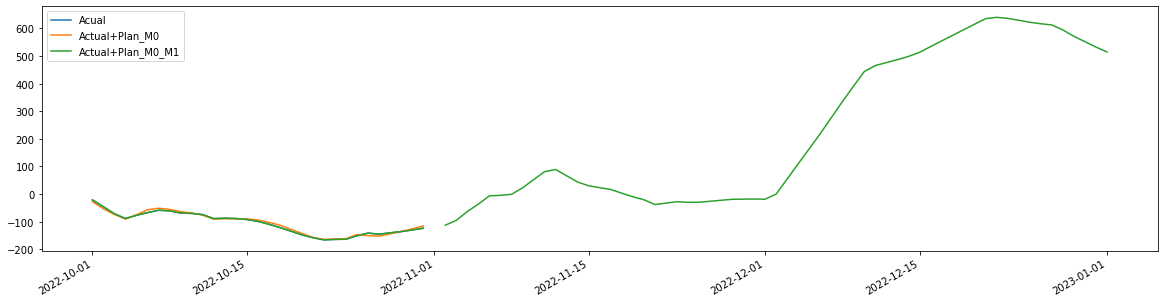

In [39]:

index = df_combine['EBA_DATE'].tolist()
Act = df_combine['Accumulation_PI'].tolist()

# EBA_M0 = df_combine['Accumulation_PI_EBA_M0'].tolist()
# EBA_M1 = df_combine['Accumulation_EBA_M1'].tolist()
PI_EBA_M0 = df_combine['Accumulation_PI_EBA_M0'].tolist()
PI_EBA_M0_M1 = df_combine['Accumulation_PI_EBA_M1'].tolist()
df = pd.DataFrame({'Acual': Act,'Actual+Plan_M0': PI_EBA_M0,'Actual+Plan_M0_M1': PI_EBA_M0_M1}, index=index) #,'EBA_M1': EBA_M1,  'Actual+Plan_M1': PI_EBA_M1
ax = df.plot.line(figsize=(20,5))

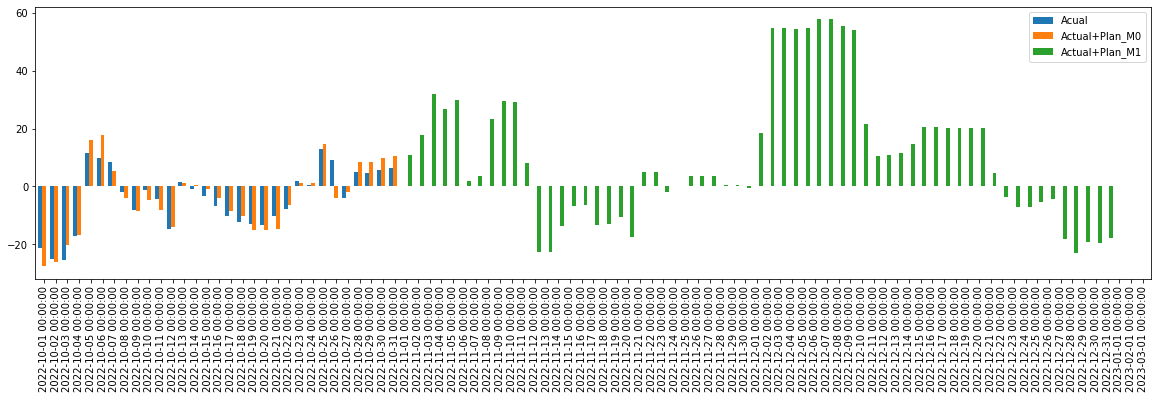

In [40]:


index = df_combine['EBA_DATE'].tolist()
Act = df_combine['Balance_New'].tolist()
# EBA = df_combine['Production-Customer_Act_M0'].tolist()
PI_EBA_M0 = df_combine['Production-Customer_Act_M0'].tolist()
PI_EBA_M1 = df_combine['Production-Customer_M1'].tolist()
df = pd.DataFrame({'Acual': Act, 'Actual+Plan_M0': PI_EBA_M0,'Actual+Plan_M1': PI_EBA_M1}, index=index) 
ax = df.plot.bar(width=1,figsize=(20,5))




In [41]:
df_Storage = pd.read_csv('/Users/patsanan/Documents/Inventory/df_Storage_cal_22_11_19.csv')

In [42]:
df_Storage['EBA_DATE'] = pd.to_datetime(df_Storage['EBA_DATE'])

In [43]:
Storage_PI_EBA = [ df_combine, df_Storage] 
df_Storage_PI_EBA = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE' , how="outer"), Storage_PI_EBA)

In [44]:
PI_Storage = df_Storage_PI_EBA['C3_Total'][df_Storage_PI_EBA['EBA_DATE'] <= today]

EBA_Balance_M1 = df_Storage_PI_EBA['Balanc_PI_EBA_M1'][df_Storage_PI_EBA['EBA_DATE'] > today]


df_Storage_PI_EBA['Balanc_PI_EBA_M1'] = pd.concat([PI_Balance, EBA_Balance_M1], ignore_index=True)


In [45]:
df_production_M1_M2[df_production_M1_M2['EBA_DATE'] == '2022-11-01']['M1_H05MOC004_MOC_C3_ORU'][1]

68.46783323091667

In [46]:
for i in range(len(df_Storage_PI_EBA)):
    if (str(df_Storage_PI_EBA ['EBA_DATE'][i]) > today) & (str(df_Storage_PI_EBA ['EBA_DATE'][i]) < '2022-11-01')  :
        df_Storage_PI_EBA['C3_Total'][i] = df_Storage_PI_EBA['C3_Total'][i-1] + df_Storage_PI_EBA['Balanc_PI_EBA_M0'][i]
    
    elif (str(df_Storage_PI_EBA ['EBA_DATE'][i])  > '2022-11-01')   :
        df_Storage_PI_EBA['C3_Total'][i] = df_Storage_PI_EBA['C3_Total'][i-1] + df_Storage_PI_EBA['Production-Customer_M1'][i]
    

<ipython-input-46-d7709276599b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Storage_PI_EBA['C3_Total'][i] = df_Storage_PI_EBA['C3_Total'][i-1] + df_Storage_PI_EBA['Production-Customer_M1'][i]


In [47]:
df_Storage_PI_EBA['Balance_MTT_TK_301A_B'] = df_Storage_PI_EBA['MTT_TK_301A'] + df_Storage_PI_EBA['MTT_TK_301B']

In [48]:
# manual_input = 20 #what is manual input for MTT

In [49]:
for i in range(len(df_Storage_PI_EBA)):
    if (str(df_Storage_PI_EBA ['EBA_DATE'][i]) > today)   :
        df_Storage_PI_EBA['ROC_TK_1300C'][i] = df_Storage_PI_EBA['ROC_TK_1300C'][17] 
        df_Storage_PI_EBA['MOC_TK_1310C'][i] = df_Storage_PI_EBA['MOC_TK_1310C'][17] 
        df_Storage_PI_EBA['MTT_TK_301B'][i] = df_Storage_PI_EBA['MTT_TK_301B'][17]
        # df_Storage_PI_EBA['Balance_MTT_TK_301A_B'][i] = df_Storage_PI_EBA['Balance_MTT_TK_301A_B'][17] - (manual_input*24)
        df_Storage_PI_EBA['MTT_TK_301A'][i] = df_Storage_PI_EBA['Balance_MTT_TK_301A_B'][i] - df_Storage_PI_EBA['MTT_TK_301B'][i]
        df_Storage_PI_EBA['C3_Site'][i] = df_Storage_PI_EBA['C3_Total'][i] + df_Storage_PI_EBA['ROC_TK_1300C'][i] - df_Storage_PI_EBA['MTT_TK_301A'][i] -df_Storage_PI_EBA['MTT_TK_301B'][i]
      
    
   

<ipython-input-49-e486bbd826d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Storage_PI_EBA['ROC_TK_1300C'][i] = df_Storage_PI_EBA['ROC_TK_1300C'][17]
<ipython-input-49-e486bbd826d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Storage_PI_EBA['MOC_TK_1310C'][i] = df_Storage_PI_EBA['MOC_TK_1310C'][17]
<ipython-input-49-e486bbd826d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Storage_PI_EBA['MTT_TK_301B'][i] = df_S

In [50]:
Max_C3_Inventory_Op = 14274
Min_C3_Inventory_Op = 903
Max_C3_Inventory_Cr = 9800
Min_C3_Inventory_Cr = 2540
df_Storage_PI_EBA['Max_C3_Inventory_Op'] = Max_C3_Inventory_Op
df_Storage_PI_EBA['Min_C3_Inventory_Op'] = Min_C3_Inventory_Op
df_Storage_PI_EBA['Max_C3_Inventory'] = Max_C3_Inventory_Cr
df_Storage_PI_EBA['Min_C3_Inventory'] = Min_C3_Inventory_Cr

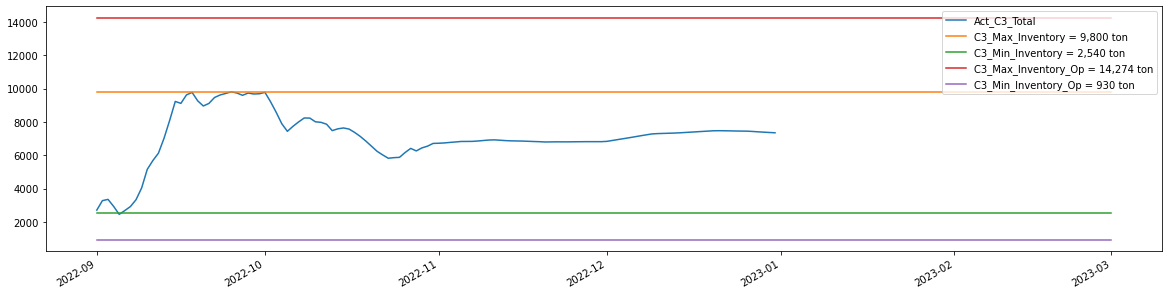

In [51]:
index = df_Storage_PI_EBA['EBA_DATE'].tolist()
C3_Total = df_Storage_PI_EBA['C3_Total'].tolist()
C3_Max = df_Storage_PI_EBA['Max_C3_Inventory'].tolist()
C3_Min = df_Storage_PI_EBA['Min_C3_Inventory'].tolist()
C3_Max_Op = df_Storage_PI_EBA['Max_C3_Inventory_Op'].tolist()
C3_Min_Op = df_Storage_PI_EBA['Min_C3_Inventory_Op'].tolist()
df = pd.DataFrame({'Act_C3_Total': C3_Total, 'C3_Max_Inventory = 9,800 ton' : C3_Max, 'C3_Min_Inventory = 2,540 ton' : C3_Min, 'C3_Max_Inventory_Op = 14,274 ton' : C3_Max_Op, 'C3_Min_Inventory_Op = 930 ton' : C3_Min_Op}, index=index)
ax = df.plot.line(figsize=(20,5))
plt.legend(loc='upper right')


C2 Calculation


In [52]:
#M0 Oct 22
df = df_C2C3C4C5.copy() 
df = df[(df['EBA_DATE'] >= '2022-11-01')  ]

select_cols = ['EBA_DATE', 'NUMBER_VALUE', 'UPDATE_DATE' ]

df_ODMC2P001 = df.query('DATA_ELEMENT_CODE == "ODMC2P001" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P002 = df.query('DATA_ELEMENT_CODE == "ODMC2P002" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P037 = df.query('DATA_ELEMENT_CODE == "ODMC2P037" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P003 = df.query('DATA_ELEMENT_CODE == "ODMC2P003" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P007 = df.query('DATA_ELEMENT_CODE == "ODMC2P007" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P008 = df.query('DATA_ELEMENT_CODE == "ODMC2P008" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P004 = df.query('DATA_ELEMENT_CODE == "ODMC2P004" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P009 = df.query('DATA_ELEMENT_CODE == "ODMC2P009" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P010 = df.query('DATA_ELEMENT_CODE == "ODMC2P010" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P038 = df.query('DATA_ELEMENT_CODE == "ODMC2P038" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P005 = df.query('DATA_ELEMENT_CODE == "ODMC2P005" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P011 = df.query('DATA_ELEMENT_CODE == "ODMC2P011" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P013 = df.query('DATA_ELEMENT_CODE == "ODMC2P013" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P012 = df.query('DATA_ELEMENT_CODE == "ODMC2P012" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P016 = df.query('DATA_ELEMENT_CODE == "ODMC2P016" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P017 = df.query('DATA_ELEMENT_CODE == "ODMC2P017" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P019 = df.query('DATA_ELEMENT_CODE == "ODMC2P019" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P020 = df.query('DATA_ELEMENT_CODE == "ODMC2P020" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P032 = df.query('DATA_ELEMENT_CODE == "ODMC2P032" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMC2P033 = df.query('DATA_ELEMENT_CODE == "ODMC2P033" & SCENARIO == "OLEFINS-EA"')[select_cols]

df_ODMC2P001.columns = ['EBA_DATE' , 'ODMC2P001_ROC_ETHYLENE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE']
df_ODMC2P002.columns = ['EBA_DATE' , 'ODMC2P002_MOC_ETHYLENE_ORU_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE']
df_ODMC2P037.columns = ['EBA_DATE' , 'ODMC2P037_MOC_ETHYLENE_SIDE_CRACKER_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE']
df_ODMC2P003.columns = ['EBA_DATE' , 'ODMC2P003_ROC_ETHYLENE_INVENTORY_TK-1200_(TON)_BY_PL_M0','UPDATE_DATE']
df_ODMC2P007.columns = ['EBA_DATE' , 'ODMC2P007_ROC_ETHYLENE_INVENTORY_TK-1201A_(TON)_BY_PL_M0','UPDATE_DATE']
df_ODMC2P008.columns = ['EBA_DATE' , 'ODMC2P008_ROC_ETHYLENE_INVENTORY_TK-1201B_(TON)_BY_PL_M0','UPDATE_DATE']
df_ODMC2P004.columns = ['EBA_DATE' , 'ODMC2P004_MOC_ETHYLENE_INVENTORY_TK-1210A_(TON)_BY_PL_M0','UPDATE_DATE']
df_ODMC2P009.columns = ['EBA_DATE' , 'ODMC2P009_MOC_ETHYLENE_INVENTORY_TK-1210B_(TON)_BY_PL_M0','UPDATE_DATE']
df_ODMC2P010.columns = ['EBA_DATE' , 'ODMC2P010_MOC_ETHYLENE_INVENTORY_TK-1210C_(TON)_BY_PL_M0','UPDATE_DATE']
df_ODMC2P038.columns = ['EBA_DATE' , 'ODMC2P038_MOC_ETHYLENE_INVENTORY_TK-1210D_(TON)_BY_PL_M0','UPDATE_DATE']
df_ODMC2P005.columns = ['EBA_DATE' , 'ODMC2P005_MTT_ETHYLENE_INVENTORY_TK-101_(TON)_BY_PL_M0','UPDATE_DATE']
df_ODMC2P011.columns = ['EBA_DATE' , 'ODMC2P011_IMPORT_C2_Volume_M0','UPDATE_DATE']
df_ODMC2P013.columns = ['EBA_DATE' , 'ODMC2P013_EXPORT_C2_VOLUME_M0','UPDATE_DATE']
df_ODMC2P012.columns = ['EBA_DATE' , 'ODMC2P012_Import/Export_C2_Laycan_M0','UPDATE_DATE']
df_ODMC2P016.columns = ['EBA_DATE' , 'ODMC2P016_Target_ROC_ETHYLENE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE']
df_ODMC2P017.columns = ['EBA_DATE' , 'ODMC2P017_Target_MOC_ETHYLENE_ORU_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE']
df_ODMC2P019.columns = ['EBA_DATE' , 'ODMC2P019_ETHYLENE_SENDOUT_FROM_TK-1200_M0','UPDATE_DATE']
df_ODMC2P020.columns = ['EBA_DATE' , 'ODMC2P020_ETHYLENE_SENDOUT_FROM_TK-1201A_M0','UPDATE_DATE']
df_ODMC2P032.columns = ['EBA_DATE' , 'ODMC2P032_ETHYLENE_SENDOUT_FROM_TK-101_M0','UPDATE_DATE']
df_ODMC2P033.columns = ['EBA_DATE' , 'ODMC2P033_ETHYLENE_SENDOUT_FROM_TK-1210A_M0','UPDATE_DATE']

df_ODMC2P001 = df_ODMC2P001[df_ODMC2P001['UPDATE_DATE'] == str(df_ODMC2P001['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P001_ROC_ETHYLENE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE']]
df_ODMC2P002 = df_ODMC2P002[df_ODMC2P002['UPDATE_DATE'] == str(df_ODMC2P002['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P002_MOC_ETHYLENE_ORU_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE']]
df_ODMC2P037 = df_ODMC2P037[df_ODMC2P037['UPDATE_DATE'] == str(df_ODMC2P037['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P037_MOC_ETHYLENE_SIDE_CRACKER_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE']]
df_ODMC2P003 = df_ODMC2P003[df_ODMC2P003['UPDATE_DATE'] == str(df_ODMC2P003['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P003_ROC_ETHYLENE_INVENTORY_TK-1200_(TON)_BY_PL_M0','UPDATE_DATE']]
df_ODMC2P007 = df_ODMC2P007[df_ODMC2P007['UPDATE_DATE'] == str(df_ODMC2P007['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P007_ROC_ETHYLENE_INVENTORY_TK-1201A_(TON)_BY_PL_M0','UPDATE_DATE']]
df_ODMC2P008 = df_ODMC2P008[df_ODMC2P008['UPDATE_DATE'] == str(df_ODMC2P008['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P008_ROC_ETHYLENE_INVENTORY_TK-1201B_(TON)_BY_PL_M0','UPDATE_DATE']]
df_ODMC2P004 = df_ODMC2P004[df_ODMC2P004['UPDATE_DATE'] == str(df_ODMC2P004['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P004_MOC_ETHYLENE_INVENTORY_TK-1210A_(TON)_BY_PL_M0','UPDATE_DATE']]
df_ODMC2P009 = df_ODMC2P009[df_ODMC2P009['UPDATE_DATE'] == str(df_ODMC2P009['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P009_MOC_ETHYLENE_INVENTORY_TK-1210B_(TON)_BY_PL_M0','UPDATE_DATE']]
df_ODMC2P010 = df_ODMC2P010[df_ODMC2P010['UPDATE_DATE'] == str(df_ODMC2P010['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P010_MOC_ETHYLENE_INVENTORY_TK-1210C_(TON)_BY_PL_M0','UPDATE_DATE']]
df_ODMC2P038 = df_ODMC2P038[df_ODMC2P038['UPDATE_DATE'] == str(df_ODMC2P038['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P038_MOC_ETHYLENE_INVENTORY_TK-1210D_(TON)_BY_PL_M0','UPDATE_DATE']]
df_ODMC2P005 = df_ODMC2P005[df_ODMC2P005['UPDATE_DATE'] == str(df_ODMC2P005['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P005_MTT_ETHYLENE_INVENTORY_TK-101_(TON)_BY_PL_M0','UPDATE_DATE']]
df_ODMC2P011 = df_ODMC2P011[df_ODMC2P011['UPDATE_DATE'] == str(df_ODMC2P011['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P011_IMPORT_C2_Volume_M0','UPDATE_DATE']]
df_ODMC2P013 = df_ODMC2P013[df_ODMC2P013['UPDATE_DATE'] == str(df_ODMC2P013['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P013_EXPORT_C2_VOLUME_M0','UPDATE_DATE']]
df_ODMC2P012 = df_ODMC2P012[df_ODMC2P012['UPDATE_DATE'] == str(df_ODMC2P012['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P012_Import/Export_C2_Laycan_M0','UPDATE_DATE']]
df_ODMC2P016 = df_ODMC2P016[df_ODMC2P016['UPDATE_DATE'] == str(df_ODMC2P016['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P016_Target_ROC_ETHYLENE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE']]
df_ODMC2P017 = df_ODMC2P017[df_ODMC2P017['UPDATE_DATE'] == str(df_ODMC2P017['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P017_Target_MOC_ETHYLENE_ORU_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE']]
df_ODMC2P019 = df_ODMC2P019[df_ODMC2P019['UPDATE_DATE'] == str(df_ODMC2P019['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P019_ETHYLENE_SENDOUT_FROM_TK-1200_M0','UPDATE_DATE']]
df_ODMC2P020 = df_ODMC2P020[df_ODMC2P020['UPDATE_DATE'] == str(df_ODMC2P020['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P020_ETHYLENE_SENDOUT_FROM_TK-1201A_M0','UPDATE_DATE']]
df_ODMC2P032 = df_ODMC2P032[df_ODMC2P032['UPDATE_DATE'] == str(df_ODMC2P032['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P032_ETHYLENE_SENDOUT_FROM_TK-101_M0','UPDATE_DATE']]
df_ODMC2P033 = df_ODMC2P033[df_ODMC2P033['UPDATE_DATE'] == str(df_ODMC2P033['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P033_ETHYLENE_SENDOUT_FROM_TK-1210A_M0','UPDATE_DATE']]



In [53]:
dfs= [df_ODMC2P001, df_ODMC2P002,df_ODMC2P037, df_ODMC2P003, df_ODMC2P007, df_ODMC2P008, df_ODMC2P004, df_ODMC2P009, df_ODMC2P010, 
df_ODMC2P038, df_ODMC2P005, df_ODMC2P011, df_ODMC2P013, df_ODMC2P012, df_ODMC2P016, df_ODMC2P017, df_ODMC2P019, df_ODMC2P020, df_ODMC2P032, df_ODMC2P033 ] 
df_M0 = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs)

In [54]:
#M1

select_cols = ['EBA_DATE', 'NUMBER_VALUE', 'UPDATE_DATE' ]

df_ODMC2P001 = df.query('DATA_ELEMENT_CODE == "ODMC2P001" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P002 = df.query('DATA_ELEMENT_CODE == "ODMC2P002" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P037 = df.query('DATA_ELEMENT_CODE == "ODMC2P037" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P003 = df.query('DATA_ELEMENT_CODE == "ODMC2P003" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P007 = df.query('DATA_ELEMENT_CODE == "ODMC2P007" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P008 = df.query('DATA_ELEMENT_CODE == "ODMC2P008" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P004 = df.query('DATA_ELEMENT_CODE == "ODMC2P004" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P009 = df.query('DATA_ELEMENT_CODE == "ODMC2P009" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P010 = df.query('DATA_ELEMENT_CODE == "ODMC2P010" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P038 = df.query('DATA_ELEMENT_CODE == "ODMC2P038" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P005 = df.query('DATA_ELEMENT_CODE == "ODMC2P005" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P011 = df.query('DATA_ELEMENT_CODE == "ODMC2P011" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P013 = df.query('DATA_ELEMENT_CODE == "ODMC2P013" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P012 = df.query('DATA_ELEMENT_CODE == "ODMC2P012" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P016 = df.query('DATA_ELEMENT_CODE == "ODMC2P016" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P017 = df.query('DATA_ELEMENT_CODE == "ODMC2P017" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P019 = df.query('DATA_ELEMENT_CODE == "ODMC2P019" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P020 = df.query('DATA_ELEMENT_CODE == "ODMC2P020" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P032 = df.query('DATA_ELEMENT_CODE == "ODMC2P032" & SCENARIO == "Normal"')[select_cols]
df_ODMC2P033 = df.query('DATA_ELEMENT_CODE == "ODMC2P033" & SCENARIO == "Normal"')[select_cols]


df_ODMC2P001.columns = ['EBA_DATE' , 'ODMC2P001_ROC_ETHYLENE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE']
df_ODMC2P002.columns = ['EBA_DATE' , 'ODMC2P002_MOC_ETHYLENE_ORU_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE']
df_ODMC2P037.columns = ['EBA_DATE' , 'ODMC2P037_MOC_ETHYLENE_SIDE_CRACKER_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE']
df_ODMC2P003.columns = ['EBA_DATE' , 'ODMC2P003_ROC_ETHYLENE_INVENTORY_TK-1200_(TON)_BY_PL_M1','UPDATE_DATE']
df_ODMC2P007.columns = ['EBA_DATE' , 'ODMC2P007_ROC_ETHYLENE_INVENTORY_TK-1201A_(TON)_BY_PL_M1','UPDATE_DATE']
df_ODMC2P008.columns = ['EBA_DATE' , 'ODMC2P008_ROC_ETHYLENE_INVENTORY_TK-1201B_(TON)_BY_PL_M1','UPDATE_DATE']
df_ODMC2P004.columns = ['EBA_DATE' , 'ODMC2P004_MOC_ETHYLENE_INVENTORY_TK-1210A_(TON)_BY_PL_M1','UPDATE_DATE']
df_ODMC2P009.columns = ['EBA_DATE' , 'ODMC2P009_MOC_ETHYLENE_INVENTORY_TK-1210B_(TON)_BY_PL_M1','UPDATE_DATE']
df_ODMC2P010.columns = ['EBA_DATE' , 'ODMC2P010_MOC_ETHYLENE_INVENTORY_TK-1210C_(TON)_BY_PL_M1','UPDATE_DATE']
df_ODMC2P038.columns = ['EBA_DATE' , 'ODMC2P038_MOC_ETHYLENE_INVENTORY_TK-1210D_(TON)_BY_PL_M1','UPDATE_DATE']
df_ODMC2P005.columns = ['EBA_DATE' , 'ODMC2P005_MTT_ETHYLENE_INVENTORY_TK-101_(TON)_BY_PL_M1','UPDATE_DATE']
df_ODMC2P011.columns = ['EBA_DATE' , 'ODMC2P011_IMPORT_C2_Volume_M1','UPDATE_DATE']
df_ODMC2P013.columns = ['EBA_DATE' , 'ODMC2P013_EXPORT_C2_VOLUME_M1','UPDATE_DATE']
df_ODMC2P012.columns = ['EBA_DATE' , 'ODMC2P012_Import/Export_C2_Laycan_M1','UPDATE_DATE']
df_ODMC2P016.columns = ['EBA_DATE' , 'ODMC2P016_Target_ROC_ETHYLENE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE']
df_ODMC2P017.columns = ['EBA_DATE' , 'ODMC2P017_Target_MOC_ETHYLENE_ORU_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE']
df_ODMC2P019.columns = ['EBA_DATE' , 'ODMC2P019_ETHYLENE_SENDOUT_FROM_TK-1200_M1','UPDATE_DATE']
df_ODMC2P020.columns = ['EBA_DATE' , 'ODMC2P020_ETHYLENE_SENDOUT_FROM_TK-1201A_M1','UPDATE_DATE']
df_ODMC2P032.columns = ['EBA_DATE' , 'ODMC2P032_ETHYLENE_SENDOUT_FROM_TK-101_M1','UPDATE_DATE']
df_ODMC2P033.columns = ['EBA_DATE' , 'ODMC2P033_ETHYLENE_SENDOUT_FROM_TK-1210A_M1','UPDATE_DATE']


df_ODMC2P001 = df_ODMC2P001[df_ODMC2P001['UPDATE_DATE'] == str(df_ODMC2P001['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P001_ROC_ETHYLENE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE']]
df_ODMC2P002 = df_ODMC2P002[df_ODMC2P002['UPDATE_DATE'] == str(df_ODMC2P002['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P002_MOC_ETHYLENE_ORU_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE']]
df_ODMC2P037 = df_ODMC2P037[df_ODMC2P037['UPDATE_DATE'] == str(df_ODMC2P037['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P037_MOC_ETHYLENE_SIDE_CRACKER_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE']]
df_ODMC2P003 = df_ODMC2P003[df_ODMC2P003['UPDATE_DATE'] == str(df_ODMC2P003['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P003_ROC_ETHYLENE_INVENTORY_TK-1200_(TON)_BY_PL_M1','UPDATE_DATE']]
df_ODMC2P007 = df_ODMC2P007[df_ODMC2P007['UPDATE_DATE'] == str(df_ODMC2P007['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P007_ROC_ETHYLENE_INVENTORY_TK-1201A_(TON)_BY_PL_M1','UPDATE_DATE']]
df_ODMC2P008 = df_ODMC2P008[df_ODMC2P008['UPDATE_DATE'] == str(df_ODMC2P008['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P008_ROC_ETHYLENE_INVENTORY_TK-1201B_(TON)_BY_PL_M1','UPDATE_DATE']]
df_ODMC2P004 = df_ODMC2P004[df_ODMC2P004['UPDATE_DATE'] == str(df_ODMC2P004['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P004_MOC_ETHYLENE_INVENTORY_TK-1210A_(TON)_BY_PL_M1','UPDATE_DATE']]
df_ODMC2P009 = df_ODMC2P009[df_ODMC2P009['UPDATE_DATE'] == str(df_ODMC2P009['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P009_MOC_ETHYLENE_INVENTORY_TK-1210B_(TON)_BY_PL_M1','UPDATE_DATE']]
df_ODMC2P010 = df_ODMC2P010[df_ODMC2P010['UPDATE_DATE'] == str(df_ODMC2P010['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P010_MOC_ETHYLENE_INVENTORY_TK-1210C_(TON)_BY_PL_M1','UPDATE_DATE']]
df_ODMC2P038 = df_ODMC2P038[df_ODMC2P038['UPDATE_DATE'] == str(df_ODMC2P038['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P038_MOC_ETHYLENE_INVENTORY_TK-1210D_(TON)_BY_PL_M1','UPDATE_DATE']]
df_ODMC2P005 = df_ODMC2P005[df_ODMC2P005['UPDATE_DATE'] == str(df_ODMC2P005['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P005_MTT_ETHYLENE_INVENTORY_TK-101_(TON)_BY_PL_M1','UPDATE_DATE']]
df_ODMC2P011 = df_ODMC2P011[df_ODMC2P011['UPDATE_DATE'] == str(df_ODMC2P011['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P011_IMPORT_C2_Volume_M1','UPDATE_DATE']]
df_ODMC2P013 = df_ODMC2P013[df_ODMC2P013['UPDATE_DATE'] == str(df_ODMC2P013['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P013_EXPORT_C2_VOLUME_M1','UPDATE_DATE']]
df_ODMC2P012 = df_ODMC2P012[df_ODMC2P012['UPDATE_DATE'] == str(df_ODMC2P012['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P012_Import/Export_C2_Laycan_M1','UPDATE_DATE']]
df_ODMC2P016 = df_ODMC2P016[df_ODMC2P016['UPDATE_DATE'] == str(df_ODMC2P016['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P016_Target_ROC_ETHYLENE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE']]
df_ODMC2P017 = df_ODMC2P017[df_ODMC2P017['UPDATE_DATE'] == str(df_ODMC2P017['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P017_Target_MOC_ETHYLENE_ORU_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE']]
df_ODMC2P019 = df_ODMC2P019[df_ODMC2P019['UPDATE_DATE'] == str(df_ODMC2P019['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P019_ETHYLENE_SENDOUT_FROM_TK-1200_M1','UPDATE_DATE']]
df_ODMC2P020 = df_ODMC2P020[df_ODMC2P020['UPDATE_DATE'] == str(df_ODMC2P020['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P020_ETHYLENE_SENDOUT_FROM_TK-1201A_M1','UPDATE_DATE']]
df_ODMC2P032 = df_ODMC2P032[df_ODMC2P032['UPDATE_DATE'] == str(df_ODMC2P032['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P032_ETHYLENE_SENDOUT_FROM_TK-101_M1','UPDATE_DATE']]
df_ODMC2P033 = df_ODMC2P033[df_ODMC2P033['UPDATE_DATE'] == str(df_ODMC2P033['UPDATE_DATE'].max())][['EBA_DATE' , 'ODMC2P033_ETHYLENE_SENDOUT_FROM_TK-1210A_M1','UPDATE_DATE']]




In [55]:
dfs= [df_ODMC2P001, df_ODMC2P002,df_ODMC2P037, df_ODMC2P003, df_ODMC2P007, df_ODMC2P008, df_ODMC2P004, df_ODMC2P009, df_ODMC2P010, df_ODMC2P038,
 df_ODMC2P005, df_ODMC2P011, df_ODMC2P013, df_ODMC2P012, df_ODMC2P016, df_ODMC2P017,df_ODMC2P019, df_ODMC2P020, df_ODMC2P032, df_ODMC2P033 ] 
df_M1 = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs)

In [56]:
M0_M1 = [ df_M0 ,df_M1 ] 
df = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), M0_M1)

In [57]:

# 'ODMC2P016_Target_ROC_ETHYLENE_PRODUCTION_(T/H)_BY_PL',
# 'ODMC2P017_Target_MOC_ETHYLENE_ORU_PRODUCTION_(T/H)_BY_PL',

In [58]:
df['Total_Purchase_Volume_(TON)_M0'] = df['ODMC2P011_IMPORT_C2_Volume_M0'] + df['ODMC2P012_Import/Export_C2_Laycan_M0']
df['Total_Purchase_Volume_(TON)_M1'] = df['ODMC2P011_IMPORT_C2_Volume_M1'] + df['ODMC2P012_Import/Export_C2_Laycan_M1']

df['Total_Production_Volume_(TON)_M0'] = (df['ODMC2P001_ROC_ETHYLENE_PRODUCTION_(T/H)_BY_PL_M0'] + df['ODMC2P002_MOC_ETHYLENE_ORU_PRODUCTION_(T/H)_BY_PL_M0'] + df['ODMC2P037_MOC_ETHYLENE_SIDE_CRACKER_PRODUCTION_(T/H)_BY_PL_M0'])*24
df['Total_Production_Volume_(TON)_M1'] = (df['ODMC2P001_ROC_ETHYLENE_PRODUCTION_(T/H)_BY_PL_M1'] + df['ODMC2P002_MOC_ETHYLENE_ORU_PRODUCTION_(T/H)_BY_PL_M1'] + df['ODMC2P037_MOC_ETHYLENE_SIDE_CRACKER_PRODUCTION_(T/H)_BY_PL_M1'])*24

df['Total_Consumption_Volume_(TON)_M0'] = df['ODMC2P013_EXPORT_C2_VOLUME_M0'] + (df['ODMC2P019_ETHYLENE_SENDOUT_FROM_TK-1200_M0']+ df['ODMC2P020_ETHYLENE_SENDOUT_FROM_TK-1201A_M0']- df['ODMC2P032_ETHYLENE_SENDOUT_FROM_TK-101_M0']- df['ODMC2P033_ETHYLENE_SENDOUT_FROM_TK-1210A_M0'])*24
df['Total_Consumption_Volume_(TON)_M1'] = df['ODMC2P013_EXPORT_C2_VOLUME_M1'] + (df['ODMC2P019_ETHYLENE_SENDOUT_FROM_TK-1200_M1']+ df['ODMC2P020_ETHYLENE_SENDOUT_FROM_TK-1201A_M1']- df['ODMC2P032_ETHYLENE_SENDOUT_FROM_TK-101_M1']- df['ODMC2P033_ETHYLENE_SENDOUT_FROM_TK-1210A_M1'])*24

In [59]:
df['Balance_(TON)_M0'] = df['Total_Purchase_Volume_(TON)_M0'] + df['Total_Production_Volume_(TON)_M0'] - df['Total_Consumption_Volume_(TON)_M0']


In [60]:
df['Balance_(TON)_M1'] = df['Total_Purchase_Volume_(TON)_M1'] + df['Total_Production_Volume_(TON)_M1'] - df['Total_Consumption_Volume_(TON)_M1']

In [61]:
df['Total_C2_Inventory_TK-1200_TK-1201AB_TK-1210ABCD_TK-101_M0'] = df['ODMC2P003_ROC_ETHYLENE_INVENTORY_TK-1200_(TON)_BY_PL_M0']+ df['ODMC2P007_ROC_ETHYLENE_INVENTORY_TK-1201A_(TON)_BY_PL_M0']+ df['ODMC2P004_MOC_ETHYLENE_INVENTORY_TK-1210A_(TON)_BY_PL_M0']+ df['ODMC2P009_MOC_ETHYLENE_INVENTORY_TK-1210B_(TON)_BY_PL_M0'] + df['ODMC2P038_MOC_ETHYLENE_INVENTORY_TK-1210D_(TON)_BY_PL_M0']+ df['ODMC2P005_MTT_ETHYLENE_INVENTORY_TK-101_(TON)_BY_PL_M0']
# df['ODMC2P008_ROC_ETHYLENE_INVENTORY_TK-1201B_(TON)_BY_PL_M0']

# df['ODMC2P010_MOC_ETHYLENE_INVENTORY_TK-1210C_(TON)_BY_PL_M0']

In [62]:
df['Total_C2_Inventory_TK-1200_TK-1201AB_TK-1210ABCD_TK-101_M1'] = df['ODMC2P003_ROC_ETHYLENE_INVENTORY_TK-1200_(TON)_BY_PL_M1']+ df['ODMC2P007_ROC_ETHYLENE_INVENTORY_TK-1201A_(TON)_BY_PL_M1']+ df['ODMC2P004_MOC_ETHYLENE_INVENTORY_TK-1210A_(TON)_BY_PL_M1']+ df['ODMC2P009_MOC_ETHYLENE_INVENTORY_TK-1210B_(TON)_BY_PL_M1'] + df['ODMC2P038_MOC_ETHYLENE_INVENTORY_TK-1210D_(TON)_BY_PL_M1']+ df['ODMC2P005_MTT_ETHYLENE_INVENTORY_TK-101_(TON)_BY_PL_M1']
# df['ODMC2P008_ROC_ETHYLENE_INVENTORY_TK-1201B_(TON)_BY_PL_M1']

# df['ODMC2P010_MOC_ETHYLENE_INVENTORY_TK-1210C_(TON)_BY_PL_M1']



In [63]:

TK_101_max = 9500
TK_101_min = 600
TK_1200_max = 8000
TK_1200_min = 1800
TK_1210ABD_max = 5400
TK_1210ABD_min = 1200
TK_1201A_max = 1000 
TK_1201A_min = 400


df['TK_101_max'] = TK_101_max
df['TK_1200_max'] = TK_1200_max
df['TK_1210ABD_max'] = TK_1210ABD_max
df['TK_1201A_max'] = TK_1201A_max
df['TK-1200_TK-1201AB_TK-1210ABCD_TK-101_max'] = df['TK_101_max']+ df['TK_1200_max'] +df['TK_1210ABD_max']+df['TK_1201A_max']
df['TK_101_min'] = TK_101_min
df['TK_1200_min'] = TK_1200_min
df['TK_1210ABD_min'] = TK_1210ABD_min
df['TK_1201A_min'] = TK_1201A_min
df['TK-1200_TK-1201AB_TK-1210ABCD_TK-101_min'] = df['TK_101_min']+ df['TK_1200_min'] +df['TK_1210ABD_min']+df['TK_1201A_min']


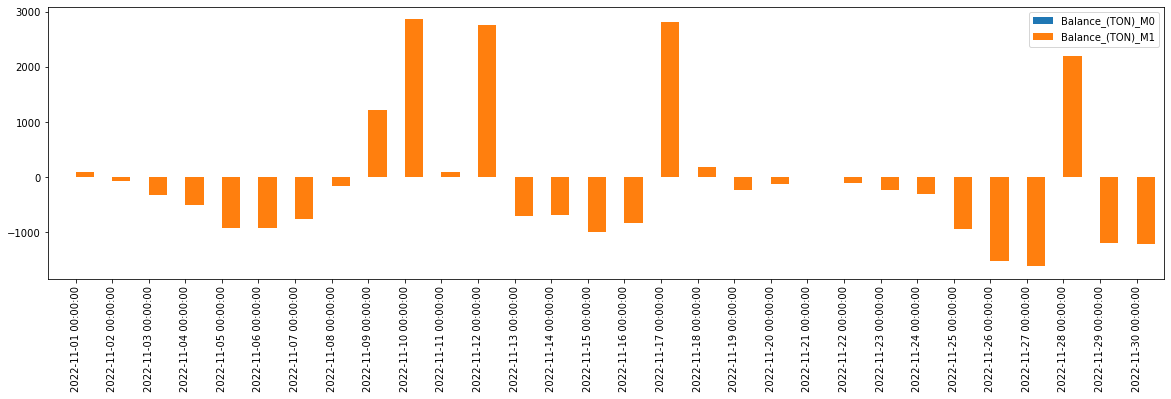

In [64]:
index = df['EBA_DATE'].tolist()
EBA_M0 = df['Balance_(TON)_M0'].tolist()
EBA_M1 = df['Balance_(TON)_M1'].tolist()
df_bar = pd.DataFrame({'Balance_(TON)_M0': EBA_M0 , 'Balance_(TON)_M1': EBA_M1}, index=index) 
ax = df_bar.plot.bar(width=1,figsize=(20,5))

In [65]:
today = '2022-11-01'	
M0 = df['Balance_(TON)_M0'][df['EBA_DATE'] < today]

M1 = df['Balance_(TON)_M1'][df['EBA_DATE'] >= today]
df['Balance_(TON)_M0_M1'] = pd.concat([M0, M1], ignore_index=True)
df['Accumulation_Balance_(TON)_M1'] = df['Balance_(TON)_M0_M1'].cumsum()
df['Accumulation_Balance_(TON)_M0'] = df['Balance_(TON)_M0'].cumsum()

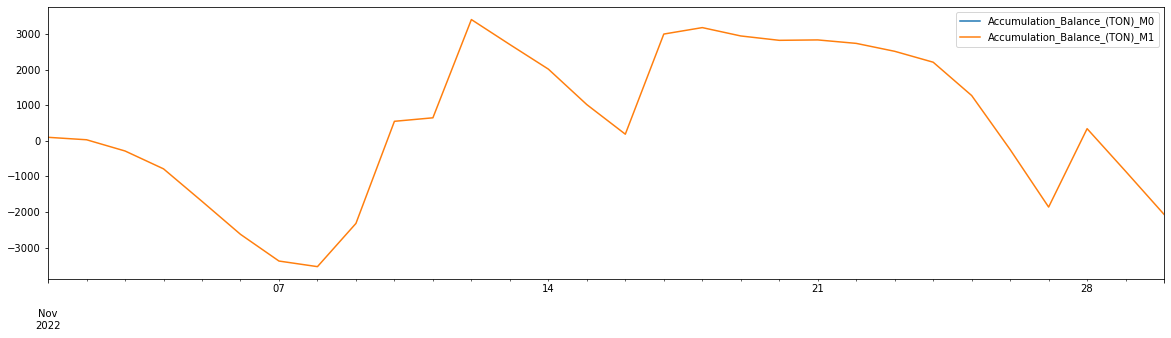

In [66]:
index = df['EBA_DATE'].tolist()
EBA_M0 = df['Accumulation_Balance_(TON)_M0'].tolist()
EBA_M1 = df['Accumulation_Balance_(TON)_M1'].tolist()
df_line = pd.DataFrame({'Accumulation_Balance_(TON)_M0': EBA_M0,'Accumulation_Balance_(TON)_M1': EBA_M1 }, index=index) #,'EBA_M1': EBA_M1,  'Actual+Plan_M1': PI_EBA_M1
ax = df_line.plot.line(figsize=(20,5))

In [67]:
df['EBA_DATE'][2] < df['EBA_DATE'][0]

False

In [68]:
cal_inventory_from_massbalance = []
for i in range(len(df)):
    if df['EBA_DATE'][i]==df['EBA_DATE'][0]:
        inventory = df['Total_C2_Inventory_TK-1200_TK-1201AB_TK-1210ABCD_TK-101_M0'][0]
        cal_inventory_from_massbalance.append(inventory)
    elif df['EBA_DATE'][i] > df['EBA_DATE'][0]:
        inventory = inventory + df['Balance_(TON)_M0_M1'][i]
        cal_inventory_from_massbalance.append(inventory)
df['cal_C2_inventory_from_massbalance'] = cal_inventory_from_massbalance

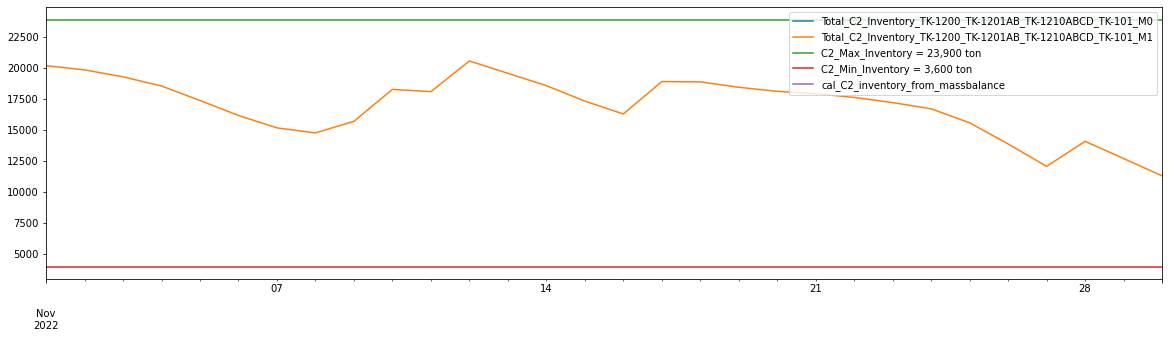

In [69]:
index = df['EBA_DATE'].tolist()
C2_Total_M0 = df['Total_C2_Inventory_TK-1200_TK-1201AB_TK-1210ABCD_TK-101_M0'].tolist()
C2_Total_M1 = df['Total_C2_Inventory_TK-1200_TK-1201AB_TK-1210ABCD_TK-101_M1'].tolist()
C2_Max = df['TK-1200_TK-1201AB_TK-1210ABCD_TK-101_max'].tolist()
C2_Min = df['TK-1200_TK-1201AB_TK-1210ABCD_TK-101_min'].tolist()
C2_Cal = df['cal_C2_inventory_from_massbalance'].tolist()
# C2_Max_Op = df['Max_C2_Inventory_Op'].tolist()
# C2_Min_Op = df['Min_C2_Inventory_Op'].tolist()
df_line = pd.DataFrame({'Total_C2_Inventory_TK-1200_TK-1201AB_TK-1210ABCD_TK-101_M0': C2_Total_M0, 
'Total_C2_Inventory_TK-1200_TK-1201AB_TK-1210ABCD_TK-101_M1': C2_Total_M1,
'C2_Max_Inventory = 23,900 ton' : C2_Max, 
'C2_Min_Inventory = 3,600 ton' : C2_Min,
'cal_C2_inventory_from_massbalance' : C2_Cal
}, index=index)
ax = df_line.plot.line(figsize=(20,5))
plt.legend(loc='upper right')

C4 Calculation


In [70]:
#M0 Oct 22
df= df_C2C3C4C5.copy() #[(df['EBA_DATE'] >= '2022-10-01') & (df['EBA_DATE'] < '2022-11-01')]
df = df[(df['EBA_DATE'] >= '2022-11-01')  ]

select_cols = ['EBA_DATE','NUMBER_VALUE','UPDATE_DATE','SCENARIO_DATE']

df_ODMC4P001 = df.query('DATA_ELEMENT_CODE == "ODMC4P001" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P002 = df.query('DATA_ELEMENT_CODE == "ODMC4P002" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P003 = df.query('DATA_ELEMENT_CODE == "ODMC4P003" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P004 = df.query('DATA_ELEMENT_CODE == "ODMC4P004" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P005 = df.query('DATA_ELEMENT_CODE == "ODMC4P005" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P006 = df.query('DATA_ELEMENT_CODE == "ODMC4P006" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P007 = df.query('DATA_ELEMENT_CODE == "ODMC4P007" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P008 = df.query('DATA_ELEMENT_CODE == "ODMC4P008" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P023 = df.query('DATA_ELEMENT_CODE == "ODMC4P023" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P024 = df.query('DATA_ELEMENT_CODE == "ODMC4P024" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P025 = df.query('DATA_ELEMENT_CODE == "ODMC4P025" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P046 = df.query('DATA_ELEMENT_CODE == "ODMC4P046" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P009 = df.query('DATA_ELEMENT_CODE == "ODMC4P009" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P010 = df.query('DATA_ELEMENT_CODE == "ODMC4P010" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P011 = df.query('DATA_ELEMENT_CODE == "ODMC4P011" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P012 = df.query('DATA_ELEMENT_CODE == "ODMC4P012" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P013 = df.query('DATA_ELEMENT_CODE == "ODMC4P013" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P014 = df.query('DATA_ELEMENT_CODE == "ODMC4P014" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P015 = df.query('DATA_ELEMENT_CODE == "ODMC4P015" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P016 = df.query('DATA_ELEMENT_CODE == "ODMC4P016" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P017 = df.query('DATA_ELEMENT_CODE == "ODMC4P017" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P018 = df.query('DATA_ELEMENT_CODE == "ODMC4P018" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P019 = df.query('DATA_ELEMENT_CODE == "ODMC4P019" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P020 = df.query('DATA_ELEMENT_CODE == "ODMC4P020" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P021 = df.query('DATA_ELEMENT_CODE == "ODMC4P021" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P026 = df.query('DATA_ELEMENT_CODE == "ODMC4P026" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P027 = df.query('DATA_ELEMENT_CODE == "ODMC4P027" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P028 = df.query('DATA_ELEMENT_CODE == "ODMC4P028" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P022 = df.query('DATA_ELEMENT_CODE == "ODMC4P022" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P029 = df.query('DATA_ELEMENT_CODE == "ODMC4P029" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P033 = df.query('DATA_ELEMENT_CODE == "ODMC4P033" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P030 = df.query('DATA_ELEMENT_CODE == "ODMC4P030" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P034 = df.query('DATA_ELEMENT_CODE == "ODMC4P034" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P031 = df.query('DATA_ELEMENT_CODE == "ODMC4P031" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P032 = df.query('DATA_ELEMENT_CODE == "ODMC4P032" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P035 = df.query('DATA_ELEMENT_CODE == "ODMC4P035" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P036 = df.query('DATA_ELEMENT_CODE == "ODMC4P036" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P037 = df.query('DATA_ELEMENT_CODE == "ODMC4P037" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P038 = df.query('DATA_ELEMENT_CODE == "ODMC4P038" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P039 = df.query('DATA_ELEMENT_CODE == "ODMC4P039" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P040 = df.query('DATA_ELEMENT_CODE == "ODMC4P040" & SCENARIO=="OLEFINS-EA"')[select_cols]
df_ODMC4P043 = df.query('DATA_ELEMENT_CODE == "ODMC4P043" & SCENARIO=="OLEFINS-EA"')[select_cols]

df_ODMC4P001.columns = ['EBA_DATE','ODMC4P001_MOC_MIXED_C4_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P002.columns = ['EBA_DATE','ODMC4P002_MOC_MIXED_C4_TO_BST_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P003.columns = ['EBA_DATE','ODMC4P003_MOC_MIXED_C4_TO_ROC_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P004.columns = ['EBA_DATE','ODMC4P004_MOC_MIXED_C4_EXPORT_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P005.columns = ['EBA_DATE','ODMC4P005_MOC_MIXED_C4_FEED_SHU-I&II_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P006.columns = ['EBA_DATE','ODMC4P006_MOC_C4_COCRACK_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P007.columns = ['EBA_DATE','ODMC4P007_MOC_HIB_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P008.columns = ['EBA_DATE','ODMC4P008_MOC_HIB_TO_TMMA_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P023.columns = ['EBA_DATE','ODMC4P023_MOC_LIB_FROM_TMMA_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P024.columns = ['EBA_DATE','ODMC4P024_MOC_LIB_CONSUMPTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P025.columns = ['EBA_DATE','ODMC4P025_MOC_MIXED_C4_FEED_OCT_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P046.columns = ['EBA_DATE','ODMC4P046_MOC_RAFF-II_NO_DME_FROM_BST_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P009.columns = ['EBA_DATE','ODMC4P009_MOC_Raff-II_FEED_TO_OCT_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P010.columns = ['EBA_DATE','ODMC4P010_MOC_ETHYLENE_OCU_CONSUMPTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P011.columns = ['EBA_DATE','ODMC4P011_MOC_PROPYLENE_OCU_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P012.columns = ['EBA_DATE','ODMC4P012_MOC_C4_RECYCLE_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P013.columns = ['EBA_DATE','ODMC4P013_MOC_C3/C2_OCU_CONVERSION_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P014.columns = ['EBA_DATE','ODMC4P014_MOC_C3/C4_OCU_CONVERSION_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P015.columns = ['EBA_DATE','ODMC4P015_ROC_MIXED_C4__PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P016.columns = ['EBA_DATE','ODMC4P016_ROC_MIXED_C4_TO_BST_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P017.columns = ['EBA_DATE','ODMC4P017_ROC_MIXED_C4_TO_MOC_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P018.columns = ['EBA_DATE','ODMC4P018_ROC_MIXED_C4_EXPORT_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P019.columns = ['EBA_DATE','ODMC4P019_ROC_MIXED_C4_FEED_TO_R-720_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P020.columns = ['EBA_DATE','ODMC4P020_ROC_C4_COCRACK_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P021.columns = ['EBA_DATE','ODMC4P021_TOTAL_MIXED_C4_INVENTORY_ROC&MOC_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P026.columns = ['EBA_DATE','ODMC4P026_ROC_MIXED_C4_INVENTORY_TK-1400A_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P027.columns = ['EBA_DATE','ODMC4P027_ROC_MIXED_C4_INVENTORY_TK-1400B_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P028.columns = ['EBA_DATE','ODMC4P028_MOC_MIXED_C4_INVENTORY_TK-1410_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P022.columns = ['EBA_DATE','ODMC4P022_MOC_HIB_INVENTORY_TK-1420_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P029.columns = ['EBA_DATE','ODMC4P029_MOC_RAFF-II_NO_DME_INVENTORY_TK-1430_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P033.columns = ['EBA_DATE','ODMC4P033_MOC_NB/LIB_INVENTORY_TK-1430_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P030.columns = ['EBA_DATE','ODMC4P030_ROC_MIXED_C4_SPECIAL_ACTIVITY_M0','UPDATE_DATE','SCENARIO_DATE'] ##
df_ODMC4P034.columns = ['EBA_DATE','ODMC4P034_MOC_MIXED_C4_SPECIAL_ACTIVITY_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P031.columns = ['EBA_DATE','ODMC4P031_C3_OCU_(EA)_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P032.columns = ['EBA_DATE','ODMC4P032_C2_Cons_(EA)_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P035.columns = ['EBA_DATE','ODMC4P035_HIB_MOC_to_ROC_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P036.columns = ['EBA_DATE','ODMC4P036_HIB_MOC_to_Cocrack_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P037.columns = ['EBA_DATE','ODMC4P037_NB_Production_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P038.columns = ['EBA_DATE','ODMC4P038_NB_MOC_to_ROC_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P039.columns = ['EBA_DATE','ODMC4P039_NB_MOC_to_Cocrack_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P040.columns = ['EBA_DATE','ODMC4P040_1430_balance_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P043.columns = ['EBA_DATE','ODMC4P043_Feed_SHU_(EA)_M0','UPDATE_DATE','SCENARIO_DATE']

df_ODMC4P001 = df_ODMC4P001[df_ODMC4P001['UPDATE_DATE']==str(df_ODMC4P001['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P001_MOC_MIXED_C4_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMC4P002 = df_ODMC4P002[df_ODMC4P002['UPDATE_DATE']==str(df_ODMC4P002['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P002_MOC_MIXED_C4_TO_BST_(T/H)_BY_PL_M0']]
df_ODMC4P003 = df_ODMC4P003[df_ODMC4P003['UPDATE_DATE']==str(df_ODMC4P003['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P003_MOC_MIXED_C4_TO_ROC_(T/H)_BY_PL_M0']]
df_ODMC4P004 = df_ODMC4P004[df_ODMC4P004['UPDATE_DATE']==str(df_ODMC4P004['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P004_MOC_MIXED_C4_EXPORT_(TON)_BY_PL_M0']]
df_ODMC4P005 = df_ODMC4P005[df_ODMC4P005['UPDATE_DATE']==str(df_ODMC4P005['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P005_MOC_MIXED_C4_FEED_SHU-I&II_(T/H)_BY_PL_M0']]
df_ODMC4P006 = df_ODMC4P006[df_ODMC4P006['UPDATE_DATE']==str(df_ODMC4P006['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P006_MOC_C4_COCRACK_(T/H)_BY_PL_M0']]
df_ODMC4P007 = df_ODMC4P007[df_ODMC4P007['UPDATE_DATE']==str(df_ODMC4P007['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P007_MOC_HIB_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMC4P008 = df_ODMC4P008[df_ODMC4P008['UPDATE_DATE']==str(df_ODMC4P008['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P008_MOC_HIB_TO_TMMA_(T/H)_BY_PL_M0']]
df_ODMC4P023 = df_ODMC4P023[df_ODMC4P023['UPDATE_DATE']==str(df_ODMC4P023['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P023_MOC_LIB_FROM_TMMA_(T/H)_BY_PL_M0']]
df_ODMC4P024 = df_ODMC4P024[df_ODMC4P024['UPDATE_DATE']==str(df_ODMC4P024['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P024_MOC_LIB_CONSUMPTION_(T/H)_BY_PL_M0']]
df_ODMC4P025 = df_ODMC4P025[df_ODMC4P025['UPDATE_DATE']==str(df_ODMC4P025['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P025_MOC_MIXED_C4_FEED_OCT_(T/H)_BY_PL_M0']]
df_ODMC4P046 = df_ODMC4P046[df_ODMC4P046['UPDATE_DATE']==str(df_ODMC4P046['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P046_MOC_RAFF-II_NO_DME_FROM_BST_(T/H)_BY_PL_M0']]
df_ODMC4P009 = df_ODMC4P009[df_ODMC4P009['UPDATE_DATE']==str(df_ODMC4P009['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P009_MOC_Raff-II_FEED_TO_OCT_(T/H)_BY_PL_M0']]
df_ODMC4P010 = df_ODMC4P010[df_ODMC4P010['UPDATE_DATE']==str(df_ODMC4P010['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P010_MOC_ETHYLENE_OCU_CONSUMPTION_(T/H)_BY_PL_M0']]
df_ODMC4P011 = df_ODMC4P011[df_ODMC4P011['UPDATE_DATE']==str(df_ODMC4P011['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P011_MOC_PROPYLENE_OCU_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMC4P012 = df_ODMC4P012[df_ODMC4P012['UPDATE_DATE']==str(df_ODMC4P012['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P012_MOC_C4_RECYCLE_(T/H)_BY_PL_M0']]
df_ODMC4P013 = df_ODMC4P013[df_ODMC4P013['UPDATE_DATE']==str(df_ODMC4P013['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P013_MOC_C3/C2_OCU_CONVERSION_BY_PL_M0']]
df_ODMC4P014 = df_ODMC4P014[df_ODMC4P014['UPDATE_DATE']==str(df_ODMC4P014['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P014_MOC_C3/C4_OCU_CONVERSION_BY_PL_M0']]
df_ODMC4P015 = df_ODMC4P015[df_ODMC4P015['UPDATE_DATE']==str(df_ODMC4P015['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P015_ROC_MIXED_C4__PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMC4P016 = df_ODMC4P016[df_ODMC4P016['UPDATE_DATE']==str(df_ODMC4P016['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P016_ROC_MIXED_C4_TO_BST_(T/H)_BY_PL_M0']]
df_ODMC4P017 = df_ODMC4P017[df_ODMC4P017['UPDATE_DATE']==str(df_ODMC4P017['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P017_ROC_MIXED_C4_TO_MOC_(T/H)_BY_PL_M0']]
df_ODMC4P018 = df_ODMC4P018[df_ODMC4P018['UPDATE_DATE']==str(df_ODMC4P018['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P018_ROC_MIXED_C4_EXPORT_(TON)_BY_PL_M0']]
df_ODMC4P019 = df_ODMC4P019[df_ODMC4P019['UPDATE_DATE']==str(df_ODMC4P019['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P019_ROC_MIXED_C4_FEED_TO_R-720_(T/H)_BY_PL_M0']]
df_ODMC4P020 = df_ODMC4P020[df_ODMC4P020['UPDATE_DATE']==str(df_ODMC4P020['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P020_ROC_C4_COCRACK_(T/H)_BY_PL_M0']]
df_ODMC4P021 = df_ODMC4P021[df_ODMC4P021['UPDATE_DATE']==str(df_ODMC4P021['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P021_TOTAL_MIXED_C4_INVENTORY_ROC&MOC_(TON)_BY_PL_M0']]
df_ODMC4P026 = df_ODMC4P026[df_ODMC4P026['UPDATE_DATE']==str(df_ODMC4P026['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P026_ROC_MIXED_C4_INVENTORY_TK-1400A_(TON)_BY_PL_M0']]
df_ODMC4P027 = df_ODMC4P027[df_ODMC4P027['UPDATE_DATE']==str(df_ODMC4P027['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P027_ROC_MIXED_C4_INVENTORY_TK-1400B_(TON)_BY_PL_M0']]
df_ODMC4P028 = df_ODMC4P028[df_ODMC4P028['UPDATE_DATE']==str(df_ODMC4P028['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P028_MOC_MIXED_C4_INVENTORY_TK-1410_(TON)_BY_PL_M0']]
df_ODMC4P022 = df_ODMC4P022[df_ODMC4P022['UPDATE_DATE']==str(df_ODMC4P022['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P022_MOC_HIB_INVENTORY_TK-1420_(TON)_BY_PL_M0']]
df_ODMC4P029 = df_ODMC4P029[df_ODMC4P029['UPDATE_DATE']==str(df_ODMC4P029['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P029_MOC_RAFF-II_NO_DME_INVENTORY_TK-1430_(TON)_BY_PL_M0']]
df_ODMC4P033 = df_ODMC4P033[df_ODMC4P033['UPDATE_DATE']==str(df_ODMC4P033['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P033_MOC_NB/LIB_INVENTORY_TK-1430_(TON)_BY_PL_M0']]
df_ODMC4P030 = df_ODMC4P030[df_ODMC4P030['UPDATE_DATE']==str(df_ODMC4P030['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P030_ROC_MIXED_C4_SPECIAL_ACTIVITY_M0']] ##
df_ODMC4P034 = df_ODMC4P034[df_ODMC4P034['UPDATE_DATE']==str(df_ODMC4P034['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P034_MOC_MIXED_C4_SPECIAL_ACTIVITY_M0']]
df_ODMC4P031 = df_ODMC4P031[df_ODMC4P031['UPDATE_DATE']==str(df_ODMC4P031['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P031_C3_OCU_(EA)_M0']]
df_ODMC4P032 = df_ODMC4P032[df_ODMC4P032['UPDATE_DATE']==str(df_ODMC4P032['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P032_C2_Cons_(EA)_M0']]
df_ODMC4P035 = df_ODMC4P035[df_ODMC4P035['UPDATE_DATE']==str(df_ODMC4P035['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P035_HIB_MOC_to_ROC_M0']]
df_ODMC4P036 = df_ODMC4P036[df_ODMC4P036['UPDATE_DATE']==str(df_ODMC4P036['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P036_HIB_MOC_to_Cocrack_M0']]
df_ODMC4P037 = df_ODMC4P037[df_ODMC4P037['UPDATE_DATE']==str(df_ODMC4P037['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P037_NB_Production_M0']]
df_ODMC4P038 = df_ODMC4P038[df_ODMC4P038['UPDATE_DATE']==str(df_ODMC4P038['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P038_NB_MOC_to_ROC_M0']]
df_ODMC4P039 = df_ODMC4P039[df_ODMC4P039['UPDATE_DATE']==str(df_ODMC4P039['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P039_NB_MOC_to_Cocrack_M0']]
df_ODMC4P040 = df_ODMC4P040[df_ODMC4P040['UPDATE_DATE']==str(df_ODMC4P040['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P040_1430_balance_M0']]
df_ODMC4P043 = df_ODMC4P043[df_ODMC4P043['UPDATE_DATE']==str(df_ODMC4P043['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P043_Feed_SHU_(EA)_M0']]



In [71]:
dfs= [df_ODMC4P001,df_ODMC4P002,df_ODMC4P003,df_ODMC4P004,df_ODMC4P005,df_ODMC4P006,df_ODMC4P007,df_ODMC4P008,df_ODMC4P023, df_ODMC4P024, df_ODMC4P025, df_ODMC4P046, df_ODMC4P009,df_ODMC4P010,
df_ODMC4P011, df_ODMC4P012, df_ODMC4P013, df_ODMC4P014, df_ODMC4P015, df_ODMC4P016, df_ODMC4P017, df_ODMC4P018, df_ODMC4P019, df_ODMC4P020, df_ODMC4P021, df_ODMC4P026, df_ODMC4P027, df_ODMC4P028,
df_ODMC4P022, df_ODMC4P029, df_ODMC4P033, df_ODMC4P030, df_ODMC4P034, df_ODMC4P031, df_ODMC4P032, df_ODMC4P035, df_ODMC4P036, df_ODMC4P037, df_ODMC4P038, df_ODMC4P039, df_ODMC4P040, df_ODMC4P043  ] 
df_M0 = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs)

In [72]:
#M0 Oct 22
df= df.copy() #[(df['EBA_DATE'] >= '2022-10-01') & (df['EBA_DATE'] < '2022-11-01')]

select_cols = ['EBA_DATE','NUMBER_VALUE','UPDATE_DATE','SCENARIO_DATE']

df_ODMC4P001 = df.query('DATA_ELEMENT_CODE == "ODMC4P001" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P002 = df.query('DATA_ELEMENT_CODE == "ODMC4P002" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P003 = df.query('DATA_ELEMENT_CODE == "ODMC4P003" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P004 = df.query('DATA_ELEMENT_CODE == "ODMC4P004" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P005 = df.query('DATA_ELEMENT_CODE == "ODMC4P005" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P006 = df.query('DATA_ELEMENT_CODE == "ODMC4P006" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P007 = df.query('DATA_ELEMENT_CODE == "ODMC4P007" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P008 = df.query('DATA_ELEMENT_CODE == "ODMC4P008" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P023 = df.query('DATA_ELEMENT_CODE == "ODMC4P023" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P024 = df.query('DATA_ELEMENT_CODE == "ODMC4P024" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P025 = df.query('DATA_ELEMENT_CODE == "ODMC4P025" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P046 = df.query('DATA_ELEMENT_CODE == "ODMC4P046" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P009 = df.query('DATA_ELEMENT_CODE == "ODMC4P009" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P010 = df.query('DATA_ELEMENT_CODE == "ODMC4P010" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P011 = df.query('DATA_ELEMENT_CODE == "ODMC4P011" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P012 = df.query('DATA_ELEMENT_CODE == "ODMC4P012" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P013 = df.query('DATA_ELEMENT_CODE == "ODMC4P013" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P014 = df.query('DATA_ELEMENT_CODE == "ODMC4P014" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P015 = df.query('DATA_ELEMENT_CODE == "ODMC4P015" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P016 = df.query('DATA_ELEMENT_CODE == "ODMC4P016" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P017 = df.query('DATA_ELEMENT_CODE == "ODMC4P017" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P018 = df.query('DATA_ELEMENT_CODE == "ODMC4P018" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P019 = df.query('DATA_ELEMENT_CODE == "ODMC4P019" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P020 = df.query('DATA_ELEMENT_CODE == "ODMC4P020" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P021 = df.query('DATA_ELEMENT_CODE == "ODMC4P021" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P026 = df.query('DATA_ELEMENT_CODE == "ODMC4P026" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P027 = df.query('DATA_ELEMENT_CODE == "ODMC4P027" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P028 = df.query('DATA_ELEMENT_CODE == "ODMC4P028" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P022 = df.query('DATA_ELEMENT_CODE == "ODMC4P022" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P029 = df.query('DATA_ELEMENT_CODE == "ODMC4P029" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P033 = df.query('DATA_ELEMENT_CODE == "ODMC4P033" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P030 = df.query('DATA_ELEMENT_CODE == "ODMC4P030" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P034 = df.query('DATA_ELEMENT_CODE == "ODMC4P034" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P031 = df.query('DATA_ELEMENT_CODE == "ODMC4P031" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P032 = df.query('DATA_ELEMENT_CODE == "ODMC4P032" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P035 = df.query('DATA_ELEMENT_CODE == "ODMC4P035" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P036 = df.query('DATA_ELEMENT_CODE == "ODMC4P036" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P037 = df.query('DATA_ELEMENT_CODE == "ODMC4P037" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P038 = df.query('DATA_ELEMENT_CODE == "ODMC4P038" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P039 = df.query('DATA_ELEMENT_CODE == "ODMC4P039" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P040 = df.query('DATA_ELEMENT_CODE == "ODMC4P040" & SCENARIO=="Normal"')[select_cols]
df_ODMC4P043 = df.query('DATA_ELEMENT_CODE == "ODMC4P043" & SCENARIO=="Normal"')[select_cols]

df_ODMC4P001.columns = ['EBA_DATE','ODMC4P001_MOC_MIXED_C4_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P002.columns = ['EBA_DATE','ODMC4P002_MOC_MIXED_C4_TO_BST_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P003.columns = ['EBA_DATE','ODMC4P003_MOC_MIXED_C4_TO_ROC_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P004.columns = ['EBA_DATE','ODMC4P004_MOC_MIXED_C4_EXPORT_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P005.columns = ['EBA_DATE','ODMC4P005_MOC_MIXED_C4_FEED_SHU-I&II_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P006.columns = ['EBA_DATE','ODMC4P006_MOC_C4_COCRACK_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P007.columns = ['EBA_DATE','ODMC4P007_MOC_HIB_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P008.columns = ['EBA_DATE','ODMC4P008_MOC_HIB_TO_TMMA_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P023.columns = ['EBA_DATE','ODMC4P023_MOC_LIB_FROM_TMMA_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P024.columns = ['EBA_DATE','ODMC4P024_MOC_LIB_CONSUMPTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P025.columns = ['EBA_DATE','ODMC4P025_MOC_MIXED_C4_FEED_OCT_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P046.columns = ['EBA_DATE','ODMC4P046_MOC_RAFF-II_NO_DME_FROM_BST_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P009.columns = ['EBA_DATE','ODMC4P009_MOC_Raff-II_FEED_TO_OCT_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P010.columns = ['EBA_DATE','ODMC4P010_MOC_ETHYLENE_OCU_CONSUMPTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P011.columns = ['EBA_DATE','ODMC4P011_MOC_PROPYLENE_OCU_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P012.columns = ['EBA_DATE','ODMC4P012_MOC_C4_RECYCLE_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P013.columns = ['EBA_DATE','ODMC4P013_MOC_C3/C2_OCU_CONVERSION_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P014.columns = ['EBA_DATE','ODMC4P014_MOC_C3/C4_OCU_CONVERSION_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P015.columns = ['EBA_DATE','ODMC4P015_ROC_MIXED_C4__PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P016.columns = ['EBA_DATE','ODMC4P016_ROC_MIXED_C4_TO_BST_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P017.columns = ['EBA_DATE','ODMC4P017_ROC_MIXED_C4_TO_MOC_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P018.columns = ['EBA_DATE','ODMC4P018_ROC_MIXED_C4_EXPORT_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P019.columns = ['EBA_DATE','ODMC4P019_ROC_MIXED_C4_FEED_TO_R-720_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P020.columns = ['EBA_DATE','ODMC4P020_ROC_C4_COCRACK_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P021.columns = ['EBA_DATE','ODMC4P021_TOTAL_MIXED_C4_INVENTORY_ROC&MOC_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P026.columns = ['EBA_DATE','ODMC4P026_ROC_MIXED_C4_INVENTORY_TK-1400A_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P027.columns = ['EBA_DATE','ODMC4P027_ROC_MIXED_C4_INVENTORY_TK-1400B_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P028.columns = ['EBA_DATE','ODMC4P028_MOC_MIXED_C4_INVENTORY_TK-1410_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P022.columns = ['EBA_DATE','ODMC4P022_MOC_HIB_INVENTORY_TK-1420_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P029.columns = ['EBA_DATE','ODMC4P029_MOC_RAFF-II_NO_DME_INVENTORY_TK-1430_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P033.columns = ['EBA_DATE','ODMC4P033_MOC_NB/LIB_INVENTORY_TK-1430_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P030.columns = ['EBA_DATE','ODMC4P030_ROC_MIXED_C4_SPECIAL_ACTIVITY_M1','UPDATE_DATE','SCENARIO_DATE'] ##
df_ODMC4P034.columns = ['EBA_DATE','ODMC4P034_MOC_MIXED_C4_SPECIAL_ACTIVITY_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P031.columns = ['EBA_DATE','ODMC4P031_C3_OCU_(EA)_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P032.columns = ['EBA_DATE','ODMC4P032_C2_Cons_(EA)_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P035.columns = ['EBA_DATE','ODMC4P035_HIB_MOC_to_ROC_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P036.columns = ['EBA_DATE','ODMC4P036_HIB_MOC_to_Cocrack_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P037.columns = ['EBA_DATE','ODMC4P037_NB_Production_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P038.columns = ['EBA_DATE','ODMC4P038_NB_MOC_to_ROC_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P039.columns = ['EBA_DATE','ODMC4P039_NB_MOC_to_Cocrack_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P040.columns = ['EBA_DATE','ODMC4P040_1430_balance_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMC4P043.columns = ['EBA_DATE','ODMC4P043_Feed_SHU_(EA)_M1','UPDATE_DATE','SCENARIO_DATE']

df_ODMC4P001 = df_ODMC4P001[df_ODMC4P001['UPDATE_DATE']==str(df_ODMC4P001['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P001_MOC_MIXED_C4_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMC4P002 = df_ODMC4P002[df_ODMC4P002['UPDATE_DATE']==str(df_ODMC4P002['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P002_MOC_MIXED_C4_TO_BST_(T/H)_BY_PL_M1']]
df_ODMC4P003 = df_ODMC4P003[df_ODMC4P003['UPDATE_DATE']==str(df_ODMC4P003['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P003_MOC_MIXED_C4_TO_ROC_(T/H)_BY_PL_M1']]
df_ODMC4P004 = df_ODMC4P004[df_ODMC4P004['UPDATE_DATE']==str(df_ODMC4P004['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P004_MOC_MIXED_C4_EXPORT_(TON)_BY_PL_M1']]
df_ODMC4P005 = df_ODMC4P005[df_ODMC4P005['UPDATE_DATE']==str(df_ODMC4P005['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P005_MOC_MIXED_C4_FEED_SHU-I&II_(T/H)_BY_PL_M1']]
df_ODMC4P006 = df_ODMC4P006[df_ODMC4P006['UPDATE_DATE']==str(df_ODMC4P006['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P006_MOC_C4_COCRACK_(T/H)_BY_PL_M1']]
df_ODMC4P007 = df_ODMC4P007[df_ODMC4P007['UPDATE_DATE']==str(df_ODMC4P007['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P007_MOC_HIB_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMC4P008 = df_ODMC4P008[df_ODMC4P008['UPDATE_DATE']==str(df_ODMC4P008['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P008_MOC_HIB_TO_TMMA_(T/H)_BY_PL_M1']]
df_ODMC4P023 = df_ODMC4P023[df_ODMC4P023['UPDATE_DATE']==str(df_ODMC4P023['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P023_MOC_LIB_FROM_TMMA_(T/H)_BY_PL_M1']]
df_ODMC4P024 = df_ODMC4P024[df_ODMC4P024['UPDATE_DATE']==str(df_ODMC4P024['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P024_MOC_LIB_CONSUMPTION_(T/H)_BY_PL_M1']]
df_ODMC4P025 = df_ODMC4P025[df_ODMC4P025['UPDATE_DATE']==str(df_ODMC4P025['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P025_MOC_MIXED_C4_FEED_OCT_(T/H)_BY_PL_M1']]
df_ODMC4P046 = df_ODMC4P046[df_ODMC4P046['UPDATE_DATE']==str(df_ODMC4P046['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P046_MOC_RAFF-II_NO_DME_FROM_BST_(T/H)_BY_PL_M1']]
df_ODMC4P009 = df_ODMC4P009[df_ODMC4P009['UPDATE_DATE']==str(df_ODMC4P009['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P009_MOC_Raff-II_FEED_TO_OCT_(T/H)_BY_PL_M1']]
df_ODMC4P010 = df_ODMC4P010[df_ODMC4P010['UPDATE_DATE']==str(df_ODMC4P010['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P010_MOC_ETHYLENE_OCU_CONSUMPTION_(T/H)_BY_PL_M1']]
df_ODMC4P011 = df_ODMC4P011[df_ODMC4P011['UPDATE_DATE']==str(df_ODMC4P011['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P011_MOC_PROPYLENE_OCU_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMC4P012 = df_ODMC4P012[df_ODMC4P012['UPDATE_DATE']==str(df_ODMC4P012['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P012_MOC_C4_RECYCLE_(T/H)_BY_PL_M1']]
df_ODMC4P013 = df_ODMC4P013[df_ODMC4P013['UPDATE_DATE']==str(df_ODMC4P013['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P013_MOC_C3/C2_OCU_CONVERSION_BY_PL_M1']]
df_ODMC4P014 = df_ODMC4P014[df_ODMC4P014['UPDATE_DATE']==str(df_ODMC4P014['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P014_MOC_C3/C4_OCU_CONVERSION_BY_PL_M1']]
df_ODMC4P015 = df_ODMC4P015[df_ODMC4P015['UPDATE_DATE']==str(df_ODMC4P015['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P015_ROC_MIXED_C4__PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMC4P016 = df_ODMC4P016[df_ODMC4P016['UPDATE_DATE']==str(df_ODMC4P016['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P016_ROC_MIXED_C4_TO_BST_(T/H)_BY_PL_M1']]
df_ODMC4P017 = df_ODMC4P017[df_ODMC4P017['UPDATE_DATE']==str(df_ODMC4P017['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P017_ROC_MIXED_C4_TO_MOC_(T/H)_BY_PL_M1']]
df_ODMC4P018 = df_ODMC4P018[df_ODMC4P018['UPDATE_DATE']==str(df_ODMC4P018['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P018_ROC_MIXED_C4_EXPORT_(TON)_BY_PL_M1']]
df_ODMC4P019 = df_ODMC4P019[df_ODMC4P019['UPDATE_DATE']==str(df_ODMC4P019['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P019_ROC_MIXED_C4_FEED_TO_R-720_(T/H)_BY_PL_M1']]
df_ODMC4P020 = df_ODMC4P020[df_ODMC4P020['UPDATE_DATE']==str(df_ODMC4P020['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P020_ROC_C4_COCRACK_(T/H)_BY_PL_M1']]
df_ODMC4P021 = df_ODMC4P021[df_ODMC4P021['UPDATE_DATE']==str(df_ODMC4P021['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P021_TOTAL_MIXED_C4_INVENTORY_ROC&MOC_(TON)_BY_PL_M1']]
df_ODMC4P026 = df_ODMC4P026[df_ODMC4P026['UPDATE_DATE']==str(df_ODMC4P026['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P026_ROC_MIXED_C4_INVENTORY_TK-1400A_(TON)_BY_PL_M1']]
df_ODMC4P027 = df_ODMC4P027[df_ODMC4P027['UPDATE_DATE']==str(df_ODMC4P027['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P027_ROC_MIXED_C4_INVENTORY_TK-1400B_(TON)_BY_PL_M1']]
df_ODMC4P028 = df_ODMC4P028[df_ODMC4P028['UPDATE_DATE']==str(df_ODMC4P028['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P028_MOC_MIXED_C4_INVENTORY_TK-1410_(TON)_BY_PL_M1']]
df_ODMC4P022 = df_ODMC4P022[df_ODMC4P022['UPDATE_DATE']==str(df_ODMC4P022['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P022_MOC_HIB_INVENTORY_TK-1420_(TON)_BY_PL_M1']]
df_ODMC4P029 = df_ODMC4P029[df_ODMC4P029['UPDATE_DATE']==str(df_ODMC4P029['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P029_MOC_RAFF-II_NO_DME_INVENTORY_TK-1430_(TON)_BY_PL_M1']]
df_ODMC4P033 = df_ODMC4P033[df_ODMC4P033['UPDATE_DATE']==str(df_ODMC4P033['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P033_MOC_NB/LIB_INVENTORY_TK-1430_(TON)_BY_PL_M1']]
df_ODMC4P030 = df_ODMC4P030[df_ODMC4P030['UPDATE_DATE']==str(df_ODMC4P030['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P030_ROC_MIXED_C4_SPECIAL_ACTIVITY_M1']] ##
df_ODMC4P034 = df_ODMC4P034[df_ODMC4P034['UPDATE_DATE']==str(df_ODMC4P034['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P034_MOC_MIXED_C4_SPECIAL_ACTIVITY_M1']]
df_ODMC4P031 = df_ODMC4P031[df_ODMC4P031['UPDATE_DATE']==str(df_ODMC4P031['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P031_C3_OCU_(EA)_M1']]
df_ODMC4P032 = df_ODMC4P032[df_ODMC4P032['UPDATE_DATE']==str(df_ODMC4P032['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P032_C2_Cons_(EA)_M1']]
df_ODMC4P035 = df_ODMC4P035[df_ODMC4P035['UPDATE_DATE']==str(df_ODMC4P035['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P035_HIB_MOC_to_ROC_M1']]
df_ODMC4P036 = df_ODMC4P036[df_ODMC4P036['UPDATE_DATE']==str(df_ODMC4P036['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P036_HIB_MOC_to_Cocrack_M1']]
df_ODMC4P037 = df_ODMC4P037[df_ODMC4P037['UPDATE_DATE']==str(df_ODMC4P037['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P037_NB_Production_M1']]
df_ODMC4P038 = df_ODMC4P038[df_ODMC4P038['UPDATE_DATE']==str(df_ODMC4P038['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P038_NB_MOC_to_ROC_M1']]
df_ODMC4P039 = df_ODMC4P039[df_ODMC4P039['UPDATE_DATE']==str(df_ODMC4P039['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P039_NB_MOC_to_Cocrack_M1']]
df_ODMC4P040 = df_ODMC4P040[df_ODMC4P040['UPDATE_DATE']==str(df_ODMC4P040['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P040_1430_balance_M1']]
df_ODMC4P043 = df_ODMC4P043[df_ODMC4P043['UPDATE_DATE']==str(df_ODMC4P043['UPDATE_DATE'].max())][['EBA_DATE','ODMC4P043_Feed_SHU_(EA)_M1']]


In [73]:
dfs= [df_ODMC4P001,df_ODMC4P002,df_ODMC4P003,df_ODMC4P004,df_ODMC4P005,df_ODMC4P006,df_ODMC4P007,df_ODMC4P008,df_ODMC4P023, df_ODMC4P024, df_ODMC4P025, df_ODMC4P046, df_ODMC4P009,df_ODMC4P010,
df_ODMC4P011, df_ODMC4P012, df_ODMC4P013, df_ODMC4P014, df_ODMC4P015, df_ODMC4P016, df_ODMC4P017, df_ODMC4P018, df_ODMC4P019, df_ODMC4P020, df_ODMC4P021, df_ODMC4P026, df_ODMC4P027, df_ODMC4P028,
df_ODMC4P022, df_ODMC4P029, df_ODMC4P033, df_ODMC4P030, df_ODMC4P034, df_ODMC4P031, df_ODMC4P032, df_ODMC4P035, df_ODMC4P036, df_ODMC4P037, df_ODMC4P038, df_ODMC4P039, df_ODMC4P040, df_ODMC4P043  ] 
df_M1 = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs)

In [74]:
M0_M1 = [ df_M0 ,df_M1 ] 
df = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), M0_M1)

In [75]:
df['Total_Production_Volume_(TON)_M0'] = (df['ODMC4P001_MOC_MIXED_C4_PRODUCTION_(T/H)_BY_PL_M0']
+ df['ODMC4P012_MOC_C4_RECYCLE_(T/H)_BY_PL_M0']
+ df['ODMC4P015_ROC_MIXED_C4__PRODUCTION_(T/H)_BY_PL_M0']
+ df['ODMC4P037_NB_Production_M0']
+ df['ODMC4P007_MOC_HIB_PRODUCTION_(T/H)_BY_PL_M0'])*24

# + df['ODMC4P011_MOC_PROPYLENE_OCU_PRODUCTION_(T/H)_BY_PL_M0'] ##same31
# + df['ODMC4P031_C3_OCU_(EA)_M0'] ##same11

In [76]:
df['Total_Production_Volume_(TON)_M1'] = (df['ODMC4P001_MOC_MIXED_C4_PRODUCTION_(T/H)_BY_PL_M1']
+ df['ODMC4P012_MOC_C4_RECYCLE_(T/H)_BY_PL_M1']
+ df['ODMC4P015_ROC_MIXED_C4__PRODUCTION_(T/H)_BY_PL_M1']
+ df['ODMC4P037_NB_Production_M1']
+ df['ODMC4P007_MOC_HIB_PRODUCTION_(T/H)_BY_PL_M1'])*24

# + df['ODMC4P011_MOC_PROPYLENE_OCU_PRODUCTION_(T/H)_BY_PL_M1'] ##same31
# + df['ODMC4P031_C3_OCU_(EA)_M1'] ##same11

In [77]:
df['Total_Sale_Volume_(TON)_M0'] = (df['ODMC4P002_MOC_MIXED_C4_TO_BST_(T/H)_BY_PL_M0']
# + df['ODMC4P003_MOC_MIXED_C4_TO_ROC_(T/H)_BY_PL_M0']
+ df['ODMC4P008_MOC_HIB_TO_TMMA_(T/H)_BY_PL_M0']
+ df['ODMC4P016_ROC_MIXED_C4_TO_BST_(T/H)_BY_PL_M0']
# + df['ODMC4P017_ROC_MIXED_C4_TO_MOC_(T/H)_BY_PL_M0']
# + df['ODMC4P035_HIB_MOC_to_ROC_M0']
# + df['ODMC4P036_HIB_MOC_to_Cocrack_M0']
# + df['ODMC4P038_NB_MOC_to_ROC_M0']
# + df['ODMC4P039_NB_MOC_to_Cocrack_M0']
)*24 + df['ODMC4P004_MOC_MIXED_C4_EXPORT_(TON)_BY_PL_M0'] + df['ODMC4P018_ROC_MIXED_C4_EXPORT_(TON)_BY_PL_M0']

In [78]:
df['Total_Sale_Volume_(TON)_M1'] = (df['ODMC4P002_MOC_MIXED_C4_TO_BST_(T/H)_BY_PL_M1']
# + df['ODMC4P003_MOC_MIXED_C4_TO_ROC_(T/H)_BY_PL_M1']
+ df['ODMC4P008_MOC_HIB_TO_TMMA_(T/H)_BY_PL_M1']
+ df['ODMC4P016_ROC_MIXED_C4_TO_BST_(T/H)_BY_PL_M1']
# + df['ODMC4P017_ROC_MIXED_C4_TO_MOC_(T/H)_BY_PL_M1']
# + df['ODMC4P035_HIB_MOC_to_ROC_M1']
# + df['ODMC4P036_HIB_MOC_to_Cocrack_M1']
# + df['ODMC4P038_NB_MOC_to_ROC_M1']
# + df['ODMC4P039_NB_MOC_to_Cocrack_M1']
)*24 + df['ODMC4P004_MOC_MIXED_C4_EXPORT_(TON)_BY_PL_M1'] + df['ODMC4P018_ROC_MIXED_C4_EXPORT_(TON)_BY_PL_M1']

In [79]:
df['Total_Consumption_Volume_(TON)_M0'] = (df['ODMC4P005_MOC_MIXED_C4_FEED_SHU-I&II_(T/H)_BY_PL_M0']
+ df['ODMC4P006_MOC_C4_COCRACK_(T/H)_BY_PL_M0']
+ df['ODMC4P024_MOC_LIB_CONSUMPTION_(T/H)_BY_PL_M0']
+ df['ODMC4P025_MOC_MIXED_C4_FEED_OCT_(T/H)_BY_PL_M0']
+ df['ODMC4P009_MOC_Raff-II_FEED_TO_OCT_(T/H)_BY_PL_M0']
+ df['ODMC4P019_ROC_MIXED_C4_FEED_TO_R-720_(T/H)_BY_PL_M0']
+ df['ODMC4P020_ROC_C4_COCRACK_(T/H)_BY_PL_M0'])*24
#+ df['ODMC4P010_MOC_ETHYLENE_OCU_CONSUMPTION_(T/H)_BY_PL_M0'] ##same32
# + df['ODMC4P032_C2_Cons_(EA)_M0'] ##same10

In [80]:
df['Total_Consumption_Volume_(TON)_M1'] = (df['ODMC4P005_MOC_MIXED_C4_FEED_SHU-I&II_(T/H)_BY_PL_M1']
+ df['ODMC4P006_MOC_C4_COCRACK_(T/H)_BY_PL_M1']
+ df['ODMC4P024_MOC_LIB_CONSUMPTION_(T/H)_BY_PL_M1']
+ df['ODMC4P025_MOC_MIXED_C4_FEED_OCT_(T/H)_BY_PL_M1']
+ df['ODMC4P009_MOC_Raff-II_FEED_TO_OCT_(T/H)_BY_PL_M1']
+ df['ODMC4P019_ROC_MIXED_C4_FEED_TO_R-720_(T/H)_BY_PL_M1']
+ df['ODMC4P020_ROC_C4_COCRACK_(T/H)_BY_PL_M1'])*24
#+ df['ODMC4P010_MOC_ETHYLENE_OCU_CONSUMPTION_(T/H)_BY_PL_M1'] ##same32
# + df['ODMC4P032_C2_Cons_(EA)_M1'] ##same10

In [81]:
df['Total_Purchase_Volume_(TON)_M0'] = (df['ODMC4P023_MOC_LIB_FROM_TMMA_(T/H)_BY_PL_M0']+ df['ODMC4P046_MOC_RAFF-II_NO_DME_FROM_BST_(T/H)_BY_PL_M0'])*24

In [82]:
df['Total_Purchase_Volume_(TON)_M1'] = (df['ODMC4P023_MOC_LIB_FROM_TMMA_(T/H)_BY_PL_M1']+ df['ODMC4P046_MOC_RAFF-II_NO_DME_FROM_BST_(T/H)_BY_PL_M1'])*24


In [83]:
df['Balance_(TON)_M0'] = df['Total_Purchase_Volume_(TON)_M0'] + df['Total_Production_Volume_(TON)_M0'] - df['Total_Consumption_Volume_(TON)_M0'] - df['Total_Sale_Volume_(TON)_M0']

In [84]:
df['Balance_(TON)_M1'] = df['Total_Purchase_Volume_(TON)_M1'] + df['Total_Production_Volume_(TON)_M1'] - df['Total_Consumption_Volume_(TON)_M1'] - df['Total_Sale_Volume_(TON)_M1']

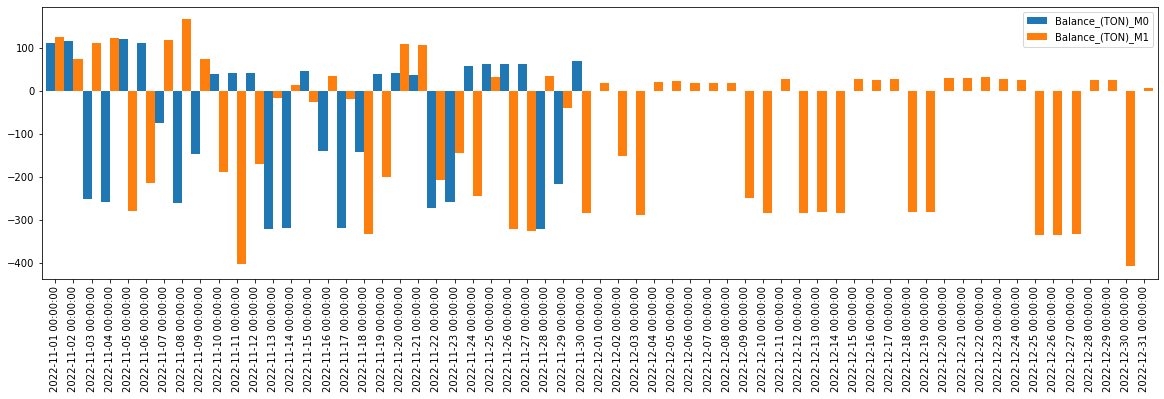

In [85]:
index = df['EBA_DATE'].tolist()
EBA_M0 = df['Balance_(TON)_M0'].tolist()
EBA_M1 = df['Balance_(TON)_M1'].tolist()
df_bar = pd.DataFrame({'Balance_(TON)_M0': EBA_M0 , 'Balance_(TON)_M1': EBA_M1}, index=index) 
ax = df_bar.plot.bar(width=1,figsize=(20,5))

In [86]:
today = '2022-11-01'	
M0 = df['Balance_(TON)_M0'][df['EBA_DATE'] <= today]

M1 = df['Balance_(TON)_M1'][df['EBA_DATE'] > today]
df['Balance_(TON)_M0_M1'] = pd.concat([M0, M1], ignore_index=True)
df['Accumulation_Balance_(TON)_M1'] = df['Balance_(TON)_M0_M1'].cumsum()
df['Accumulation_Balance_(TON)_M0'] = df['Balance_(TON)_M0'].cumsum()

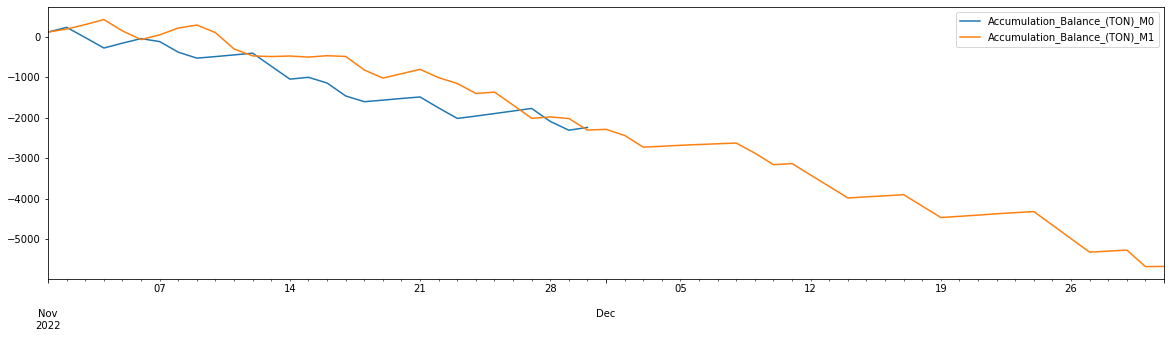

In [87]:
index = df['EBA_DATE'].tolist()
EBA_M0 = df['Accumulation_Balance_(TON)_M0'].tolist()
EBA_M1 = df['Accumulation_Balance_(TON)_M1'].tolist()
df_line = pd.DataFrame({'Accumulation_Balance_(TON)_M0': EBA_M0,'Accumulation_Balance_(TON)_M1': EBA_M1 }, index=index) #,'EBA_M1': EBA_M1,  'Actual+Plan_M1': PI_EBA_M1
ax = df_line.plot.line(figsize=(20,5))

In [88]:

TK_C4_max = 5000
TK_C4_min = 500

df['Total_TK_C4_max'] = TK_C4_max
df['Total_TK_C4_min'] = TK_C4_min 

In [89]:
df['cal_TK-1400A_TK-1400B_TK-1410_M0'] = df['ODMC4P026_ROC_MIXED_C4_INVENTORY_TK-1400A_(TON)_BY_PL_M0'] + df['ODMC4P027_ROC_MIXED_C4_INVENTORY_TK-1400B_(TON)_BY_PL_M0'] + df['ODMC4P028_MOC_MIXED_C4_INVENTORY_TK-1410_(TON)_BY_PL_M0'] 

In [90]:
df['cal_TK-1400A_TK-1400B_TK-1410_M1'] = df['ODMC4P026_ROC_MIXED_C4_INVENTORY_TK-1400A_(TON)_BY_PL_M1'] + df['ODMC4P027_ROC_MIXED_C4_INVENTORY_TK-1400B_(TON)_BY_PL_M1'] + df['ODMC4P028_MOC_MIXED_C4_INVENTORY_TK-1410_(TON)_BY_PL_M1'] 

In [91]:
df['cal_TK-1400A_TK-1400B_TK-1410_TK-1420_TK-1430_M0'] = df['ODMC4P026_ROC_MIXED_C4_INVENTORY_TK-1400A_(TON)_BY_PL_M0'] + df['ODMC4P027_ROC_MIXED_C4_INVENTORY_TK-1400B_(TON)_BY_PL_M0'] + df['ODMC4P028_MOC_MIXED_C4_INVENTORY_TK-1410_(TON)_BY_PL_M0'] + df['ODMC4P022_MOC_HIB_INVENTORY_TK-1420_(TON)_BY_PL_M0'] + df['ODMC4P029_MOC_RAFF-II_NO_DME_INVENTORY_TK-1430_(TON)_BY_PL_M0']

In [92]:
df['cal_TK-1400A_TK-1400B_TK-1410_TK-1420_TK-1430_M1'] = df['ODMC4P026_ROC_MIXED_C4_INVENTORY_TK-1400A_(TON)_BY_PL_M1'] + df['ODMC4P027_ROC_MIXED_C4_INVENTORY_TK-1400B_(TON)_BY_PL_M1'] + df['ODMC4P028_MOC_MIXED_C4_INVENTORY_TK-1410_(TON)_BY_PL_M1'] + df['ODMC4P022_MOC_HIB_INVENTORY_TK-1420_(TON)_BY_PL_M1'] + df['ODMC4P029_MOC_RAFF-II_NO_DME_INVENTORY_TK-1430_(TON)_BY_PL_M1']

In [93]:
cal_inventory_from_massbalance = []
for i in range(len(df)):
    if df['EBA_DATE'][i]==df['EBA_DATE'][0]:
        inventory = df['cal_TK-1400A_TK-1400B_TK-1410_TK-1420_TK-1430_M0'][0]
        cal_inventory_from_massbalance.append(inventory)
    elif df['EBA_DATE'][i] > df['EBA_DATE'][0]:
        inventory = inventory + df['Balance_(TON)_M0_M1'][i]
        cal_inventory_from_massbalance.append(inventory)
df['cal_C4_inventory_from_massbalance'] = cal_inventory_from_massbalance

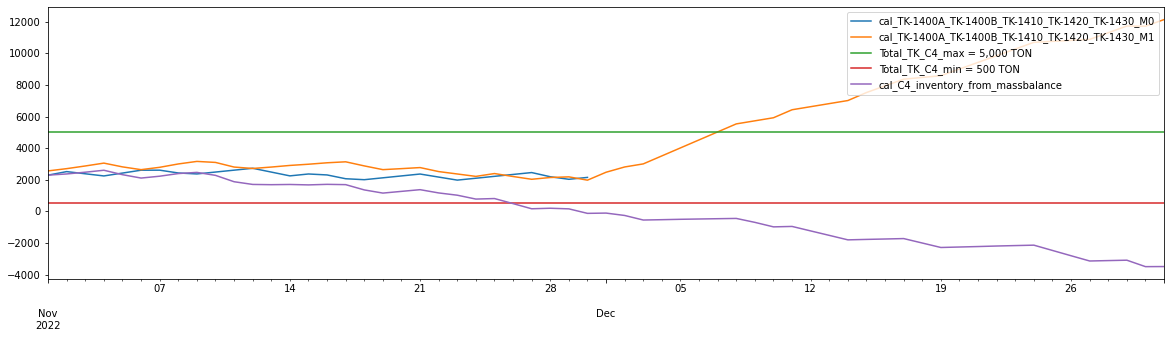

In [94]:
index = df['EBA_DATE'].tolist()
# C4_Total_M0 = df['ODMC4P021_TOTAL_MIXED_C4_INVENTORY_ROC&MOC_(TON)_BY_PL_M0'].tolist() #same only MOC and ROC
# C4_Total_M1 = df['ODMC4P021_TOTAL_MIXED_C4_INVENTORY_ROC&MOC_(TON)_BY_PL_M1'].tolist()
Cal_C4_Total_M0 = df['cal_TK-1400A_TK-1400B_TK-1410_TK-1420_TK-1430_M0'].tolist()
Cal_C4_Total_M1 = df['cal_TK-1400A_TK-1400B_TK-1410_TK-1420_TK-1430_M1'].tolist()
# Cal_C4_Total_M0 = df['cal_TK-1400A_TK-1400B_TK-1410_M0'].tolist() #same only MOC and ROC
# Cal_C4_Total_M1 = df['cal_TK-1400A_TK-1400B_TK-1410_M1'].tolist()
C4_Max = df['Total_TK_C4_max'].tolist()
C4_Min = df['Total_TK_C4_min'].tolist()
C4_Cal = df['cal_C4_inventory_from_massbalance'].tolist()
# C4_Max_Op = df['Max_C4_Inventory_Op'].tolist()
# C4_Min_Op = df['Min_C4_Inventory_Op'].tolist()
df_line = pd.DataFrame({
# 'ODMC4P021_TOTAL_MIXED_C4_INVENTORY_ROC&MOC_(TON)_BY_PL_M0': C4_Total_M0, 'ODMC4P021_TOTAL_MIXED_C4_INVENTORY_ROC&MOC_(TON)_BY_PL_M1': C4_Total_M1,
'cal_TK-1400A_TK-1400B_TK-1410_TK-1420_TK-1430_M0': Cal_C4_Total_M0, 
'cal_TK-1400A_TK-1400B_TK-1410_TK-1420_TK-1430_M1': Cal_C4_Total_M1,
'Total_TK_C4_max = 5,000 TON' : C4_Max, 
'Total_TK_C4_min = 500 TON' : C4_Min,
'cal_C4_inventory_from_massbalance' : C4_Cal
}, index=index)
ax = df_line.plot.line(figsize=(20,5))
plt.legend(loc='upper right')

Pygas Calculation

In [95]:
df= df_C2C3C4C5.copy() #[(df['EBA_DATE'] >= '2022-10-01') & (df['EBA_DATE'] < '2022-11-01')]
df = df[(df['EBA_DATE'] >= '2022-11-01') ]

select_cols = ['EBA_DATE','NUMBER_VALUE','UPDATE_DATE','SCENARIO_DATE']

df_ODMPPL048 = df.query('DATA_ELEMENT_CODE == "ODMPPL048" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL001 = df.query('DATA_ELEMENT_CODE == "ODMPPL001" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL060 = df.query('DATA_ELEMENT_CODE == "ODMPPL060" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL061 = df.query('DATA_ELEMENT_CODE == "ODMPPL061" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL002 = df.query('DATA_ELEMENT_CODE == "ODMPPL002" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL003 = df.query('DATA_ELEMENT_CODE == "ODMPPL003" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL004 = df.query('DATA_ELEMENT_CODE == "ODMPPL004" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL005 = df.query('DATA_ELEMENT_CODE == "ODMPPL005" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL049 = df.query('DATA_ELEMENT_CODE == "ODMPPL049" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL050 = df.query('DATA_ELEMENT_CODE == "ODMPPL050" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL051 = df.query('DATA_ELEMENT_CODE == "ODMPPL051" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL052 = df.query('DATA_ELEMENT_CODE == "ODMPPL052" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL053 = df.query('DATA_ELEMENT_CODE == "ODMPPL053" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL006 = df.query('DATA_ELEMENT_CODE == "ODMPPL006" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL007 = df.query('DATA_ELEMENT_CODE == "ODMPPL007" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL008 = df.query('DATA_ELEMENT_CODE == "ODMPPL008" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL009 = df.query('DATA_ELEMENT_CODE == "ODMPPL009" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL010 = df.query('DATA_ELEMENT_CODE == "ODMPPL010" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL011 = df.query('DATA_ELEMENT_CODE == "ODMPPL011" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL062 = df.query('DATA_ELEMENT_CODE == "ODMPPL062" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL063 = df.query('DATA_ELEMENT_CODE == "ODMPPL063" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL054 = df.query('DATA_ELEMENT_CODE == "ODMPPL054" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL055 = df.query('DATA_ELEMENT_CODE == "ODMPPL055" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL056 = df.query('DATA_ELEMENT_CODE == "ODMPPL056" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL018 = df.query('DATA_ELEMENT_CODE == "ODMPPL018" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL038 = df.query('DATA_ELEMENT_CODE == "ODMPPL038" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL019 = df.query('DATA_ELEMENT_CODE == "ODMPPL019" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL020 = df.query('DATA_ELEMENT_CODE == "ODMPPL020" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL021 = df.query('DATA_ELEMENT_CODE == "ODMPPL021" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL022 = df.query('DATA_ELEMENT_CODE == "ODMPPL022" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL057 = df.query('DATA_ELEMENT_CODE == "ODMPPL057" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL058 = df.query('DATA_ELEMENT_CODE == "ODMPPL058" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL059 = df.query('DATA_ELEMENT_CODE == "ODMPPL059" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL023 = df.query('DATA_ELEMENT_CODE == "ODMPPL023" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL024 = df.query('DATA_ELEMENT_CODE == "ODMPPL024" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL025 = df.query('DATA_ELEMENT_CODE == "ODMPPL025" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL026 = df.query('DATA_ELEMENT_CODE == "ODMPPL026" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL027 = df.query('DATA_ELEMENT_CODE == "ODMPPL027" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL028 = df.query('DATA_ELEMENT_CODE == "ODMPPL028" & SCENARIO == "OLEFINS-EA"')[select_cols]
df_ODMPPL065 = df.query('DATA_ELEMENT_CODE == "ODMPPL065" & SCENARIO == "OLEFINS-EA"')[select_cols]


df_ODMPPL001.columns = ['EBA_DATE','ODMPPL001_MOC_PYGAS_INVENTORY_TK-1510_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL060.columns = ['EBA_DATE','ODMPPL060_MOC_PYGAS_INVENTORY_TK-1520_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL061.columns = ['EBA_DATE','ODMPPL061_MOC_PYGAS_INVENTORY_TK-1530_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL018.columns = ['EBA_DATE','ODMPPL018_ROC_PYGAS_INVENTORY_TK-1500A_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL038.columns = ['EBA_DATE','ODMPPL038_ROC_PYGAS_INVENTORY_TK-1500B_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL048.columns = ['EBA_DATE' , 'ODMPPL048_MOC_IMPORT_PYGAS_PURCHASING_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL001.columns = ['EBA_DATE' , 'ODMPPL001_MOC_PYGAS_INVENTORY_TK-1510_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL060.columns = ['EBA_DATE' , 'ODMPPL060_MOC_PYGAS_INVENTORY_TK-1520_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL061.columns = ['EBA_DATE' , 'ODMPPL061_MOC_PYGAS_INVENTORY_TK-1530_(TON)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL002.columns = ['EBA_DATE' , 'ODMPPL002_MOC_PYGAS_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL003.columns = ['EBA_DATE' , 'ODMPPL003_MOC_GHU-I_FEED_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL004.columns = ['EBA_DATE' , 'ODMPPL004_MOC_GHU-II_FEED_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL005.columns = ['EBA_DATE' , 'ODMPPL005_MOC_PYGAS_ACTIVITY_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL049.columns = ['EBA_DATE' , 'ODMPPL049_MOC_RPG_SALE_TO_ROC_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL050.columns = ['EBA_DATE' , 'ODMPPL050_MOC_TPG_SALE_TO_ROC_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL051.columns = ['EBA_DATE' , 'ODMPPL051_MOC_IMPORT_PYGAS_FROM_ROC_(FROM_TK-1500_TO_TK-1510)_M0' ,'UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL052.columns = ['EBA_DATE' , 'ODMPPL052_MOC_C8+_PURCHASING_FROM_ROC_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL053.columns = ['EBA_DATE' , 'ODMPPL053_MOC_C8+_FROM_ROC_TO_WASH_OIL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL006.columns = ['EBA_DATE' , 'ODMPPL006_MOC_C5_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL007.columns = ['EBA_DATE' , 'ODMPPL007_MOC_C6-C8_NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL008.columns = ['EBA_DATE' , 'ODMPPL008_MOC_BENZENE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL009.columns = ['EBA_DATE' , 'ODMPPL009_MOC_TOLUENE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL010.columns = ['EBA_DATE' , 'ODMPPL010_MOC_MIXED_XYLENE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL011.columns = ['EBA_DATE' , 'ODMPPL011_MOC_C9+_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL062.columns = ['EBA_DATE' , 'ODMPPL062_ROC_C-MIX_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL063.columns = ['EBA_DATE' , 'ODMPPL063_MOC_NA40_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL054.columns = ['EBA_DATE' , 'ODMPPL054_ROC_BT_RETURN_PURCHASING_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL055.columns = ['EBA_DATE' , 'ODMPPL055_ROC_IMPORT_PYGAS_PURCHASING_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL056.columns = ['EBA_DATE' , 'ODMPPL056_ROC_CLEAN_LINE_C9+_PURCHASING_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL018.columns = ['EBA_DATE' , 'ODMPPL018_ROC_PYGAS_INVENTORY_TK-1500A_(TON)_BY_PL_M0' ,'UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL038.columns = ['EBA_DATE' , 'ODMPPL038_ROC_PYGAS_INVENTORY_TK-1500B_(TON)_BY_PL_M0' ,'UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL019.columns = ['EBA_DATE' , 'ODMPPL019_ROC_PYGAS_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL020.columns = ['EBA_DATE' , 'ODMPPL020_ROC_GHU-I_FEED_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL021.columns = ['EBA_DATE' , 'ODMPPL021_ROC_GHU-II_FEED_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL022.columns = ['EBA_DATE' , 'ODMPPL022_ROC_PYGAS_ACTIVITY_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL057.columns = ['EBA_DATE' , 'ODMPPL057_ROC_RPG_SALE_TO_MOC_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL058.columns = ['EBA_DATE' , 'ODMPPL058_ROC_TPG_SALE_to_MOC_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL059.columns = ['EBA_DATE' , 'ODMPPL059_ROC_C8+_TO_WASH_OIL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL023.columns = ['EBA_DATE' , 'ODMPPL023_ROC_C5_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL024.columns = ['EBA_DATE' , 'ODMPPL024_ROC_C6NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL025.columns = ['EBA_DATE' , 'ODMPPL025_ROC_C7NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL026.columns = ['EBA_DATE' , 'ODMPPL026_ROC_BENZENE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL027.columns = ['EBA_DATE' , 'ODMPPL027_ROC_TOLUENE_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL028.columns = ['EBA_DATE' , 'ODMPPL028_MOC_C8+_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL065.columns = ['EBA_DATE' , 'ODMPPL065_ROC_CMIX_PRODUCTION_(T/H)_BY_PL_M0','UPDATE_DATE','SCENARIO_DATE']

df_ODMPPL048 = df_ODMPPL048[df_ODMPPL048['UPDATE_DATE'] == str(df_ODMPPL048['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL048_MOC_IMPORT_PYGAS_PURCHASING_M0']]
df_ODMPPL001 = df_ODMPPL001[df_ODMPPL001['UPDATE_DATE'] == str(df_ODMPPL001['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL001_MOC_PYGAS_INVENTORY_TK-1510_(TON)_BY_PL_M0']]
df_ODMPPL060 = df_ODMPPL060[df_ODMPPL060['UPDATE_DATE'] == str(df_ODMPPL060['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL060_MOC_PYGAS_INVENTORY_TK-1520_(TON)_BY_PL_M0']]
df_ODMPPL061 = df_ODMPPL061[df_ODMPPL061['UPDATE_DATE'] == str(df_ODMPPL061['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL061_MOC_PYGAS_INVENTORY_TK-1530_(TON)_BY_PL_M0']]
df_ODMPPL002 = df_ODMPPL002[df_ODMPPL002['UPDATE_DATE'] == str(df_ODMPPL002['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL002_MOC_PYGAS_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL003 = df_ODMPPL003[df_ODMPPL003['UPDATE_DATE'] == str(df_ODMPPL003['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL003_MOC_GHU-I_FEED_(T/H)_BY_PL_M0']]
df_ODMPPL004 = df_ODMPPL004[df_ODMPPL004['UPDATE_DATE'] == str(df_ODMPPL004['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL004_MOC_GHU-II_FEED_(T/H)_BY_PL_M0']]
df_ODMPPL005 = df_ODMPPL005[df_ODMPPL005['UPDATE_DATE'] == str(df_ODMPPL005['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL005_MOC_PYGAS_ACTIVITY_BY_PL_M0']]
df_ODMPPL049 = df_ODMPPL049[df_ODMPPL049['UPDATE_DATE'] == str(df_ODMPPL049['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL049_MOC_RPG_SALE_TO_ROC_M0']]
df_ODMPPL050 = df_ODMPPL050[df_ODMPPL050['UPDATE_DATE'] == str(df_ODMPPL050['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL050_MOC_TPG_SALE_TO_ROC_M0']]
df_ODMPPL051 = df_ODMPPL051[df_ODMPPL051['UPDATE_DATE'] == str(df_ODMPPL051['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL051_MOC_IMPORT_PYGAS_FROM_ROC_(FROM_TK-1500_TO_TK-1510)_M0' ]]
df_ODMPPL052 = df_ODMPPL052[df_ODMPPL052['UPDATE_DATE'] == str(df_ODMPPL052['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL052_MOC_C8+_PURCHASING_FROM_ROC_M0']]
df_ODMPPL053 = df_ODMPPL053[df_ODMPPL053['UPDATE_DATE'] == str(df_ODMPPL053['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL053_MOC_C8+_FROM_ROC_TO_WASH_OIL_M0']]
df_ODMPPL006 = df_ODMPPL006[df_ODMPPL006['UPDATE_DATE'] == str(df_ODMPPL006['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL006_MOC_C5_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL007 = df_ODMPPL007[df_ODMPPL007['UPDATE_DATE'] == str(df_ODMPPL007['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL007_MOC_C6-C8_NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL008 = df_ODMPPL008[df_ODMPPL008['UPDATE_DATE'] == str(df_ODMPPL008['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL008_MOC_BENZENE_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL009 = df_ODMPPL009[df_ODMPPL009['UPDATE_DATE'] == str(df_ODMPPL009['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL009_MOC_TOLUENE_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL010 = df_ODMPPL010[df_ODMPPL010['UPDATE_DATE'] == str(df_ODMPPL010['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL010_MOC_MIXED_XYLENE_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL011 = df_ODMPPL011[df_ODMPPL011['UPDATE_DATE'] == str(df_ODMPPL011['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL011_MOC_C9+_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL062 = df_ODMPPL062[df_ODMPPL062['UPDATE_DATE'] == str(df_ODMPPL062['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL062_ROC_C-MIX_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL063 = df_ODMPPL063[df_ODMPPL063['UPDATE_DATE'] == str(df_ODMPPL063['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL063_MOC_NA40_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL054 = df_ODMPPL054[df_ODMPPL054['UPDATE_DATE'] == str(df_ODMPPL054['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL054_ROC_BT_RETURN_PURCHASING_M0']]
df_ODMPPL055 = df_ODMPPL055[df_ODMPPL055['UPDATE_DATE'] == str(df_ODMPPL055['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL055_ROC_IMPORT_PYGAS_PURCHASING_M0']]
df_ODMPPL056 = df_ODMPPL056[df_ODMPPL056['UPDATE_DATE'] == str(df_ODMPPL056['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL056_ROC_CLEAN_LINE_C9+_PURCHASING_M0']]
df_ODMPPL018 = df_ODMPPL018[df_ODMPPL018['UPDATE_DATE'] == str(df_ODMPPL018['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL018_ROC_PYGAS_INVENTORY_TK-1500A_(TON)_BY_PL_M0' ]]
df_ODMPPL038 = df_ODMPPL038[df_ODMPPL038['UPDATE_DATE'] == str(df_ODMPPL038['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL038_ROC_PYGAS_INVENTORY_TK-1500B_(TON)_BY_PL_M0' ]]
df_ODMPPL019 = df_ODMPPL019[df_ODMPPL019['UPDATE_DATE'] == str(df_ODMPPL019['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL019_ROC_PYGAS_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL020 = df_ODMPPL020[df_ODMPPL020['UPDATE_DATE'] == str(df_ODMPPL020['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL020_ROC_GHU-I_FEED_(T/H)_BY_PL_M0']]
df_ODMPPL021 = df_ODMPPL021[df_ODMPPL021['UPDATE_DATE'] == str(df_ODMPPL021['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL021_ROC_GHU-II_FEED_(T/H)_BY_PL_M0']]
df_ODMPPL022 = df_ODMPPL022[df_ODMPPL022['UPDATE_DATE'] == str(df_ODMPPL022['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL022_ROC_PYGAS_ACTIVITY_BY_PL_M0']]
df_ODMPPL057 = df_ODMPPL057[df_ODMPPL057['UPDATE_DATE'] == str(df_ODMPPL057['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL057_ROC_RPG_SALE_TO_MOC_M0']]
df_ODMPPL058 = df_ODMPPL058[df_ODMPPL058['UPDATE_DATE'] == str(df_ODMPPL058['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL058_ROC_TPG_SALE_to_MOC_M0']]
df_ODMPPL059 = df_ODMPPL059[df_ODMPPL059['UPDATE_DATE'] == str(df_ODMPPL059['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL059_ROC_C8+_TO_WASH_OIL_M0']]
df_ODMPPL023 = df_ODMPPL023[df_ODMPPL023['UPDATE_DATE'] == str(df_ODMPPL023['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL023_ROC_C5_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL024 = df_ODMPPL024[df_ODMPPL024['UPDATE_DATE'] == str(df_ODMPPL024['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL024_ROC_C6NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL025 = df_ODMPPL025[df_ODMPPL025['UPDATE_DATE'] == str(df_ODMPPL025['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL025_ROC_C7NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL026 = df_ODMPPL026[df_ODMPPL026['UPDATE_DATE'] == str(df_ODMPPL026['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL026_ROC_BENZENE_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL027 = df_ODMPPL027[df_ODMPPL027['UPDATE_DATE'] == str(df_ODMPPL027['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL027_ROC_TOLUENE_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL028 = df_ODMPPL028[df_ODMPPL028['UPDATE_DATE'] == str(df_ODMPPL028['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL028_MOC_C8+_PRODUCTION_(T/H)_BY_PL_M0']]
df_ODMPPL065 = df_ODMPPL065[df_ODMPPL065['UPDATE_DATE'] == str(df_ODMPPL065['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL065_ROC_CMIX_PRODUCTION_(T/H)_BY_PL_M0']]




In [96]:
dfs= [df_ODMPPL048, df_ODMPPL001, df_ODMPPL060, df_ODMPPL061, df_ODMPPL002, df_ODMPPL003, df_ODMPPL004, df_ODMPPL005, df_ODMPPL049, df_ODMPPL050, df_ODMPPL051, df_ODMPPL052, df_ODMPPL053, 
df_ODMPPL006, df_ODMPPL007, df_ODMPPL008, df_ODMPPL009, df_ODMPPL010,df_ODMPPL011, df_ODMPPL062, df_ODMPPL063, df_ODMPPL054, df_ODMPPL055, df_ODMPPL056, df_ODMPPL018, df_ODMPPL038, df_ODMPPL019,
df_ODMPPL020, df_ODMPPL021, df_ODMPPL022, df_ODMPPL057, df_ODMPPL058, df_ODMPPL059, df_ODMPPL023, df_ODMPPL024, df_ODMPPL025, df_ODMPPL026, df_ODMPPL027, df_ODMPPL028,df_ODMPPL065 ] 
df_M0 = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs)

In [97]:
#M1

select_cols = ['EBA_DATE','NUMBER_VALUE','UPDATE_DATE','SCENARIO_DATE']

df_ODMPPL048 = df.query('DATA_ELEMENT_CODE == "ODMPPL048" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL001 = df.query('DATA_ELEMENT_CODE == "ODMPPL001" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL060 = df.query('DATA_ELEMENT_CODE == "ODMPPL060" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL061 = df.query('DATA_ELEMENT_CODE == "ODMPPL061" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL002 = df.query('DATA_ELEMENT_CODE == "ODMPPL002" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL003 = df.query('DATA_ELEMENT_CODE == "ODMPPL003" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL004 = df.query('DATA_ELEMENT_CODE == "ODMPPL004" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL005 = df.query('DATA_ELEMENT_CODE == "ODMPPL005" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL049 = df.query('DATA_ELEMENT_CODE == "ODMPPL049" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL050 = df.query('DATA_ELEMENT_CODE == "ODMPPL050" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL051 = df.query('DATA_ELEMENT_CODE == "ODMPPL051" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL052 = df.query('DATA_ELEMENT_CODE == "ODMPPL052" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL053 = df.query('DATA_ELEMENT_CODE == "ODMPPL053" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL006 = df.query('DATA_ELEMENT_CODE == "ODMPPL006" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL007 = df.query('DATA_ELEMENT_CODE == "ODMPPL007" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL008 = df.query('DATA_ELEMENT_CODE == "ODMPPL008" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL009 = df.query('DATA_ELEMENT_CODE == "ODMPPL009" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL010 = df.query('DATA_ELEMENT_CODE == "ODMPPL010" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL011 = df.query('DATA_ELEMENT_CODE == "ODMPPL011" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL062 = df.query('DATA_ELEMENT_CODE == "ODMPPL062" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL063 = df.query('DATA_ELEMENT_CODE == "ODMPPL063" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL054 = df.query('DATA_ELEMENT_CODE == "ODMPPL054" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL055 = df.query('DATA_ELEMENT_CODE == "ODMPPL055" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL056 = df.query('DATA_ELEMENT_CODE == "ODMPPL056" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL018 = df.query('DATA_ELEMENT_CODE == "ODMPPL018" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL038 = df.query('DATA_ELEMENT_CODE == "ODMPPL038" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL019 = df.query('DATA_ELEMENT_CODE == "ODMPPL019" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL020 = df.query('DATA_ELEMENT_CODE == "ODMPPL020" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL021 = df.query('DATA_ELEMENT_CODE == "ODMPPL021" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL022 = df.query('DATA_ELEMENT_CODE == "ODMPPL022" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL057 = df.query('DATA_ELEMENT_CODE == "ODMPPL057" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL058 = df.query('DATA_ELEMENT_CODE == "ODMPPL058" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL059 = df.query('DATA_ELEMENT_CODE == "ODMPPL059" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL023 = df.query('DATA_ELEMENT_CODE == "ODMPPL023" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL024 = df.query('DATA_ELEMENT_CODE == "ODMPPL024" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL025 = df.query('DATA_ELEMENT_CODE == "ODMPPL025" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL026 = df.query('DATA_ELEMENT_CODE == "ODMPPL026" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL027 = df.query('DATA_ELEMENT_CODE == "ODMPPL027" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL028 = df.query('DATA_ELEMENT_CODE == "ODMPPL028" & SCENARIO == "Normal"')[select_cols]
df_ODMPPL065 = df.query('DATA_ELEMENT_CODE == "ODMPPL065" & SCENARIO == "Normal"')[select_cols]

df_ODMPPL001.columns = ['EBA_DATE','ODMPPL001_MOC_PYGAS_INVENTORY_TK-1510_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL060.columns = ['EBA_DATE','ODMPPL060_MOC_PYGAS_INVENTORY_TK-1520_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL061.columns = ['EBA_DATE','ODMPPL061_MOC_PYGAS_INVENTORY_TK-1530_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL018.columns = ['EBA_DATE','ODMPPL018_ROC_PYGAS_INVENTORY_TK-1500A_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL038.columns = ['EBA_DATE','ODMPPL038_ROC_PYGAS_INVENTORY_TK-1500B_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL048.columns = ['EBA_DATE' , 'ODMPPL048_MOC_IMPORT_PYGAS_PURCHASING_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL001.columns = ['EBA_DATE' , 'ODMPPL001_MOC_PYGAS_INVENTORY_TK-1510_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL060.columns = ['EBA_DATE' , 'ODMPPL060_MOC_PYGAS_INVENTORY_TK-1520_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL061.columns = ['EBA_DATE' , 'ODMPPL061_MOC_PYGAS_INVENTORY_TK-1530_(TON)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL002.columns = ['EBA_DATE' , 'ODMPPL002_MOC_PYGAS_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL003.columns = ['EBA_DATE' , 'ODMPPL003_MOC_GHU-I_FEED_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL004.columns = ['EBA_DATE' , 'ODMPPL004_MOC_GHU-II_FEED_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL005.columns = ['EBA_DATE' , 'ODMPPL005_MOC_PYGAS_ACTIVITY_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL049.columns = ['EBA_DATE' , 'ODMPPL049_MOC_RPG_SALE_TO_ROC_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL050.columns = ['EBA_DATE' , 'ODMPPL050_MOC_TPG_SALE_TO_ROC_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL051.columns = ['EBA_DATE' , 'ODMPPL051_MOC_IMPORT_PYGAS_FROM_ROC_(FROM_TK-1500_TO_TK-1510)_M1' ,'UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL052.columns = ['EBA_DATE' , 'ODMPPL052_MOC_C8+_PURCHASING_FROM_ROC_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL053.columns = ['EBA_DATE' , 'ODMPPL053_MOC_C8+_FROM_ROC_TO_WASH_OIL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL006.columns = ['EBA_DATE' , 'ODMPPL006_MOC_C5_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL007.columns = ['EBA_DATE' , 'ODMPPL007_MOC_C6-C8_NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL008.columns = ['EBA_DATE' , 'ODMPPL008_MOC_BENZENE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL009.columns = ['EBA_DATE' , 'ODMPPL009_MOC_TOLUENE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL010.columns = ['EBA_DATE' , 'ODMPPL010_MOC_MIXED_XYLENE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL011.columns = ['EBA_DATE' , 'ODMPPL011_MOC_C9+_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL062.columns = ['EBA_DATE' , 'ODMPPL062_ROC_C-MIX_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL063.columns = ['EBA_DATE' , 'ODMPPL063_MOC_NA40_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL054.columns = ['EBA_DATE' , 'ODMPPL054_ROC_BT_RETURN_PURCHASING_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL055.columns = ['EBA_DATE' , 'ODMPPL055_ROC_IMPORT_PYGAS_PURCHASING_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL056.columns = ['EBA_DATE' , 'ODMPPL056_ROC_CLEAN_LINE_C9+_PURCHASING_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL018.columns = ['EBA_DATE' , 'ODMPPL018_ROC_PYGAS_INVENTORY_TK-1500A_(TON)_BY_PL_M1' ,'UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL038.columns = ['EBA_DATE' , 'ODMPPL038_ROC_PYGAS_INVENTORY_TK-1500B_(TON)_BY_PL_M1' ,'UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL019.columns = ['EBA_DATE' , 'ODMPPL019_ROC_PYGAS_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL020.columns = ['EBA_DATE' , 'ODMPPL020_ROC_GHU-I_FEED_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL021.columns = ['EBA_DATE' , 'ODMPPL021_ROC_GHU-II_FEED_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL022.columns = ['EBA_DATE' , 'ODMPPL022_ROC_PYGAS_ACTIVITY_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL057.columns = ['EBA_DATE' , 'ODMPPL057_ROC_RPG_SALE_TO_MOC_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL058.columns = ['EBA_DATE' , 'ODMPPL058_ROC_TPG_SALE_to_MOC_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL059.columns = ['EBA_DATE' , 'ODMPPL059_ROC_C8+_TO_WASH_OIL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL023.columns = ['EBA_DATE' , 'ODMPPL023_ROC_C5_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL024.columns = ['EBA_DATE' , 'ODMPPL024_ROC_C6NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL025.columns = ['EBA_DATE' , 'ODMPPL025_ROC_C7NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL026.columns = ['EBA_DATE' , 'ODMPPL026_ROC_BENZENE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL027.columns = ['EBA_DATE' , 'ODMPPL027_ROC_TOLUENE_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL028.columns = ['EBA_DATE' , 'ODMPPL028_MOC_C8+_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']
df_ODMPPL065.columns = ['EBA_DATE' , 'ODMPPL065_ROC_CMIX_PRODUCTION_(T/H)_BY_PL_M1','UPDATE_DATE','SCENARIO_DATE']


df_ODMPPL048 = df_ODMPPL048[df_ODMPPL048['UPDATE_DATE'] == str(df_ODMPPL048['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL048_MOC_IMPORT_PYGAS_PURCHASING_M1']]
df_ODMPPL001 = df_ODMPPL001[df_ODMPPL001['UPDATE_DATE'] == str(df_ODMPPL001['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL001_MOC_PYGAS_INVENTORY_TK-1510_(TON)_BY_PL_M1']]
df_ODMPPL060 = df_ODMPPL060[df_ODMPPL060['UPDATE_DATE'] == str(df_ODMPPL060['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL060_MOC_PYGAS_INVENTORY_TK-1520_(TON)_BY_PL_M1']]
df_ODMPPL061 = df_ODMPPL061[df_ODMPPL061['UPDATE_DATE'] == str(df_ODMPPL061['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL061_MOC_PYGAS_INVENTORY_TK-1530_(TON)_BY_PL_M1']]
df_ODMPPL002 = df_ODMPPL002[df_ODMPPL002['UPDATE_DATE'] == str(df_ODMPPL002['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL002_MOC_PYGAS_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL003 = df_ODMPPL003[df_ODMPPL003['UPDATE_DATE'] == str(df_ODMPPL003['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL003_MOC_GHU-I_FEED_(T/H)_BY_PL_M1']]
df_ODMPPL004 = df_ODMPPL004[df_ODMPPL004['UPDATE_DATE'] == str(df_ODMPPL004['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL004_MOC_GHU-II_FEED_(T/H)_BY_PL_M1']]
df_ODMPPL005 = df_ODMPPL005[df_ODMPPL005['UPDATE_DATE'] == str(df_ODMPPL005['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL005_MOC_PYGAS_ACTIVITY_BY_PL_M1']]
df_ODMPPL049 = df_ODMPPL049[df_ODMPPL049['UPDATE_DATE'] == str(df_ODMPPL049['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL049_MOC_RPG_SALE_TO_ROC_M1']]
df_ODMPPL050 = df_ODMPPL050[df_ODMPPL050['UPDATE_DATE'] == str(df_ODMPPL050['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL050_MOC_TPG_SALE_TO_ROC_M1']]
df_ODMPPL051 = df_ODMPPL051[df_ODMPPL051['UPDATE_DATE'] == str(df_ODMPPL051['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL051_MOC_IMPORT_PYGAS_FROM_ROC_(FROM_TK-1500_TO_TK-1510)_M1' ]]
df_ODMPPL052 = df_ODMPPL052[df_ODMPPL052['UPDATE_DATE'] == str(df_ODMPPL052['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL052_MOC_C8+_PURCHASING_FROM_ROC_M1']]
df_ODMPPL053 = df_ODMPPL053[df_ODMPPL053['UPDATE_DATE'] == str(df_ODMPPL053['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL053_MOC_C8+_FROM_ROC_TO_WASH_OIL_M1']]
df_ODMPPL006 = df_ODMPPL006[df_ODMPPL006['UPDATE_DATE'] == str(df_ODMPPL006['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL006_MOC_C5_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL007 = df_ODMPPL007[df_ODMPPL007['UPDATE_DATE'] == str(df_ODMPPL007['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL007_MOC_C6-C8_NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL008 = df_ODMPPL008[df_ODMPPL008['UPDATE_DATE'] == str(df_ODMPPL008['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL008_MOC_BENZENE_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL009 = df_ODMPPL009[df_ODMPPL009['UPDATE_DATE'] == str(df_ODMPPL009['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL009_MOC_TOLUENE_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL010 = df_ODMPPL010[df_ODMPPL010['UPDATE_DATE'] == str(df_ODMPPL010['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL010_MOC_MIXED_XYLENE_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL011 = df_ODMPPL011[df_ODMPPL011['UPDATE_DATE'] == str(df_ODMPPL011['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL011_MOC_C9+_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL062 = df_ODMPPL062[df_ODMPPL062['UPDATE_DATE'] == str(df_ODMPPL062['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL062_ROC_C-MIX_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL063 = df_ODMPPL063[df_ODMPPL063['UPDATE_DATE'] == str(df_ODMPPL063['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL063_MOC_NA40_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL054 = df_ODMPPL054[df_ODMPPL054['UPDATE_DATE'] == str(df_ODMPPL054['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL054_ROC_BT_RETURN_PURCHASING_M1']]
df_ODMPPL055 = df_ODMPPL055[df_ODMPPL055['UPDATE_DATE'] == str(df_ODMPPL055['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL055_ROC_IMPORT_PYGAS_PURCHASING_M1']]
df_ODMPPL056 = df_ODMPPL056[df_ODMPPL056['UPDATE_DATE'] == str(df_ODMPPL056['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL056_ROC_CLEAN_LINE_C9+_PURCHASING_M1']]
df_ODMPPL018 = df_ODMPPL018[df_ODMPPL018['UPDATE_DATE'] == str(df_ODMPPL018['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL018_ROC_PYGAS_INVENTORY_TK-1500A_(TON)_BY_PL_M1' ]]
df_ODMPPL038 = df_ODMPPL038[df_ODMPPL038['UPDATE_DATE'] == str(df_ODMPPL038['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL038_ROC_PYGAS_INVENTORY_TK-1500B_(TON)_BY_PL_M1' ]]
df_ODMPPL019 = df_ODMPPL019[df_ODMPPL019['UPDATE_DATE'] == str(df_ODMPPL019['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL019_ROC_PYGAS_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL020 = df_ODMPPL020[df_ODMPPL020['UPDATE_DATE'] == str(df_ODMPPL020['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL020_ROC_GHU-I_FEED_(T/H)_BY_PL_M1']]
df_ODMPPL021 = df_ODMPPL021[df_ODMPPL021['UPDATE_DATE'] == str(df_ODMPPL021['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL021_ROC_GHU-II_FEED_(T/H)_BY_PL_M1']]
df_ODMPPL022 = df_ODMPPL022[df_ODMPPL022['UPDATE_DATE'] == str(df_ODMPPL022['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL022_ROC_PYGAS_ACTIVITY_BY_PL_M1']]
df_ODMPPL057 = df_ODMPPL057[df_ODMPPL057['UPDATE_DATE'] == str(df_ODMPPL057['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL057_ROC_RPG_SALE_TO_MOC_M1']]
df_ODMPPL058 = df_ODMPPL058[df_ODMPPL058['UPDATE_DATE'] == str(df_ODMPPL058['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL058_ROC_TPG_SALE_to_MOC_M1']]
df_ODMPPL059 = df_ODMPPL059[df_ODMPPL059['UPDATE_DATE'] == str(df_ODMPPL059['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL059_ROC_C8+_TO_WASH_OIL_M1']]
df_ODMPPL023 = df_ODMPPL023[df_ODMPPL023['UPDATE_DATE'] == str(df_ODMPPL023['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL023_ROC_C5_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL024 = df_ODMPPL024[df_ODMPPL024['UPDATE_DATE'] == str(df_ODMPPL024['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL024_ROC_C6NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL025 = df_ODMPPL025[df_ODMPPL025['UPDATE_DATE'] == str(df_ODMPPL025['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL025_ROC_C7NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL026 = df_ODMPPL026[df_ODMPPL026['UPDATE_DATE'] == str(df_ODMPPL026['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL026_ROC_BENZENE_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL027 = df_ODMPPL027[df_ODMPPL027['UPDATE_DATE'] == str(df_ODMPPL027['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL027_ROC_TOLUENE_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL028 = df_ODMPPL028[df_ODMPPL028['UPDATE_DATE'] == str(df_ODMPPL028['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL028_MOC_C8+_PRODUCTION_(T/H)_BY_PL_M1']]
df_ODMPPL065 = df_ODMPPL065[df_ODMPPL065['UPDATE_DATE'] == str(df_ODMPPL065['UPDATE_DATE'].max())][['EBA_DATE', 'ODMPPL065_ROC_CMIX_PRODUCTION_(T/H)_BY_PL_M1']]




In [98]:
dfs= [df_ODMPPL048, df_ODMPPL001, df_ODMPPL060, df_ODMPPL061, df_ODMPPL002, df_ODMPPL003, df_ODMPPL004, df_ODMPPL005, df_ODMPPL049, df_ODMPPL050, df_ODMPPL051, df_ODMPPL052, df_ODMPPL053, 
df_ODMPPL006, df_ODMPPL007, df_ODMPPL008, df_ODMPPL009, df_ODMPPL010,df_ODMPPL011, df_ODMPPL062, df_ODMPPL063, df_ODMPPL054, df_ODMPPL055, df_ODMPPL056, df_ODMPPL018, df_ODMPPL038, df_ODMPPL019,
df_ODMPPL020, df_ODMPPL021, df_ODMPPL022, df_ODMPPL057, df_ODMPPL058, df_ODMPPL059, df_ODMPPL023, df_ODMPPL024, df_ODMPPL025, df_ODMPPL026, df_ODMPPL027, df_ODMPPL028,df_ODMPPL065 ] 
df_M1 = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), dfs)

In [99]:
M0_M1 = [ df_M0 ,df_M1 ] 
df = reduce(lambda left,right: pd.merge(left,right,on='EBA_DATE', how="outer"), M0_M1)

In [100]:
df.head(5)

,EBA_DATE,ODMPPL048_MOC_IMPORT_PYGAS_PURCHASING_M0,ODMPPL001_MOC_PYGAS_INVENTORY_TK-1510_(TON)_BY_PL_M0,ODMPPL060_MOC_PYGAS_INVENTORY_TK-1520_(TON)_BY_PL_M0,ODMPPL061_MOC_PYGAS_INVENTORY_TK-1530_(TON)_BY_PL_M0,ODMPPL002_MOC_PYGAS_PRODUCTION_(T/H)_BY_PL_M0,ODMPPL003_MOC_GHU-I_FEED_(T/H)_BY_PL_M0,ODMPPL004_MOC_GHU-II_FEED_(T/H)_BY_PL_M0,ODMPPL005_MOC_PYGAS_ACTIVITY_BY_PL_M0,ODMPPL049_MOC_RPG_SALE_TO_ROC_M0,...,ODMPPL057_ROC_RPG_SALE_TO_MOC_M1,ODMPPL058_ROC_TPG_SALE_to_MOC_M1,ODMPPL059_ROC_C8+_TO_WASH_OIL_M1,ODMPPL023_ROC_C5_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1,ODMPPL024_ROC_C6NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1,ODMPPL025_ROC_C7NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1,ODMPPL026_ROC_BENZENE_PRODUCTION_(T/H)_BY_PL_M1,ODMPPL027_ROC_TOLUENE_PRODUCTION_(T/H)_BY_PL_M1,ODMPPL028_MOC_C8+_PRODUCTION_(T/H)_BY_PL_M1,ODMPPL065_ROC_CMIX_PRODUCTION_(T/H)_BY_PL_M1
0,2022-11-01,0.0,7452.376321,301.272766,50.047752,90.0,101.0,82.676185,0.0,0.0,...,0.0,0.0,0.0,0.000001,9.700000e-07,5.100000e-07,0.000002,0.000001,0.000003,0.0
1,2022-11-02,0.0,7188.376321,301.272766,50.047752,90.0,101.0,82.615403,0.0,0.0,...,0.0,0.0,0.0,0.000001,9.700000e-07,5.100000e-07,0.000002,0.000001,0.000003,0.0
2,2022-11-03,0.0,6924.376321,301.272766,50.047752,90.0,101.0,82.554012,0.0,0.0,...,0.0,0.0,0.0,0.000001,9.700000e-07,5.100000e-07,0.000002,0.000001,0.000003,0.0
3,2022-11-04,0.0,6660.376321,301.272766,50.047752,90.0,101.0,82.491984,0.0,0.0,...,0.0,0.0,0.0,0.000001,9.700000e-07,5.100000e-07,0.000002,0.000001,0.000003,0.0
4,2022-11-05,0.0,6396.376321,301.272766,50.047752,90.0,101.0,82.429289,0.0,0.0,...,0.0,0.0,0.0,0.000001,9.700000e-07,5.100000e-07,0.000002,0.000001,0.000003,0.0


In [101]:
df['Total_Purchase_Volume_(TON)_M0'] = df['ODMPPL048_MOC_IMPORT_PYGAS_PURCHASING_M0'] + (df['ODMPPL052_MOC_C8+_PURCHASING_FROM_ROC_M0']*24)+ df['ODMPPL054_ROC_BT_RETURN_PURCHASING_M0'] + df['ODMPPL055_ROC_IMPORT_PYGAS_PURCHASING_M0'] + df['ODMPPL056_ROC_CLEAN_LINE_C9+_PURCHASING_M0']

In [102]:
df['Total_Purchase_Volume_(TON)_M1'] = df['ODMPPL048_MOC_IMPORT_PYGAS_PURCHASING_M1'] + (df['ODMPPL052_MOC_C8+_PURCHASING_FROM_ROC_M1']*24)+ df['ODMPPL054_ROC_BT_RETURN_PURCHASING_M1'] + df['ODMPPL055_ROC_IMPORT_PYGAS_PURCHASING_M1'] + df['ODMPPL056_ROC_CLEAN_LINE_C9+_PURCHASING_M1']

In [103]:
df['Total_Production_Volume_(TON)_M0'] = (df['ODMPPL002_MOC_PYGAS_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL006_MOC_C5_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL007_MOC_C6-C8_NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL008_MOC_BENZENE_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL009_MOC_TOLUENE_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL010_MOC_MIXED_XYLENE_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL011_MOC_C9+_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL062_ROC_C-MIX_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL063_MOC_NA40_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL019_ROC_PYGAS_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL023_ROC_C5_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL024_ROC_C6NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL025_ROC_C7NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL026_ROC_BENZENE_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL027_ROC_TOLUENE_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL028_MOC_C8+_PRODUCTION_(T/H)_BY_PL_M0'] 
+ df['ODMPPL065_ROC_CMIX_PRODUCTION_(T/H)_BY_PL_M0'])*24



In [104]:
df['Total_Production_Volume_(TON)_M1'] = (df['ODMPPL002_MOC_PYGAS_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL006_MOC_C5_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL007_MOC_C6-C8_NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL008_MOC_BENZENE_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL009_MOC_TOLUENE_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL010_MOC_MIXED_XYLENE_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL011_MOC_C9+_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL062_ROC_C-MIX_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL063_MOC_NA40_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL019_ROC_PYGAS_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL023_ROC_C5_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL024_ROC_C6NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL025_ROC_C7NA_RECYCLE_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL026_ROC_BENZENE_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL027_ROC_TOLUENE_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL028_MOC_C8+_PRODUCTION_(T/H)_BY_PL_M1'] 
+ df['ODMPPL065_ROC_CMIX_PRODUCTION_(T/H)_BY_PL_M1'])*24



In [105]:
df['Total_Consumption_Volume_(TON)_M0'] = (df['ODMPPL003_MOC_GHU-I_FEED_(T/H)_BY_PL_M0']
+ df['ODMPPL004_MOC_GHU-II_FEED_(T/H)_BY_PL_M0']
+ df['ODMPPL049_MOC_RPG_SALE_TO_ROC_M0']
+ df['ODMPPL050_MOC_TPG_SALE_TO_ROC_M0']
+ df['ODMPPL051_MOC_IMPORT_PYGAS_FROM_ROC_(FROM_TK-1500_TO_TK-1510)_M0']
+ df['ODMPPL053_MOC_C8+_FROM_ROC_TO_WASH_OIL_M0']
+ df['ODMPPL020_ROC_GHU-I_FEED_(T/H)_BY_PL_M0']
+ df['ODMPPL021_ROC_GHU-II_FEED_(T/H)_BY_PL_M0']
+ df['ODMPPL057_ROC_RPG_SALE_TO_MOC_M0']
+ df['ODMPPL058_ROC_TPG_SALE_to_MOC_M0']
+ df['ODMPPL059_ROC_C8+_TO_WASH_OIL_M0'])*24

In [106]:
df['Total_Consumption_Volume_(TON)_M1'] = (df['ODMPPL003_MOC_GHU-I_FEED_(T/H)_BY_PL_M1']
+ df['ODMPPL004_MOC_GHU-II_FEED_(T/H)_BY_PL_M1']
+ df['ODMPPL049_MOC_RPG_SALE_TO_ROC_M1']
+ df['ODMPPL050_MOC_TPG_SALE_TO_ROC_M1']
+ df['ODMPPL051_MOC_IMPORT_PYGAS_FROM_ROC_(FROM_TK-1500_TO_TK-1510)_M1']
+ df['ODMPPL053_MOC_C8+_FROM_ROC_TO_WASH_OIL_M1']
+ df['ODMPPL020_ROC_GHU-I_FEED_(T/H)_BY_PL_M1']
+ df['ODMPPL021_ROC_GHU-II_FEED_(T/H)_BY_PL_M1']
+ df['ODMPPL057_ROC_RPG_SALE_TO_MOC_M1']
+ df['ODMPPL058_ROC_TPG_SALE_to_MOC_M1']
+ df['ODMPPL059_ROC_C8+_TO_WASH_OIL_M1'])*24

In [107]:
df['Balance_(TON)_M0'] = df['Total_Purchase_Volume_(TON)_M0'] + df['Total_Production_Volume_(TON)_M0'] - df['Total_Consumption_Volume_(TON)_M0']


In [108]:
df['Balance_(TON)_M1'] = df['Total_Purchase_Volume_(TON)_M1'] + df['Total_Production_Volume_(TON)_M1'] - df['Total_Consumption_Volume_(TON)_M1']

In [109]:
df['Total_Pygas_Inventory_TK-1500A_TK-1500B_TK-1510_M0'] = df['ODMPPL001_MOC_PYGAS_INVENTORY_TK-1510_(TON)_BY_PL_M0']  + df['ODMPPL018_ROC_PYGAS_INVENTORY_TK-1500A_(TON)_BY_PL_M0'] + df['ODMPPL038_ROC_PYGAS_INVENTORY_TK-1500B_(TON)_BY_PL_M0'] 


In [110]:
df['Total_Pygas_Inventory_TK-1500A_TK-1500B_TK-1510_M1'] = df['ODMPPL001_MOC_PYGAS_INVENTORY_TK-1510_(TON)_BY_PL_M1']  + df['ODMPPL018_ROC_PYGAS_INVENTORY_TK-1500A_(TON)_BY_PL_M1'] + df['ODMPPL038_ROC_PYGAS_INVENTORY_TK-1500B_(TON)_BY_PL_M1'] 

In [111]:
df['Total_Pygas_Inventory_TK-1500A_TK-1500B_TK-1510_TK-1520_TK-1530_M0'] = df['ODMPPL001_MOC_PYGAS_INVENTORY_TK-1510_(TON)_BY_PL_M0'] + df['ODMPPL060_MOC_PYGAS_INVENTORY_TK-1520_(TON)_BY_PL_M0'] + df['ODMPPL061_MOC_PYGAS_INVENTORY_TK-1530_(TON)_BY_PL_M0'] + df['ODMPPL018_ROC_PYGAS_INVENTORY_TK-1500A_(TON)_BY_PL_M0'] + df['ODMPPL038_ROC_PYGAS_INVENTORY_TK-1500B_(TON)_BY_PL_M0'] 

In [112]:
df['Total_Pygas_Inventory_TK-1500A_TK-1500B_TK-1510_TK-1520_TK-1530_M1'] = df['ODMPPL001_MOC_PYGAS_INVENTORY_TK-1510_(TON)_BY_PL_M1'] + df['ODMPPL060_MOC_PYGAS_INVENTORY_TK-1520_(TON)_BY_PL_M1'] + df['ODMPPL061_MOC_PYGAS_INVENTORY_TK-1530_(TON)_BY_PL_M1'] + df['ODMPPL018_ROC_PYGAS_INVENTORY_TK-1500A_(TON)_BY_PL_M1'] + df['ODMPPL038_ROC_PYGAS_INVENTORY_TK-1500B_(TON)_BY_PL_M1'] 

In [113]:

TK_1500A_max = 12974
TK_1500A_min = 581
TK_1500B_max = 6300
TK_1500B_min = 513
TK_1510_max = 14450.5
TK_1510_min = 522
TK_1520_max = 2054.165 ##
TK_1520_min = 90
TK_1530_max = 466.6 ##
TK_1530_min = 16.6

df['TK_1500A_max'] = TK_1500A_max
df['TK_1500B_max'] = TK_1500B_max
df['TK_1510_max'] = TK_1510_max
df['Total_TK_1500A_TK_1500B_TK_1510_max'] = df['TK_1500A_max'] + df['TK_1500B_max'] +df['TK_1510_max']
df['TK_1500A_min'] = TK_1500A_min
df['TK_1500B_min'] = TK_1500B_min
df['TK_1510_min'] = TK_1510_min
df['Total_TK_1500A_TK_1500B_TK_1510_min'] = df['TK_1500A_min'] + df['TK_1500B_min'] +df['TK_1510_min']

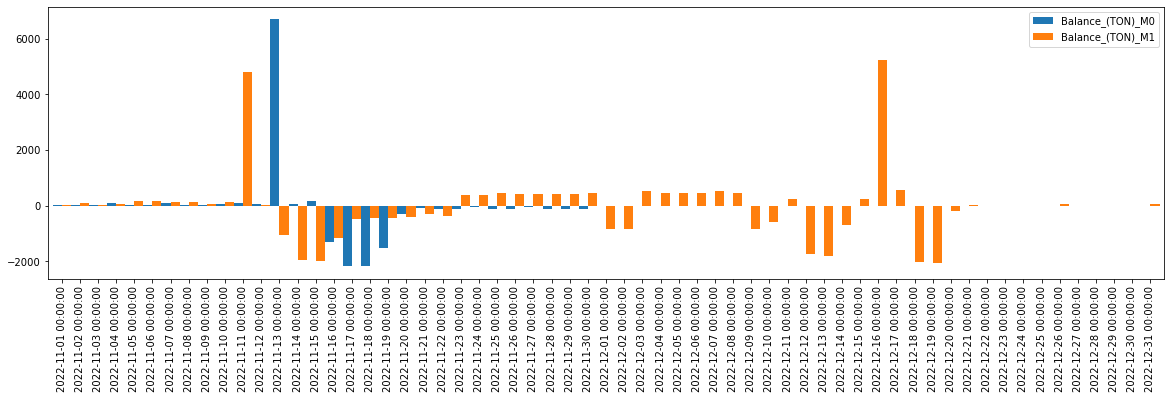

In [114]:
index = df['EBA_DATE'].tolist()
EBA_M0 = df['Balance_(TON)_M0'].tolist()
EBA_M1 = df['Balance_(TON)_M1'].tolist()
df_bar = pd.DataFrame({'Balance_(TON)_M0': EBA_M0 , 'Balance_(TON)_M1': EBA_M1}, index=index) 
ax = df_bar.plot.bar(width=1,figsize=(20,5))

In [115]:
today = '2022-11-01'	
M0 = df['Balance_(TON)_M0'][df['EBA_DATE'] <= today]

M1 = df['Balance_(TON)_M1'][df['EBA_DATE'] > today]
df['Balance_(TON)_M0_M1'] = pd.concat([M0, M1], ignore_index=True)
df['Accumulation_Balance_(TON)_M1'] = df['Balance_(TON)_M0_M1'].cumsum()
df['Accumulation_Balance_(TON)_M0'] = df['Balance_(TON)_M0'].cumsum()

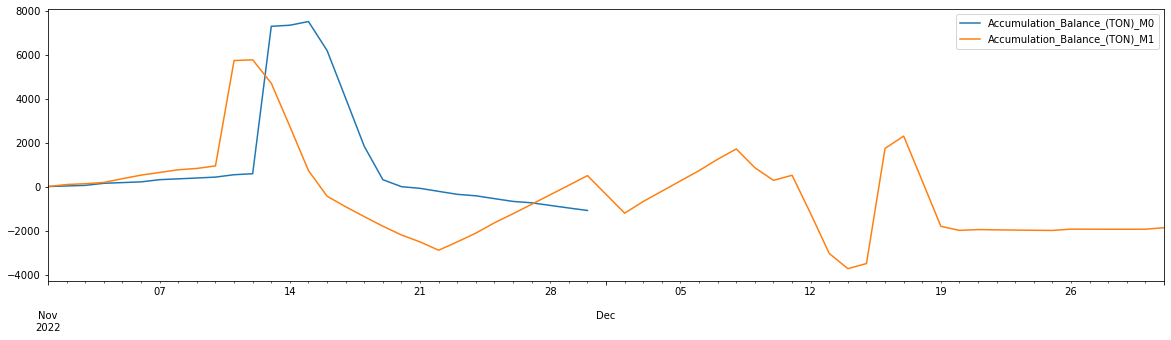

In [116]:
index = df['EBA_DATE'].tolist()
EBA_M0 = df['Accumulation_Balance_(TON)_M0'].tolist()
EBA_M1 = df['Accumulation_Balance_(TON)_M1'].tolist()
df_line = pd.DataFrame({'Accumulation_Balance_(TON)_M0': EBA_M0,'Accumulation_Balance_(TON)_M1': EBA_M1 }, index=index) #,'EBA_M1': EBA_M1,  'Actual+Plan_M1': PI_EBA_M1
ax = df_line.plot.line(figsize=(20,5))

In [117]:
cal_inventory_from_massbalance = []
for i in range(len(df)):
    if df['EBA_DATE'][i]==df['EBA_DATE'][0]:
        inventory = df['Total_Pygas_Inventory_TK-1500A_TK-1500B_TK-1510_M0'][0]
        cal_inventory_from_massbalance.append(inventory)
    elif df['EBA_DATE'][i] > df['EBA_DATE'][0]:
        inventory = inventory + df['Balance_(TON)_M0_M1'][i]
        cal_inventory_from_massbalance.append(inventory)
df['cal_Pygas_inventory_from_massbalance'] = cal_inventory_from_massbalance

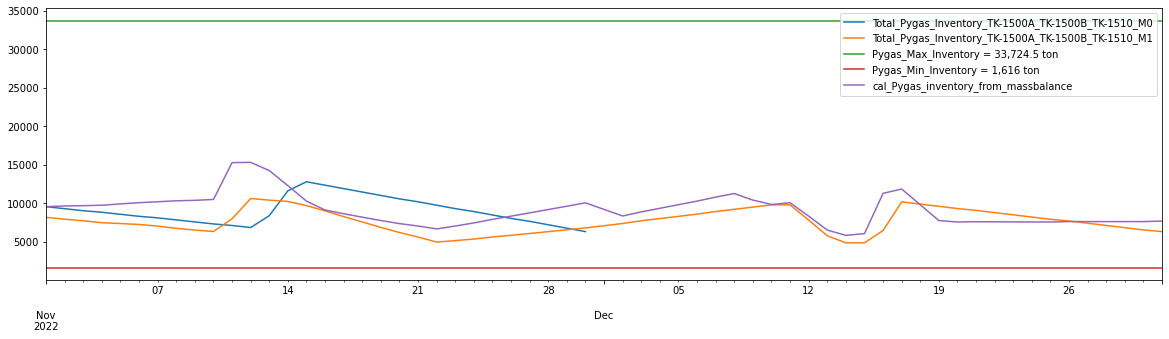

In [118]:
index = df['EBA_DATE'].tolist()
Pygas_Total_M0 = df['Total_Pygas_Inventory_TK-1500A_TK-1500B_TK-1510_M0'].tolist()
Pygas_Total_M1 = df['Total_Pygas_Inventory_TK-1500A_TK-1500B_TK-1510_M1'].tolist()
Pygas_Max = df['Total_TK_1500A_TK_1500B_TK_1510_max'].tolist()
Pygas_Min = df['Total_TK_1500A_TK_1500B_TK_1510_min'].tolist()
Pygas_Cal = df['cal_Pygas_inventory_from_massbalance'].tolist()
# Pygas_Max_Op = df['Max_Pygas_Inventory_Op'].tolist()
# Pygas_Min_Op = df['Min_Pygas_Inventory_Op'].tolist()
df_line = pd.DataFrame({
'Total_Pygas_Inventory_TK-1500A_TK-1500B_TK-1510_M0': Pygas_Total_M0,
'Total_Pygas_Inventory_TK-1500A_TK-1500B_TK-1510_M1': Pygas_Total_M1,
'Pygas_Max_Inventory = 33,724.5 ton' : Pygas_Max, 
'Pygas_Min_Inventory = 1,616 ton' : Pygas_Min,
'cal_Pygas_inventory_from_massbalance' : Pygas_Cal,
}, index=index)
ax = df_line.plot.line(figsize=(20,5))
plt.legend(loc='upper right')